In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib as mpl 

import seaborn as sns 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import mplcyberpunk 
%matplotlib inline

pd.set_option("display.max_columns", 100) 
pd.set_option("display.max_rows", 100) 

plt.style.use("cyberpunk")

import warnings 
warnings.filterwarnings("ignore")

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.0
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 18
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5.0
mpl.rcParams["axes.titlepad"] = 10.0
mpl.rcParams['xtick.labelsize'] =15
mpl.rcParams['ytick.labelsize'] = 15

In [3]:
train = pd.read_csv("/storage/emulated/0/Participant_Data_TheMathCompany_.DSHH/train.csv") 
test = pd.read_csv("/storage/emulated/0/Participant_Data_TheMathCompany_.DSHH/test.csv") 

## Univariat & Bavariat Analysis

In [4]:
train.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [30]:
nul = pd.DataFrame({"Train/null":(train.isnull().sum()/train.shape[0])*100, 
                    "Test/null": (test.isnull().sum()/test.shape[0])*100}).sort_values("Train/null", ascending=False) 
nul

Train/null  Test/null
Airbags                  0.0        0.0
Category                 0.0        0.0
Prod. year               0.0        0.0
Price                    0.0      100.0
Model                    0.0        0.0
Mileage                  0.0        0.0
Manufacturer             0.0        0.0
Levy                     0.0        0.0
Leather interior         0.0        0.0
ID                       0.0        0.0
Gear box type            0.0        0.0
Fuel type                0.0        0.0
Engine volume            0.0        0.0
Drive wheels             0.0        0.0
Doors                    0.0        0.0
Cylinders                0.0        0.0
Color                    0.0        0.0
Wheel                    0.0        0.0

In [31]:
train.duplicated().sum()

313

In [4]:
train.drop_duplicates(inplace=True)

In [36]:
#Target

train.Price.describe() 

count    1.892400e+04
mean     1.858744e+04
std      1.921356e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.206300e+04
max      2.630750e+07
Name: Price, dtype: float64

skew: 135.38772637953886
kurt: 18524.090163664867


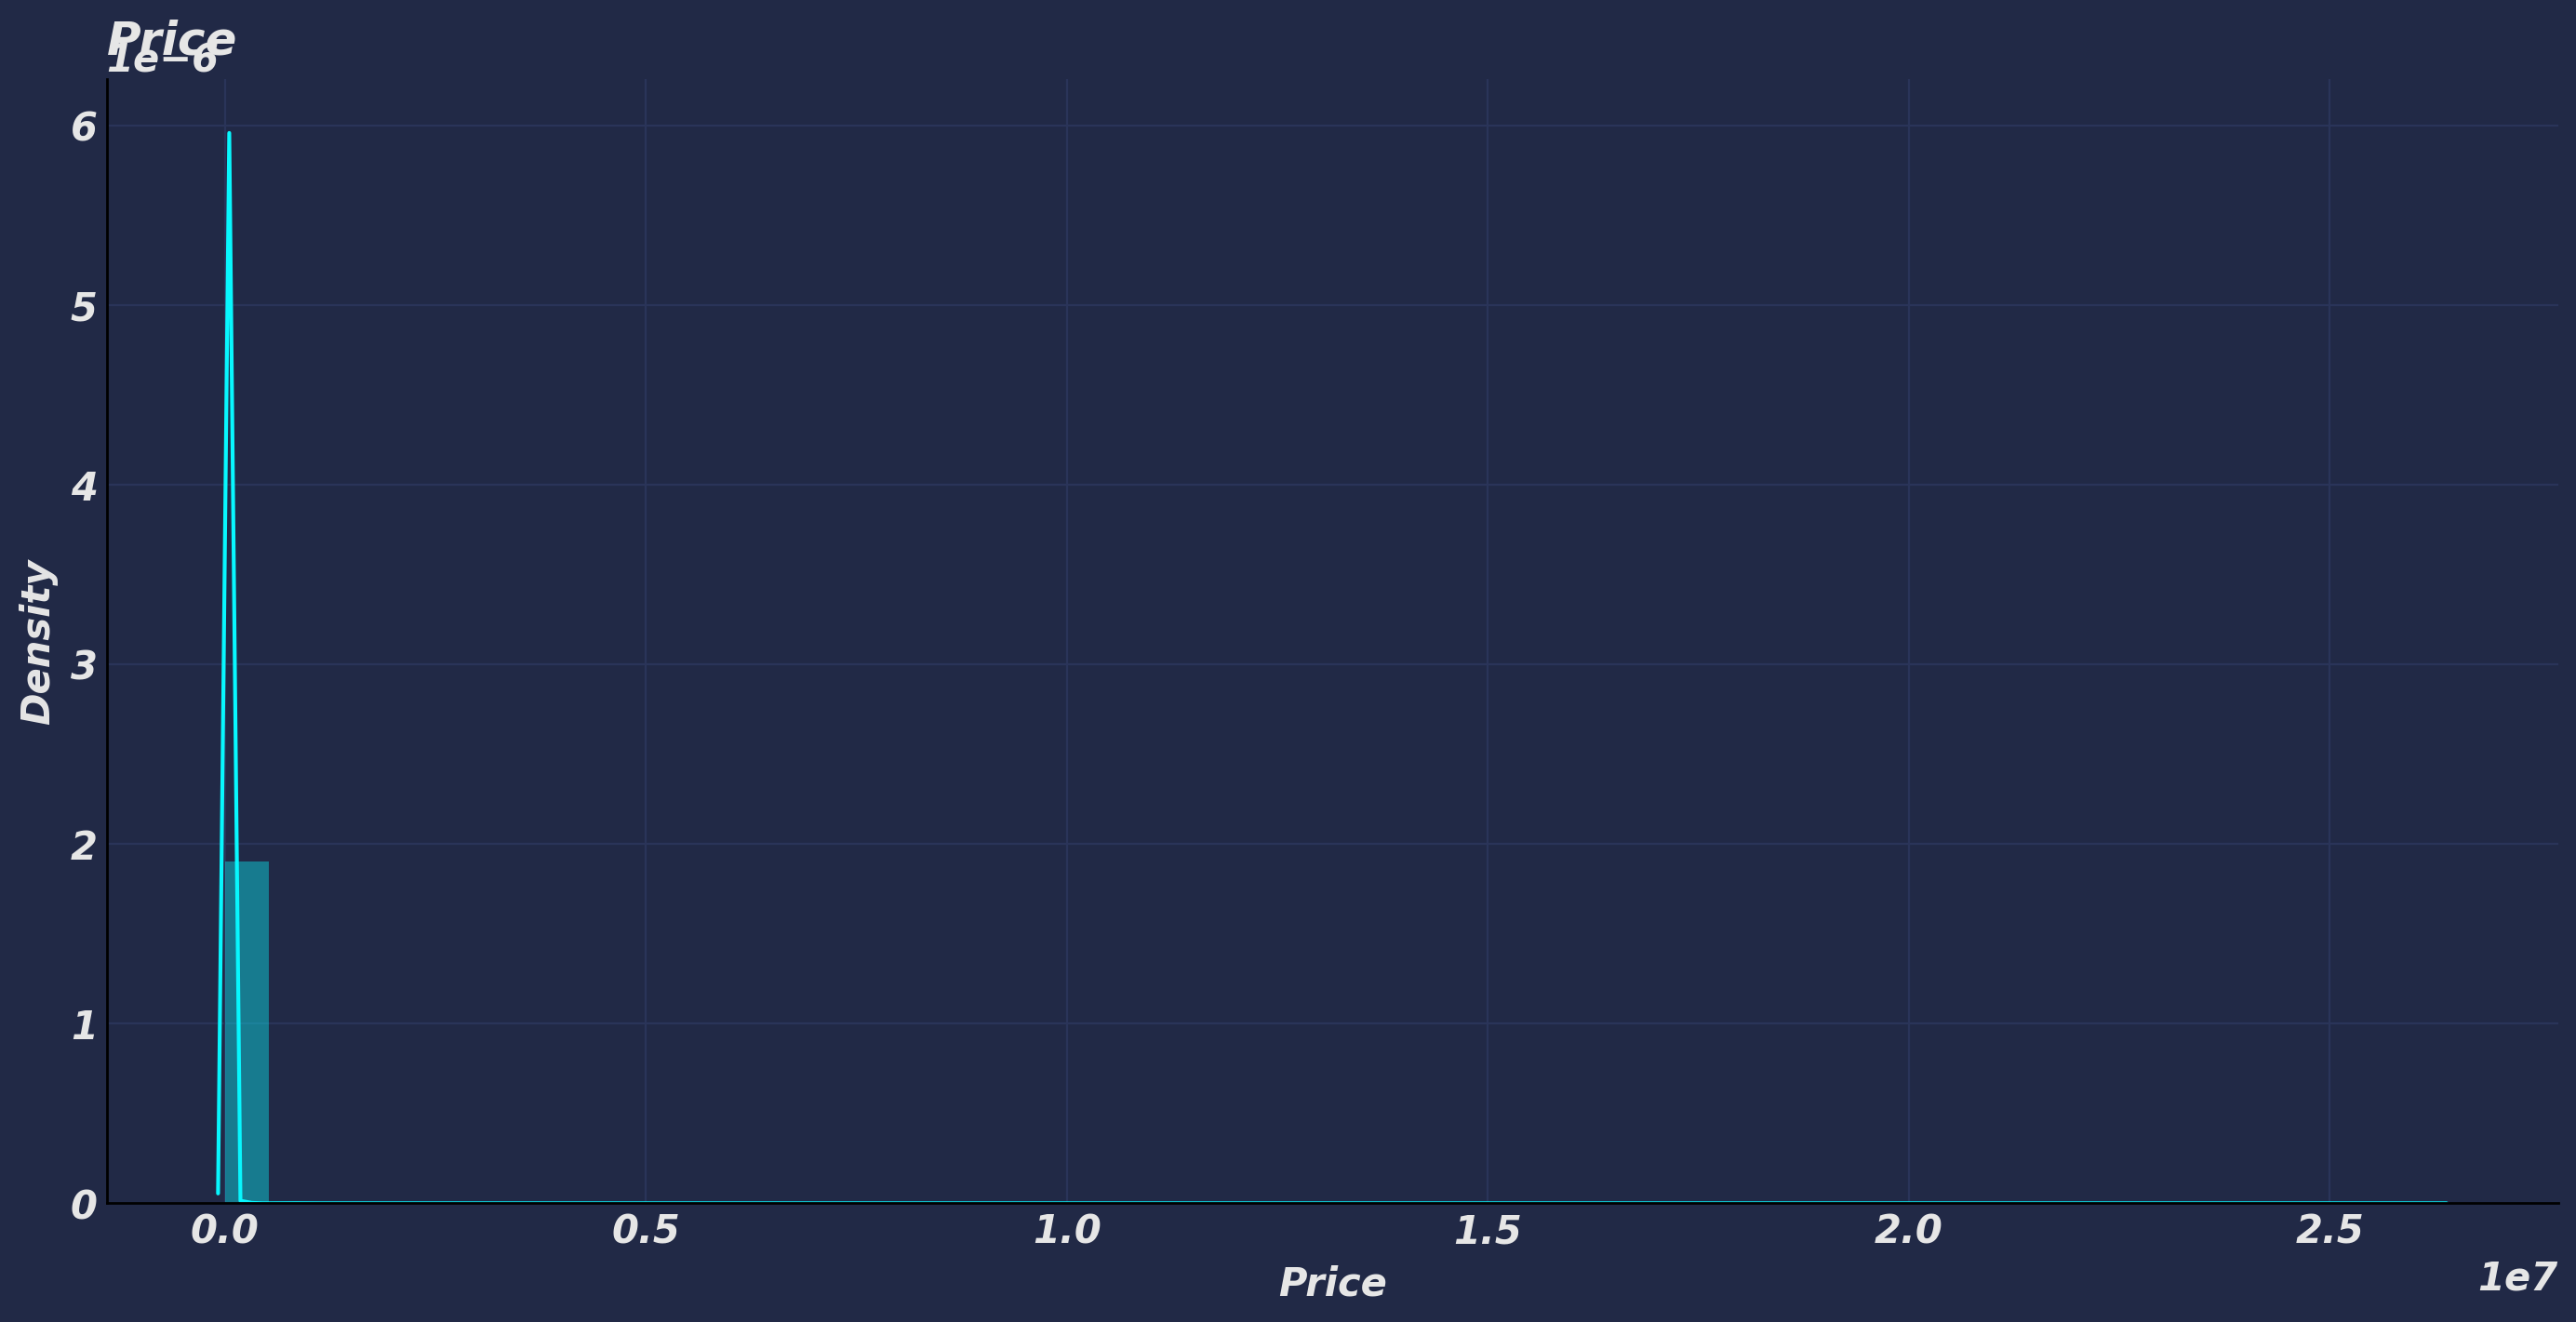

In [39]:
plt.figure(figsize=(17,8))

sns.distplot(train.Price) 
plt.title("Price") 

print(f"skew: {train.Price.skew()}") 
print(f"kurt: {train.Price.kurt()}") 

skew: -1.3964876620220672
kurt: 2.0079812201612395


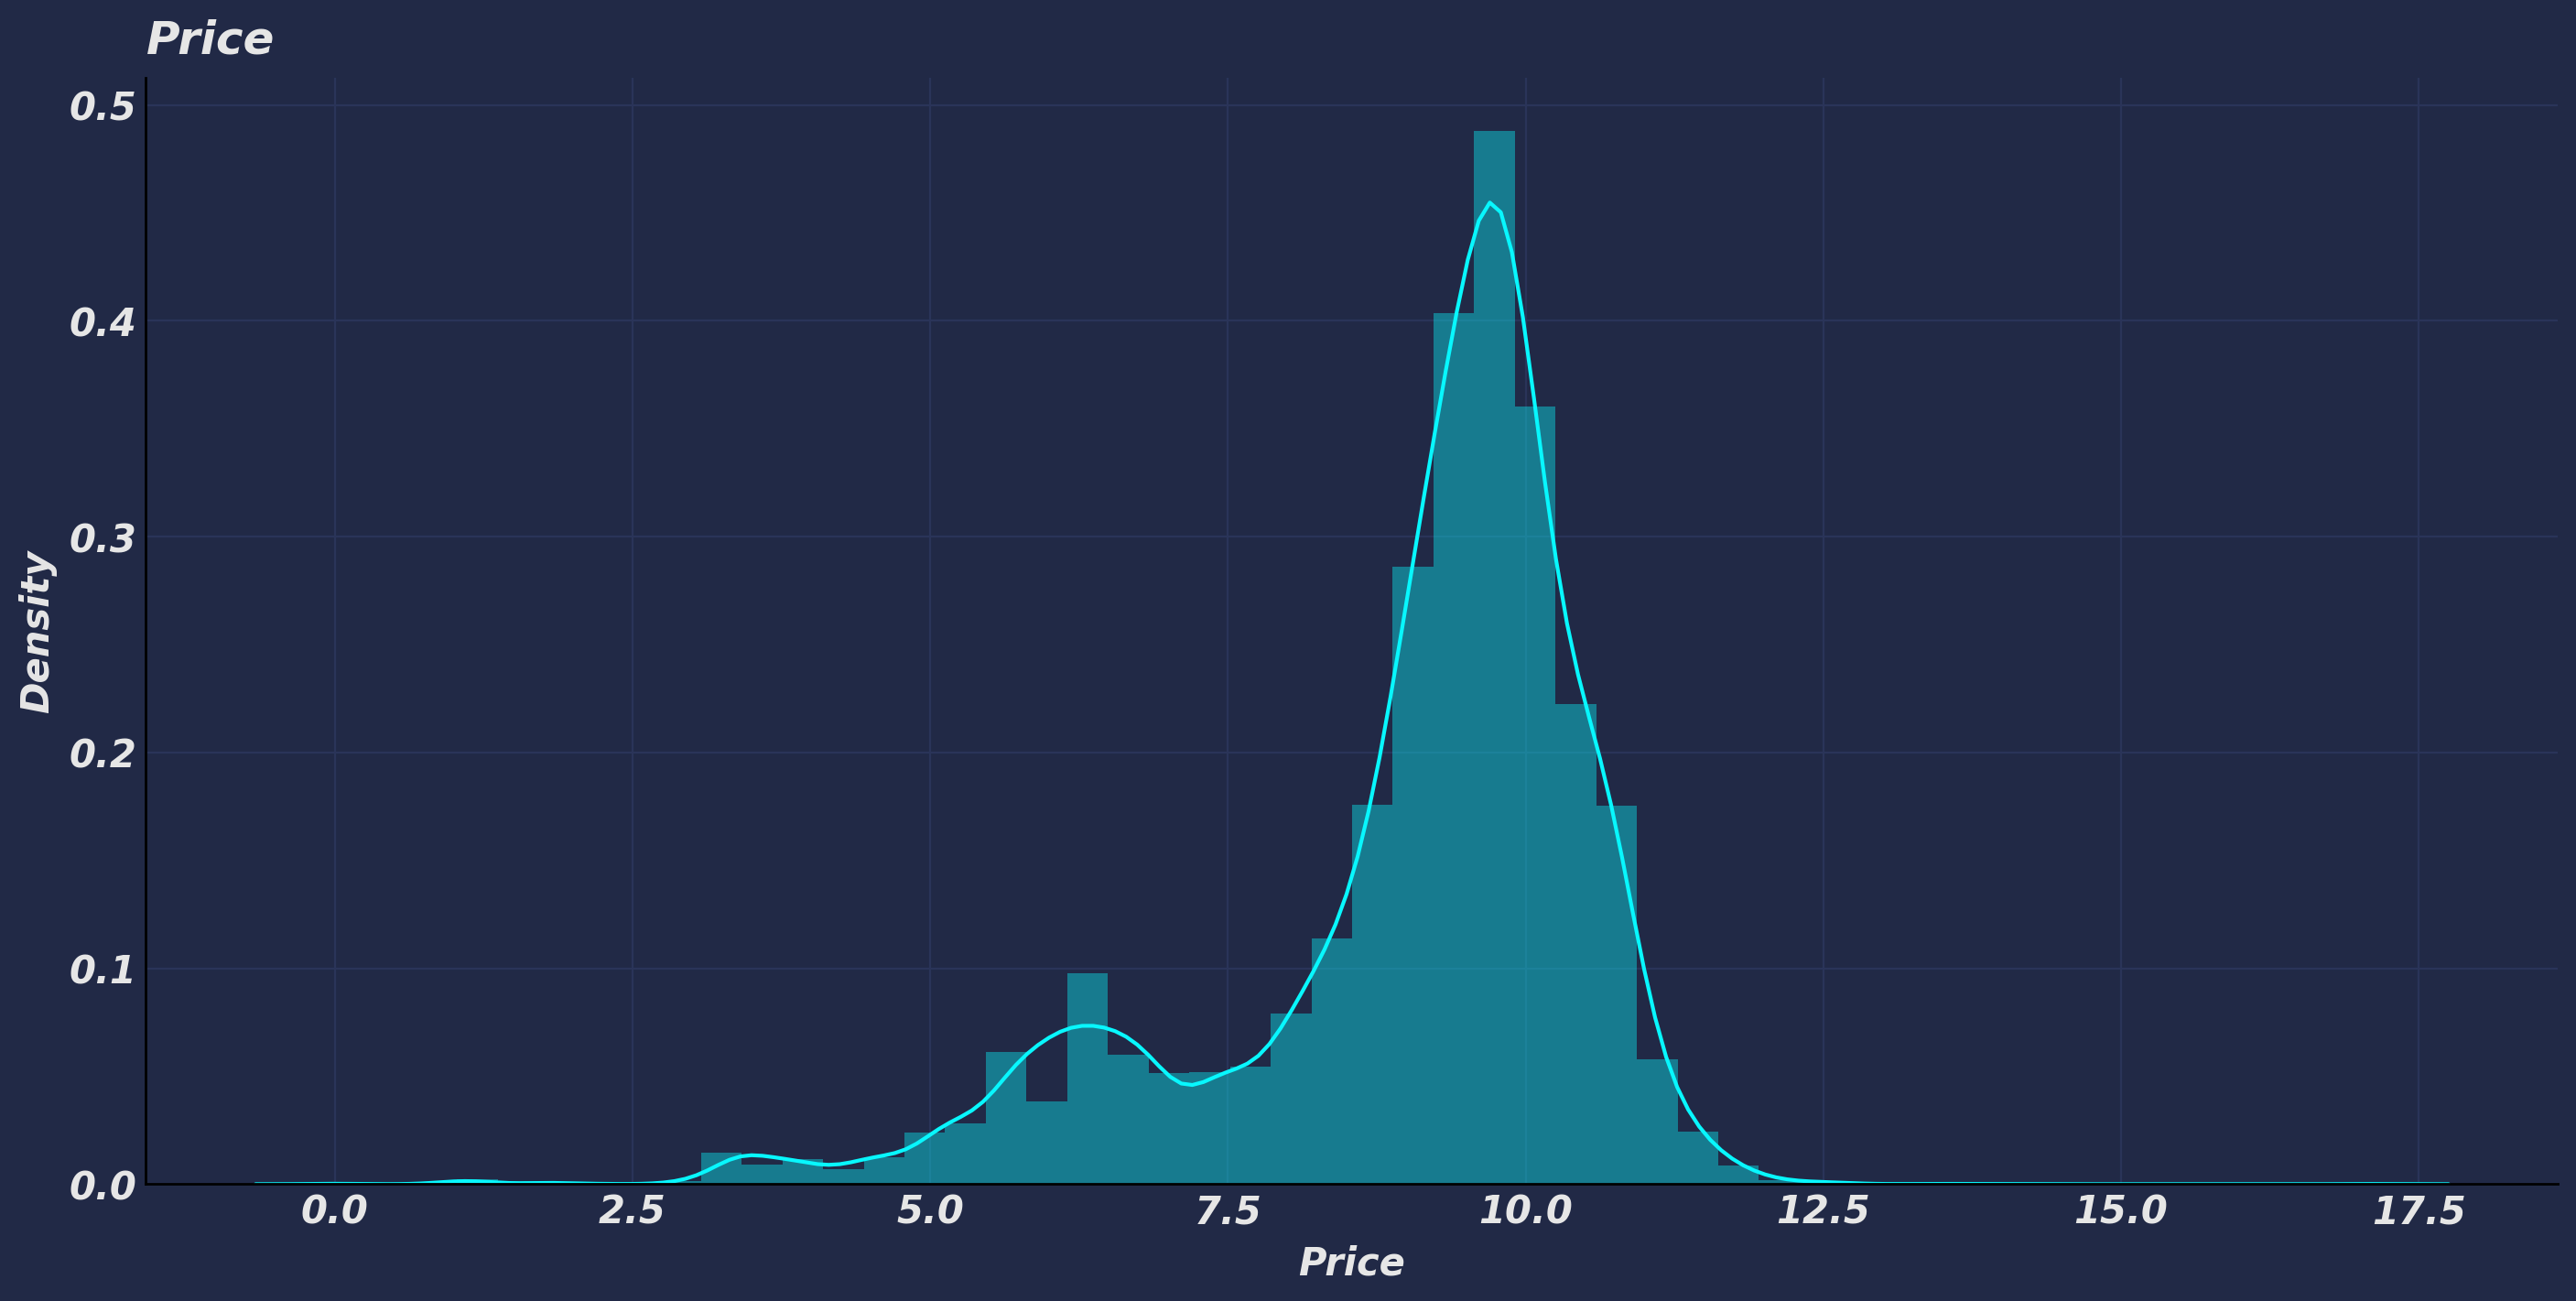

In [41]:
# setelah pennormalan mengunakan log

plt.figure(figsize=(17,8))

sns.distplot(np.log(train.Price)) 
plt.title("Price") 

print(f"skew: {np.log(train.Price).skew()}") 
print(f"kurt: {np.log(train.Price).kurt()}") 

In [5]:
# feature
feature = train.drop("Price",axis=1)

In [6]:
cater = feature.select_dtypes("object")
number = feature.select_dtypes("number")

In [ ]:
# categorical features


In [8]:
cater.describe()

Levy Manufacturer  Model Category Leather interior Fuel type  \
count   19237        19237  19237    19237            19237     19237   
unique    559           65   1590       11                2         7   
top         -      HYUNDAI  Prius    Sedan              Yes    Petrol   
freq     5819         3769   1083     8736            13954     10150   

       Engine volume Mileage Gear box type Drive wheels   Doors       Wheel  \
count          19237   19237         19237        19237   19237       19237   
unique           107    7687             4            3       3           2   
top                2    0 km     Automatic        Front  04-May  Left wheel   
freq            3916     721         13514        12874   18332       17753   

        Color  
count   19237  
unique     16  
top     Black  
freq     5033

In [64]:
cater.head()

Levy Manufacturer    Model   Category Leather interior Fuel type  \
0  1399        LEXUS   RX 450       Jeep              Yes    Hybrid   
1  1018    CHEVROLET  Equinox       Jeep               No    Petrol   
2     -        HONDA      FIT  Hatchback               No    Petrol   
3   862         FORD   Escape       Jeep              Yes    Hybrid   
4   446        HONDA      FIT  Hatchback              Yes    Petrol   

  Engine volume    Mileage Gear box type Drive wheels   Doors  \
0           3.5  186005 km     Automatic          4x4  04-May   
1             3  192000 km     Tiptronic          4x4  04-May   
2           1.3  200000 km      Variator        Front  04-May   
3           2.5  168966 km     Automatic          4x4  04-May   
4           1.3   91901 km     Automatic        Front  04-May   

              Wheel   Color  
0        Left wheel  Silver  
1        Left wheel   Black  
2  Right-hand drive   Black  
3        Left wheel   White  
4        Left wheel  Silver

In [61]:
#levy 
train.Levy.value_counts()

-        5709
765       482
891       453
639       403
640       398
         ... 
11706       1
461         1
2606        1
2913        1
972         1
Name: Levy, Length: 559, dtype: int64

In [7]:
for i in [train,test]:
    i["Levy"] = i.Levy.replace("-", "0").astype("int32") 

In [74]:
train.Levy.describe()

count    18924.000000
mean       632.886493
std        568.273736
min          0.000000
25%          0.000000
50%        642.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64

In [100]:
plt.figure(figsize=(17,8))

sns.distplot(train.Levy) 
plt.title("Levy") 

print(f"skew: {train.Levy.skew()}") 
print(f"kurt: {train.Levy.kurt()}")

skew: 2.4038112608110804
kurt: 29.584415421076425


In [69]:
plt.figure(figsize=(17,8))

sns.regplot(x = train.Levy, y=train.Price)
plt.title("Correlation of levy & Price") 

Text(0.0, 1.0, 'Correlation of levy & Price')

In [19]:
cek = train.query("Levy < 2000")
cek.shape

(18664, 18)

In [95]:
cek.sample(5)

ID  Price  Levy Manufacturer    Model  Prod. year     Category  \
18487  45806310   3136  3811         OPEL    Astra        2000  Goods wagon   
5207   45768377  30734  2151        LEXUS   GX 470        2009         Jeep   
2357   45803214  10036  5603      HYUNDAI   Sonata        2014        Sedan   
17495  45815413   4704  4741   VOLKSWAGEN    Jetta        2001        Sedan   
7333   45772778    862  2002        DODGE  Avenger        2008        Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
18487               No       CNG           1.6  135000 km        4.0   
5207               Yes    Petrol           4.7  264339 km        8.0   
2357               Yes       LPG            20  333686 km        4.0   
17495               No    Petrol             2  111111 km        4.0   
7333               Yes    Petrol           3.8  319858 km        6.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
18487        Manual        Front  04-May  Right-hand drive  Silver        2  
5207      Automatic          4x4  04-May        Left wheel   Black        0  
2357      Automatic        Front  04-May        Left wheel  Silver        4  
17495        Manual        Front  04-May  Right-hand drive   Black        0  
7333      Automatic        Front  04-May        Left wheel  Silver       12

In [99]:
# after drop Outlier
plt.figure(figsize=(17,8))

sns.distplot(cek.Levy) 
plt.title("Levy after drop outlier") 

print(f"skew: {cek.Levy.skew()}") 
print(f"kurt: {cek.Levy.kurt()}")

skew: 0.273293712203384
kurt: -0.6227150315235419


Text(0.0, 1.0, 'Correlation of levy & Price')

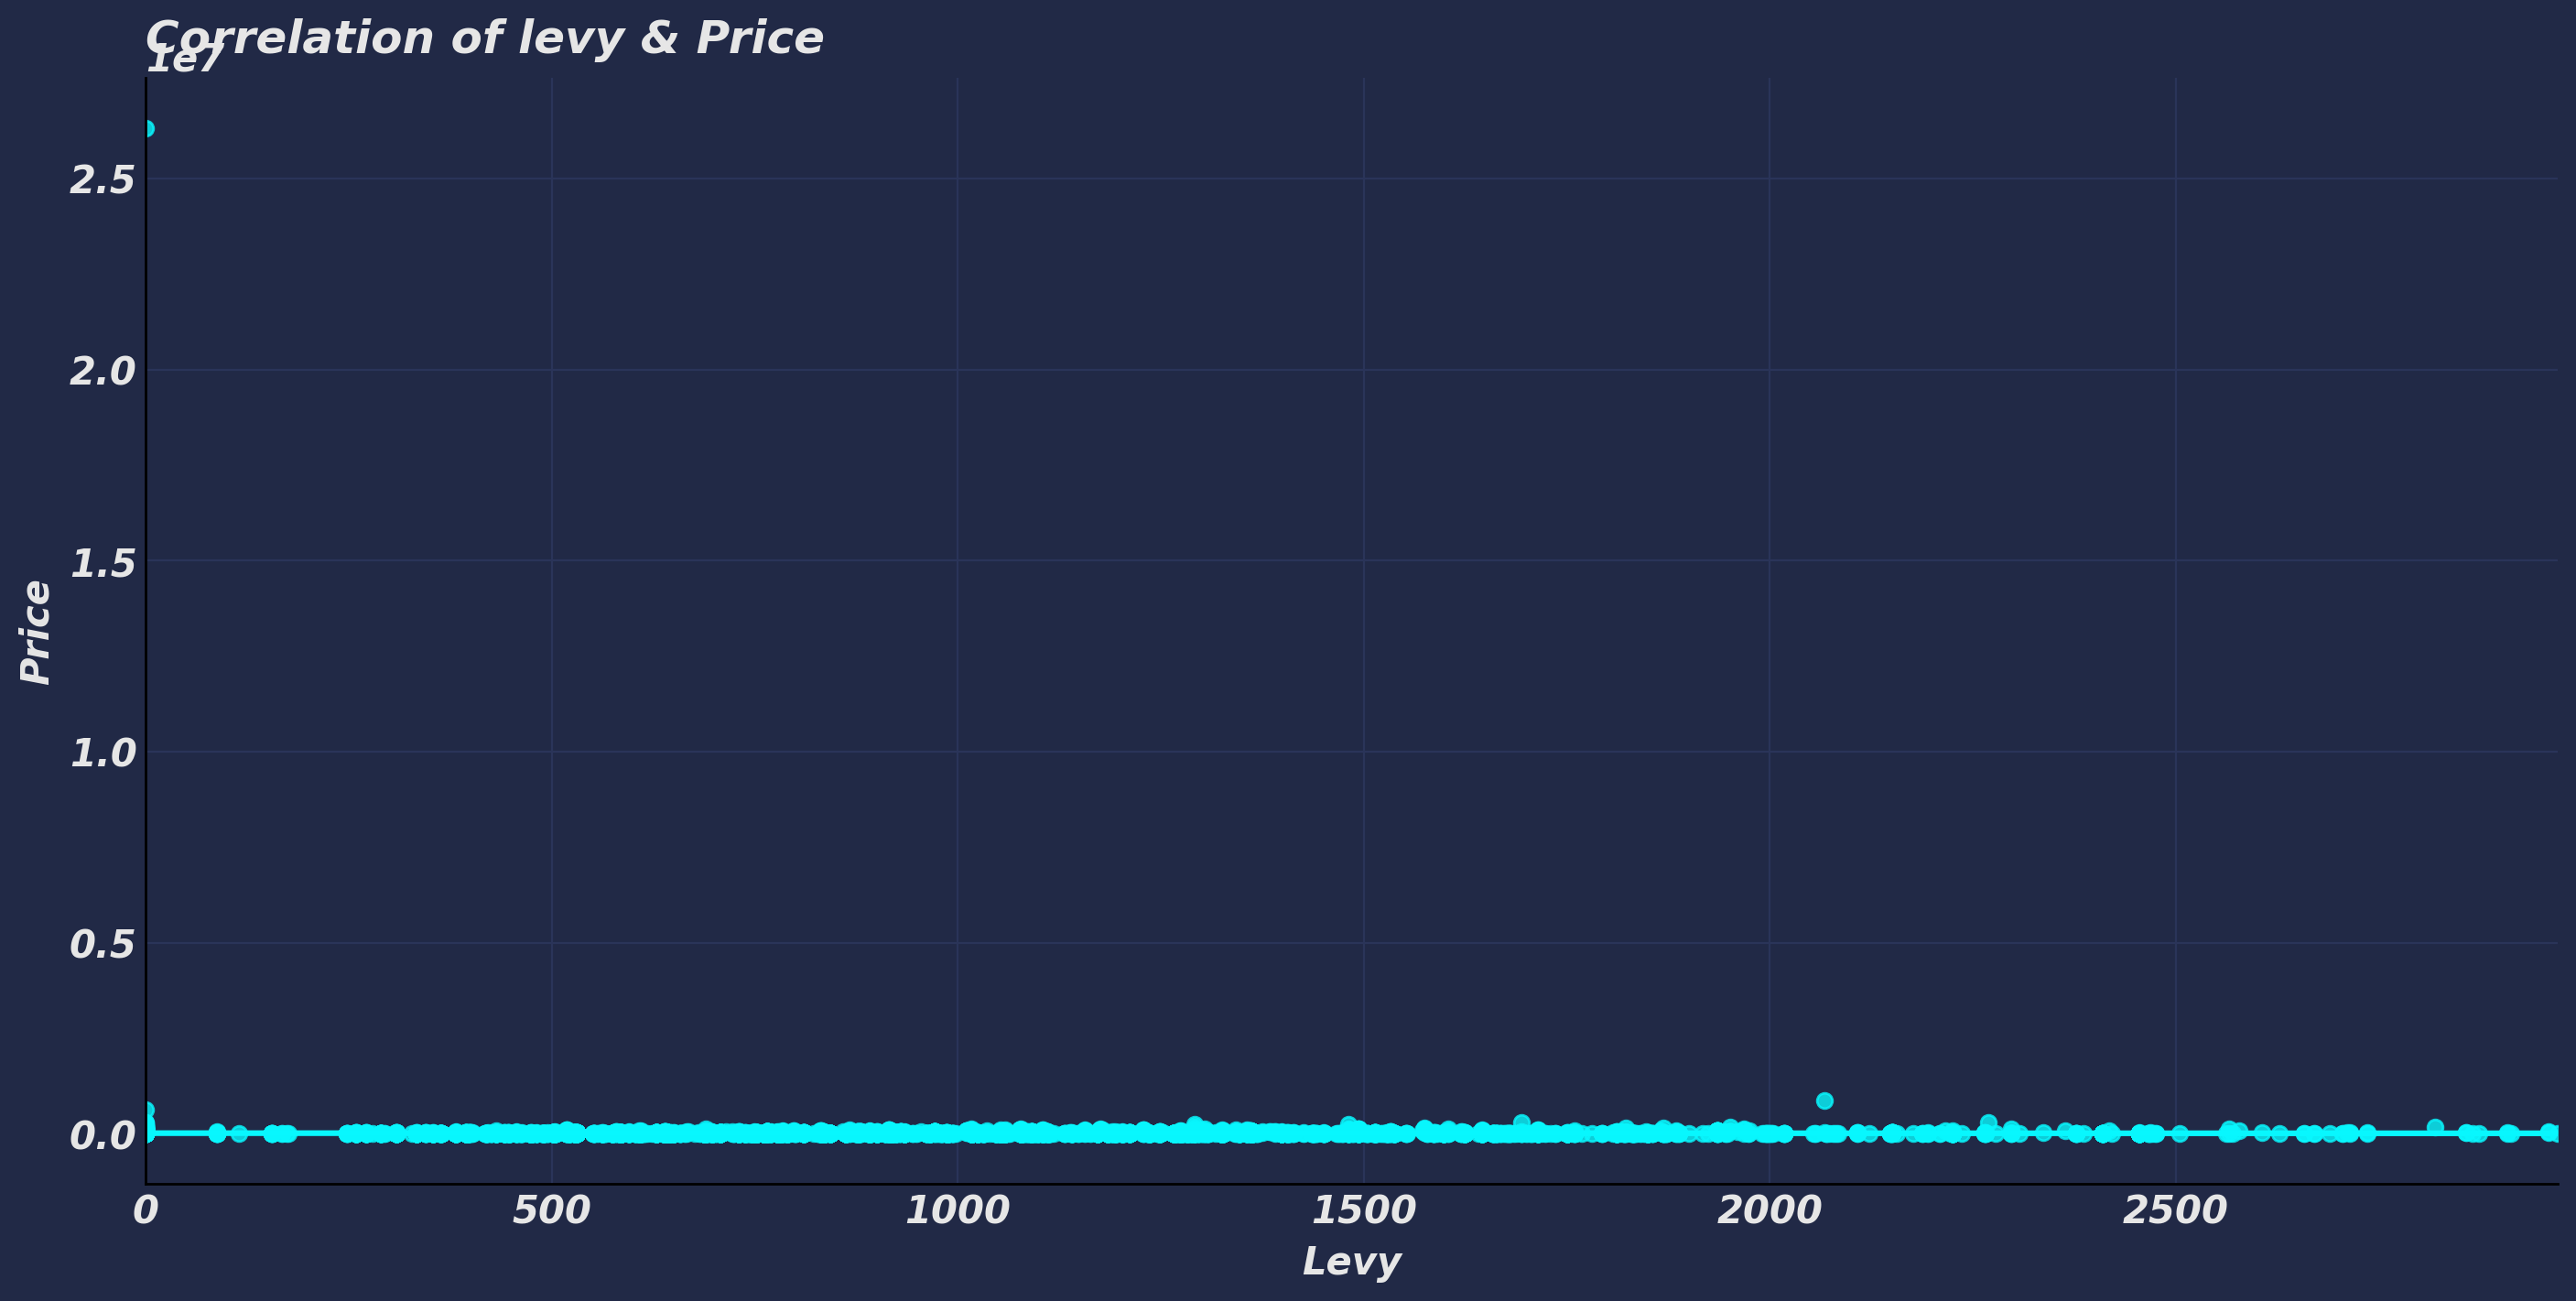

In [86]:
# after drop outlier
plt.figure(figsize=(17,8))

sns.regplot(x = cek.Levy, y=cek.Price)
plt.title("Correlation of levy & Price") 

In [8]:
# drop levy outlier
train = train.query("Levy < 2000") 

In [9]:
# Manufacturer
train.Manufacturer.value_counts() 

HYUNDAI          3723
TOYOTA           3573
MERCEDES-BENZ    1997
FORD             1075
CHEVROLET        1039
BMW              1020
HONDA             949
LEXUS             842
NISSAN            641
VOLKSWAGEN        570
SSANGYONG         439
KIA               416
OPEL              395
MITSUBISHI        286
SUBARU            269
AUDI              253
MAZDA             173
JEEP              136
DAEWOO             91
DODGE              83
SUZUKI             76
FIAT               76
PORSCHE            51
LAND ROVER         48
VAZ                47
MINI               47
JAGUAR             41
RENAULT            36
CHRYSLER           24
INFINITI           23
SKODA              20
VOLVO              18
PEUGEOT            17
BUICK              16
ACURA              15
LINCOLN            15
CADILLAC           14
UAZ                12
DAIHATSU           12
GMC                12
GAZ                12
CITROEN             9
SCION               7
HUMMER              4
MOSKVICH            4
ISUZU     

In [13]:
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    background_color='white',
    width = 2000,
    height = 1500
).generate(" ".join(train["Manufacturer"])) 

plt.title("Manufacturer ")
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1999.5, 1499.5, -0.5)

In [26]:
# rata² harga dari manufacturer

manuf = train.groupby("Manufacturer")["Price"]
manuf.describe().style.bar(subset=["mean"], color="orange") 

In [25]:
# model
train.Model.value_counts()[:10]

Prius       1067
Sonata      1064
Camry        929
Elantra      909
Santa FE     527
E 350        518
FIT          443
H1           435
Tucson       426
X5           346
Name: Model, dtype: int64

(-0.5, 1999.5, 1499.5, -0.5)

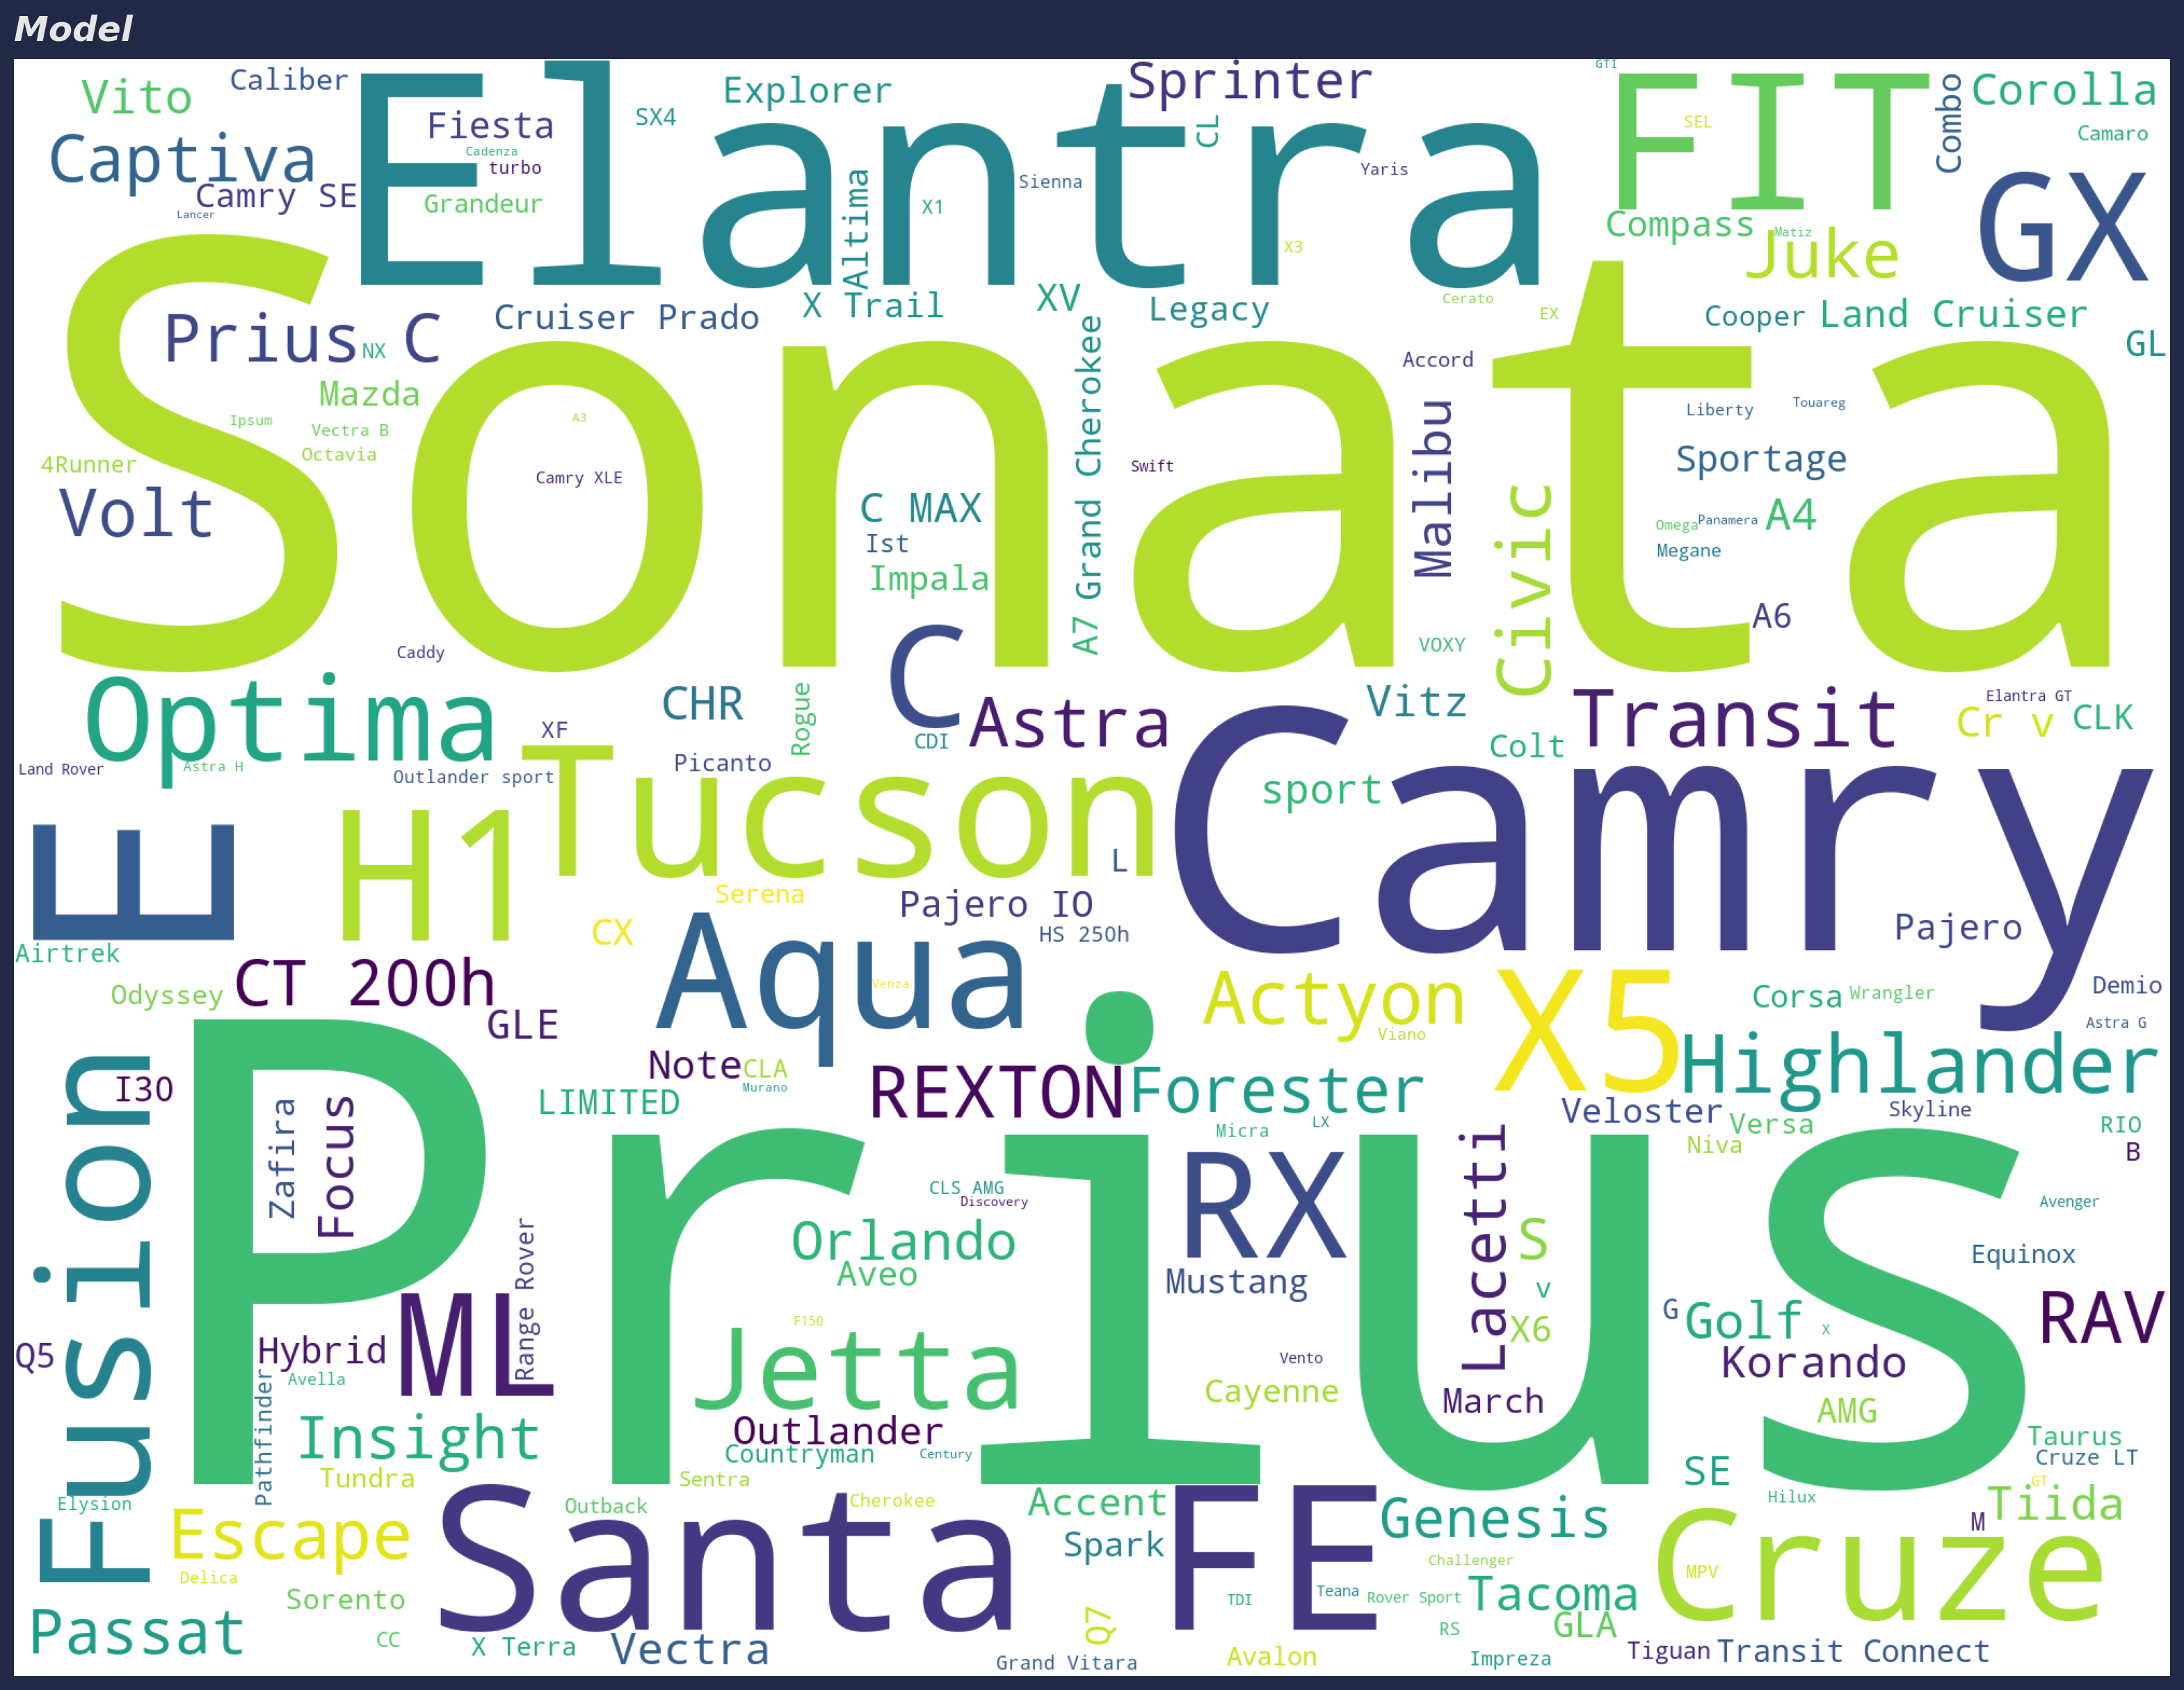

In [50]:
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    background_color='white',
    width = 2000,
    height = 1500
).generate(" ".join(train["Model"])) 

plt.title("Model ")
plt.imshow(wordcloud)
plt.axis('off')

In [58]:
train.Model.sample(10) 

3686             550 GT
14567             Camry
5813     Camry sport se
16244               FIT
11356           Elantra
7958               Volt
1705                535
11298          Explorer
13471             C 180
6548             Sonata
Name: Model, dtype: object

In [56]:
# rata² harga dari model

model = train.groupby("Model")["Price"].describe()[:10].sort_values("count", ascending=False) 
model.style.bar(subset=["mean"], color="orange") 

In [9]:
for i in [train,test]:
    i.drop("Model", axis=1, inplace=True) 

In [59]:
# Category
train.Category.value_counts()

Sedan          8524
Jeep           5245
Hatchback      2790
Minivan         618
Coupe           515
Universal       355
Microbus        298
Goods wagon     227
Pickup           49
Cabriolet        32
Limousine        11
Name: Category, dtype: int64

Text(0, 0.5, 'Category')

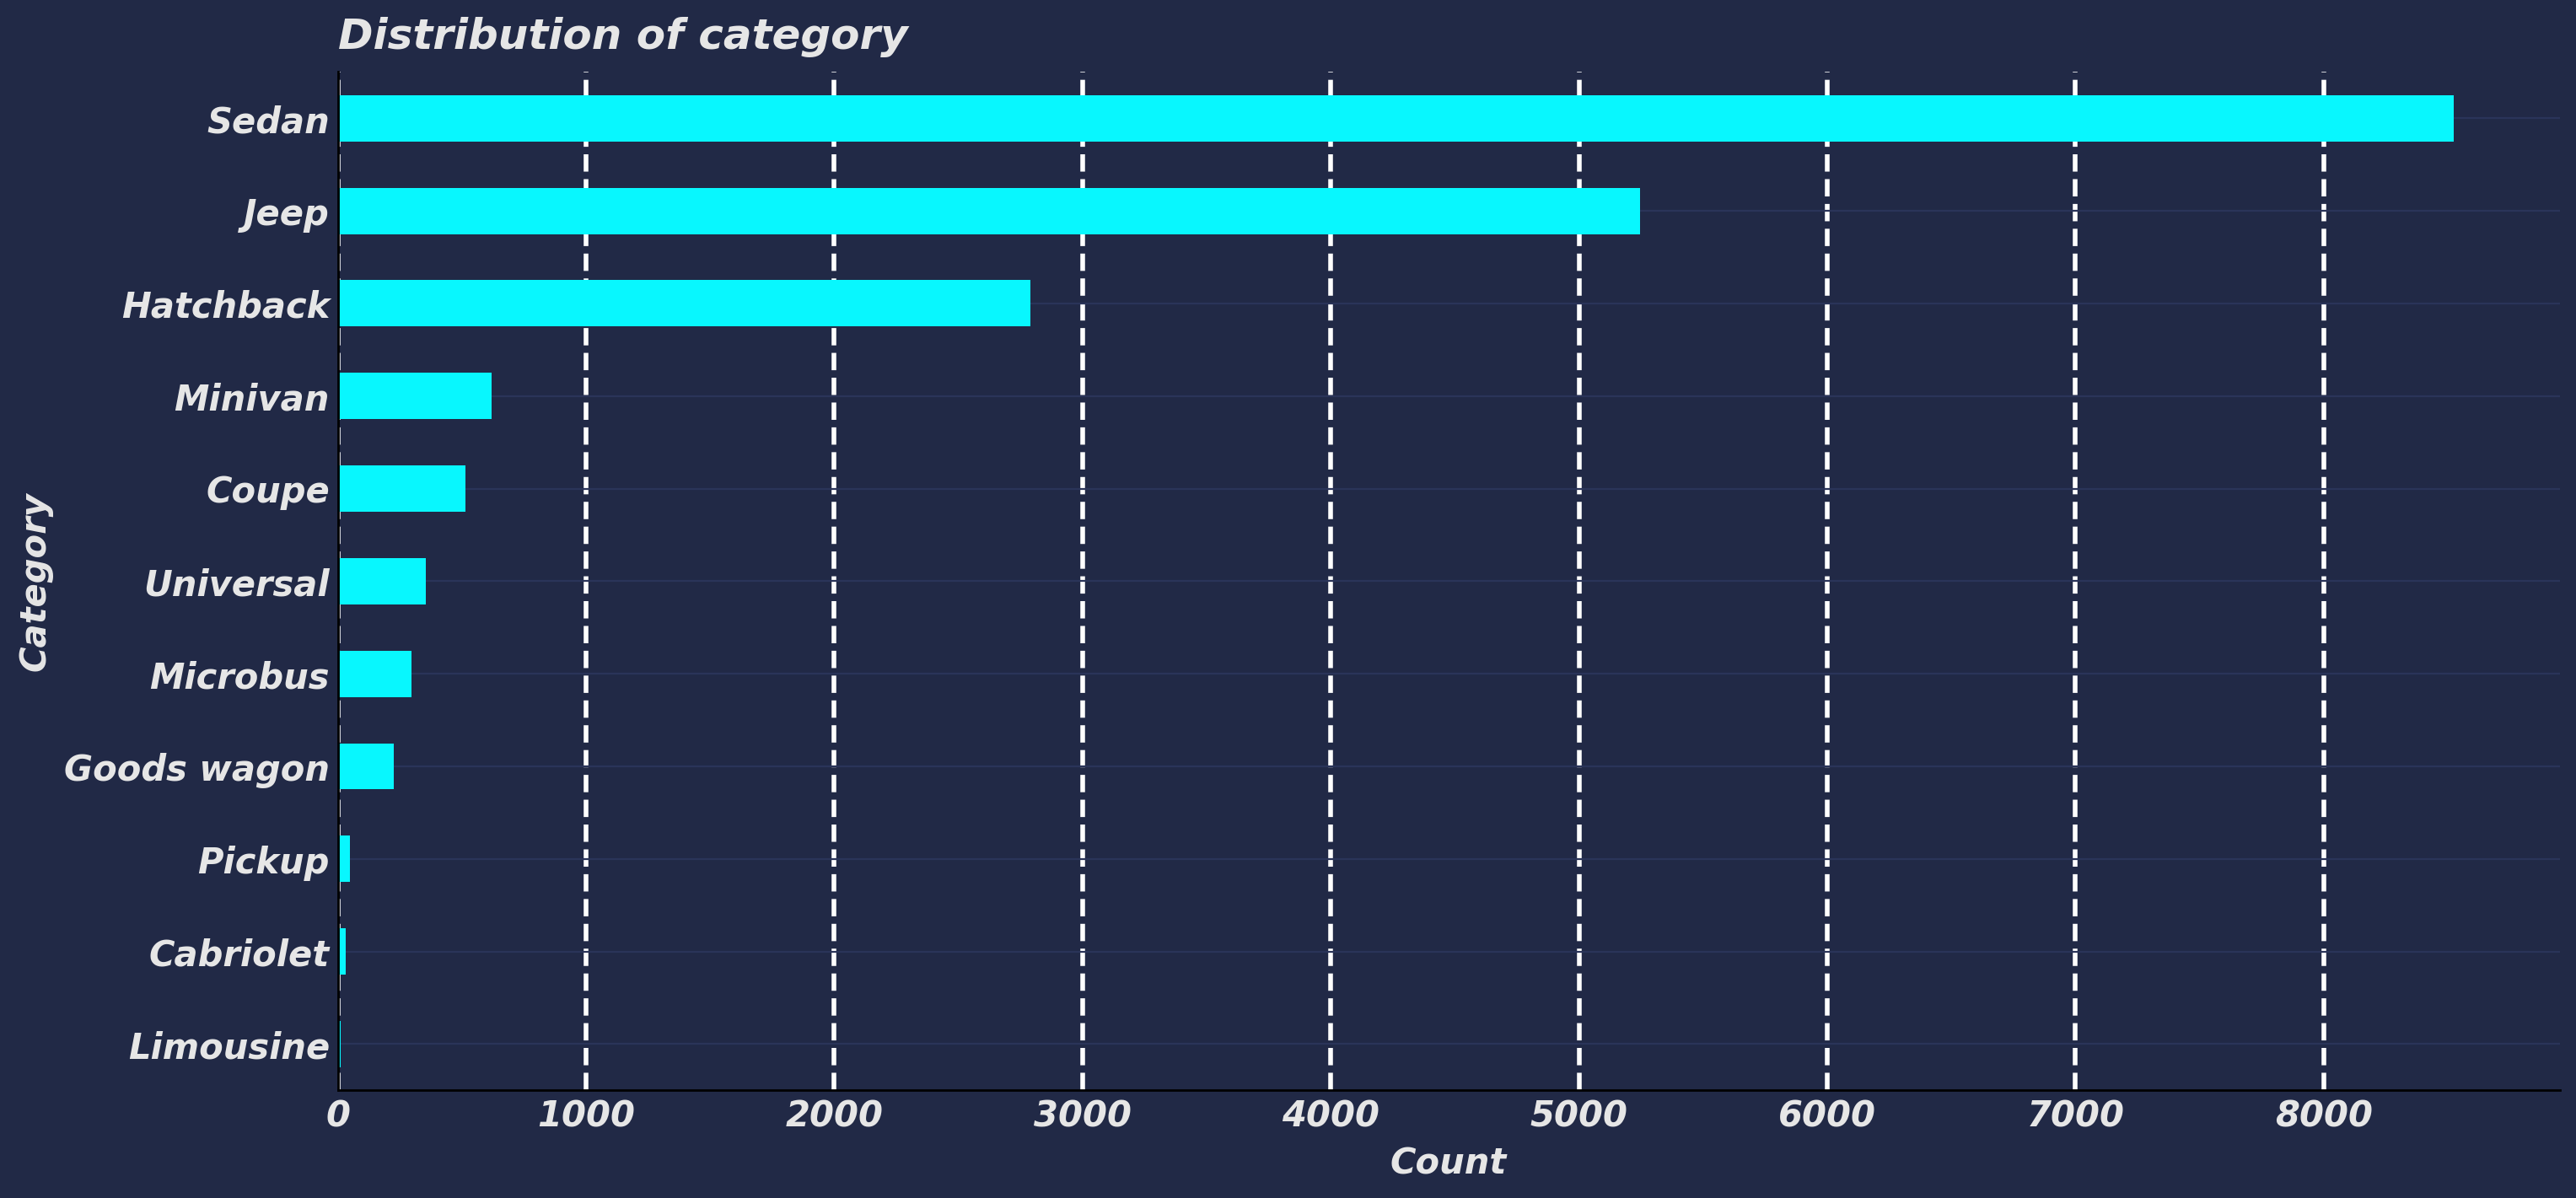

In [65]:
# distribution of categor
train.Category.value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(17, 8)) 
plt.grid(axis="x", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of category") 
plt.xlabel("Count") 
plt.ylabel("Category") 


In [68]:
train.groupby("Category")["Price"].mean().sort_values(ascending=False).to_frame()

Price
Category                  
Goods wagon  125841.929515
Pickup        29837.632653
Jeep          24061.013918
Cabriolet     23418.406250
Universal     23167.430986
Coupe         21106.240777
Minivan       20722.406149
Microbus      18577.993289
Sedan         14162.167644
Limousine     11534.454545
Hatchback     11354.558065

Text(0.0, 1.0, 'Category by price')

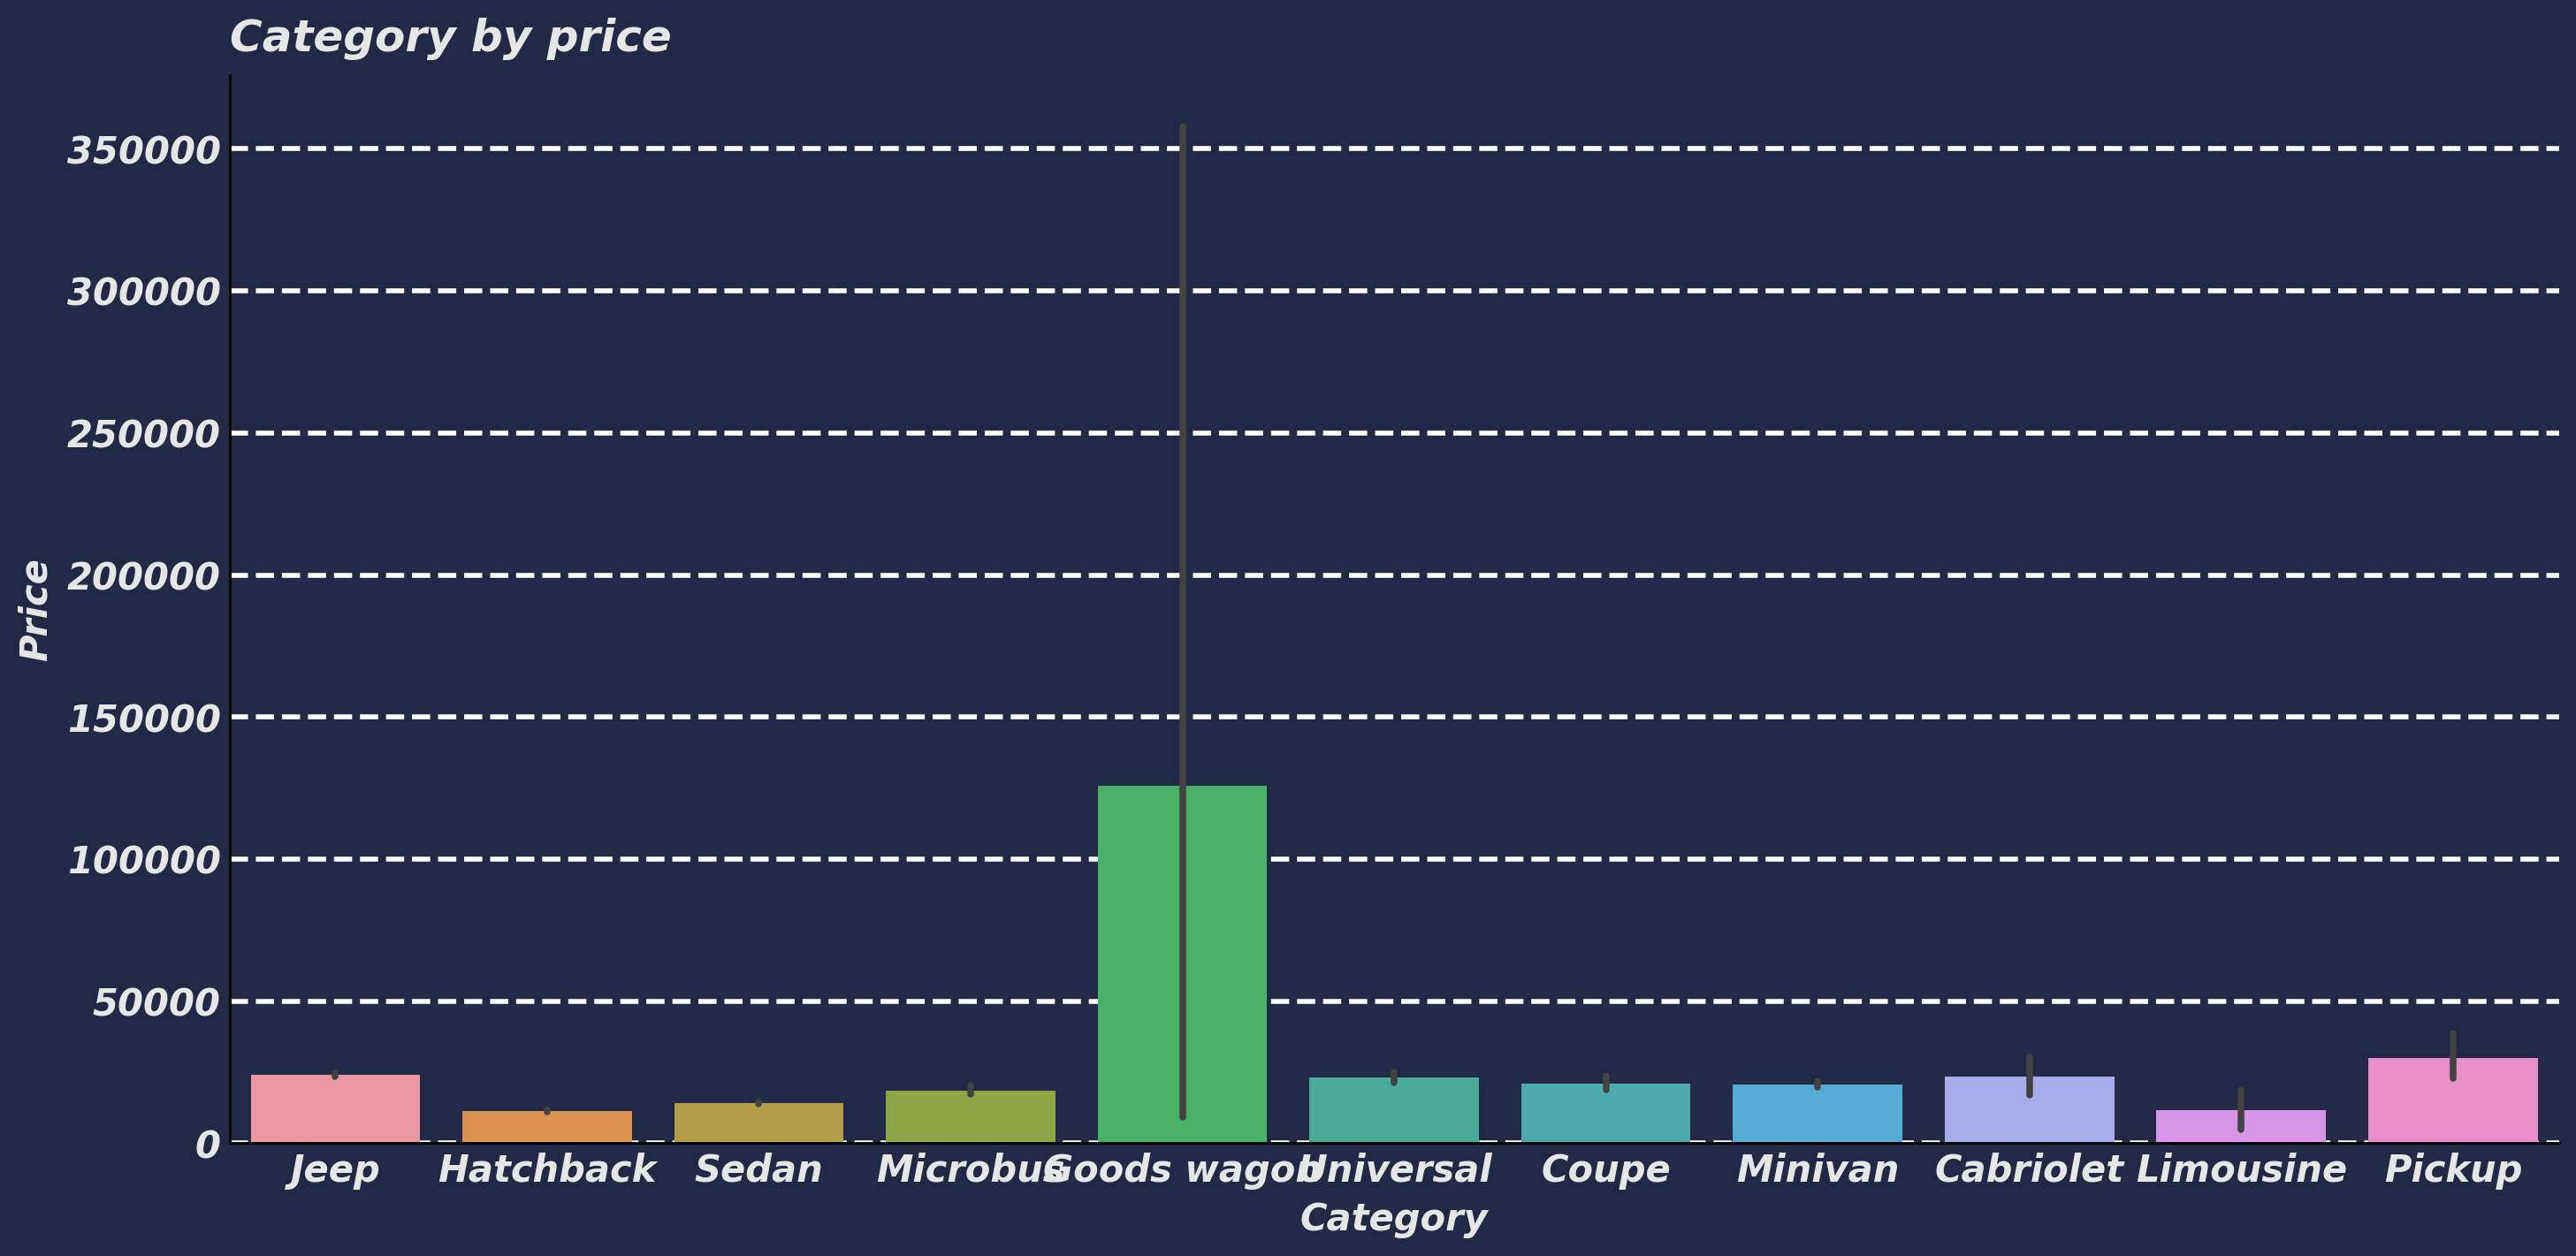

In [85]:
plt.figure(figsize=(17,8))

sns.barplot(x=train.Category, y=train.Price)
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 
plt.title("Category by price") 

In [74]:
# Leather interior
train["Leather interior"].value_counts() 

Yes    13501
No      5163
Name: Leather interior, dtype: int64

Text(0.5, 0, 'Leather interior')

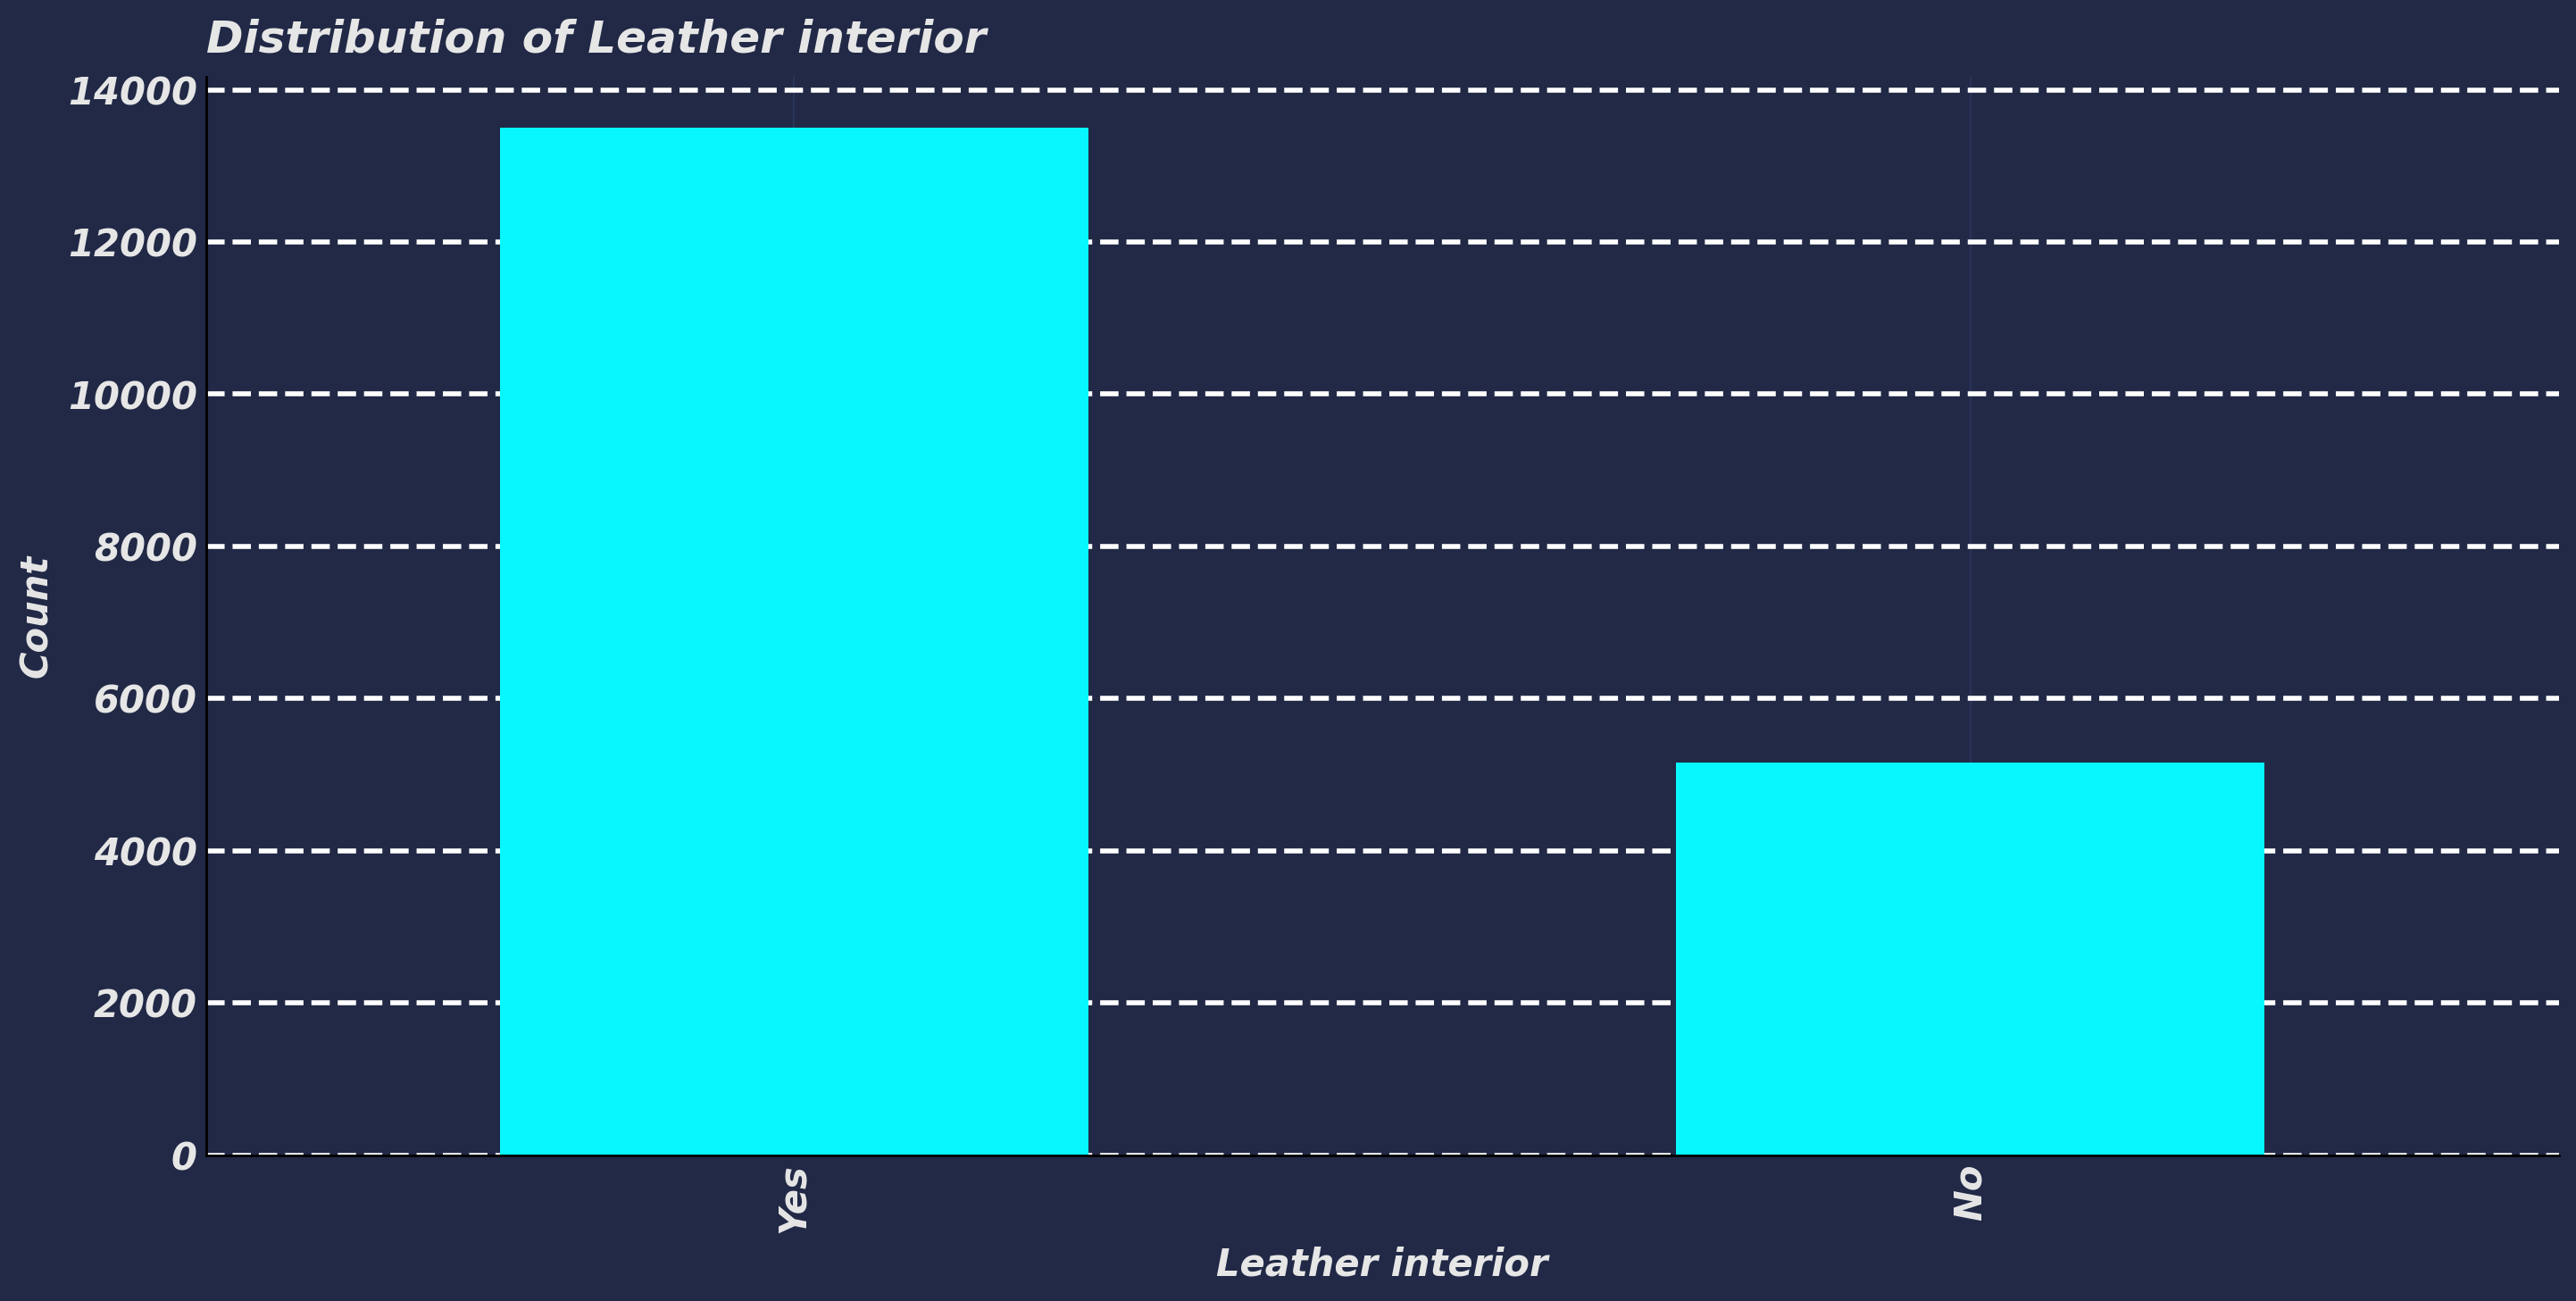

In [75]:
# distribution of categor
train["Leather interior"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of Leather interior") 
plt.ylabel("Count") 
plt.xlabel("Leather interior") 


In [83]:
train.groupby("Leather interior")["Price"].mean().to_frame()

Price
Leather interior              
No                18457.234554
Yes               18638.924598

Text(0.0, 1.0, 'Leather_interior by price')

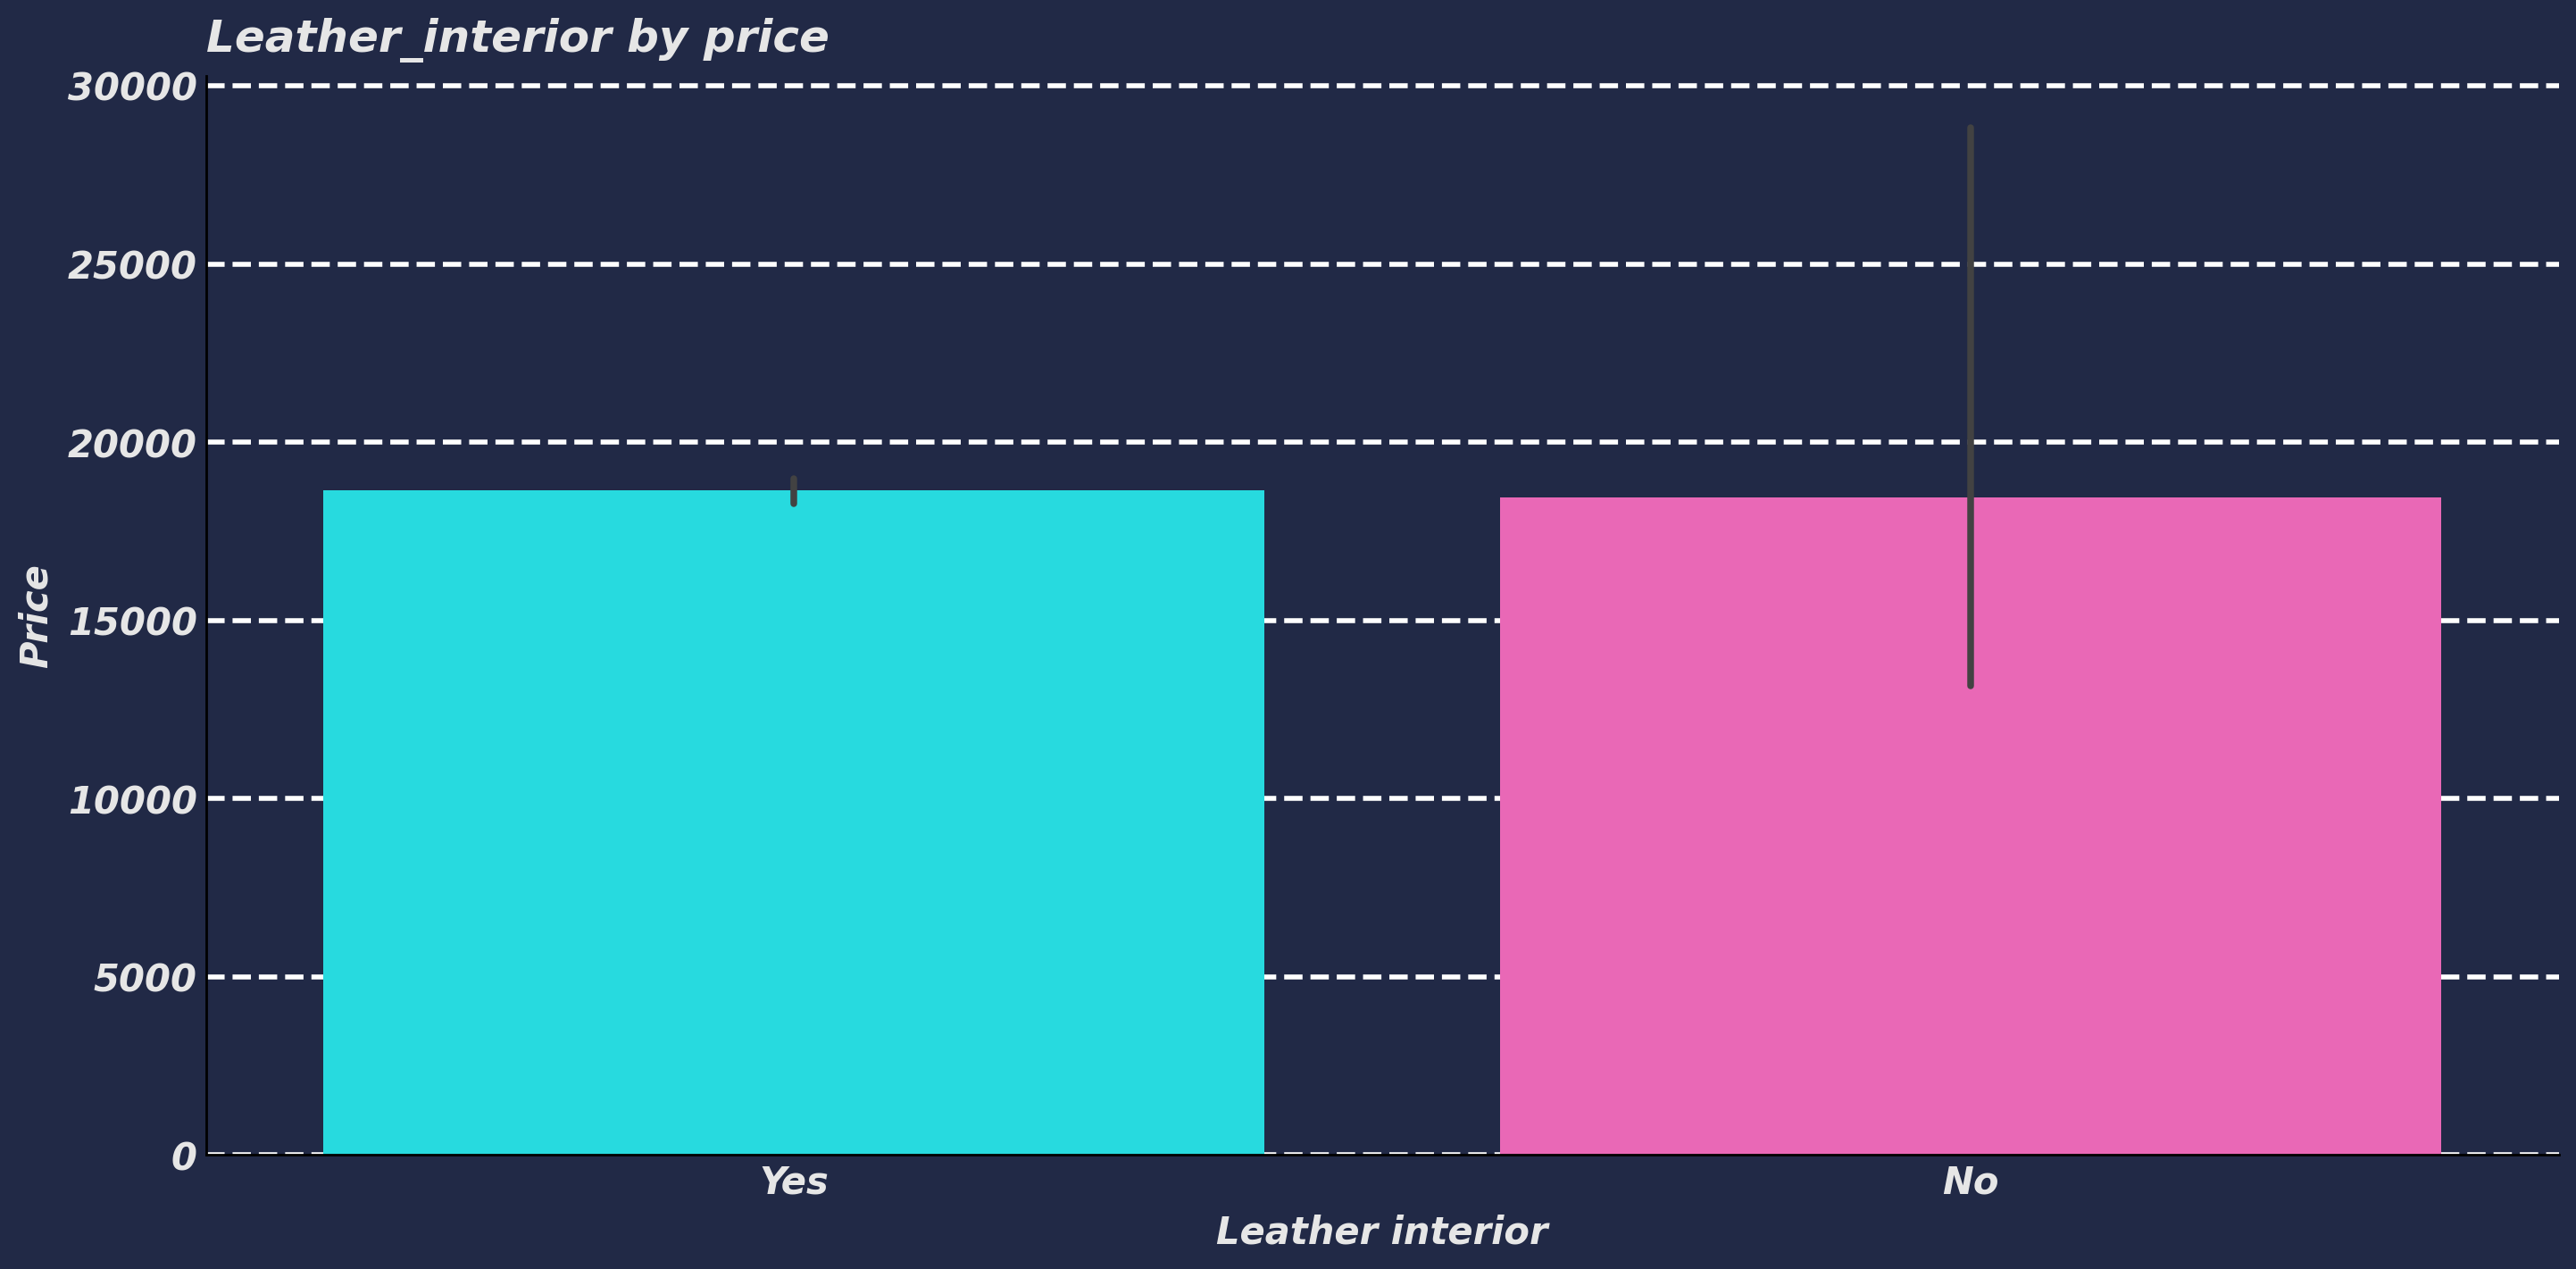

In [88]:
plt.figure(figsize=(17,8))

sns.barplot(x=train["Leather interior"], y=train.Price)
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 
plt.title("Leather_interior by price") 

In [15]:
# fuel type
train["Fuel type"].value_counts() 

Petrol            9916
Diesel            4025
Hybrid            3569
LPG                887
CNG                490
Plug-in Hybrid      86
Hydrogen             1
Name: Fuel type, dtype: int64

Text(0.5, 0, 'Fuel type')

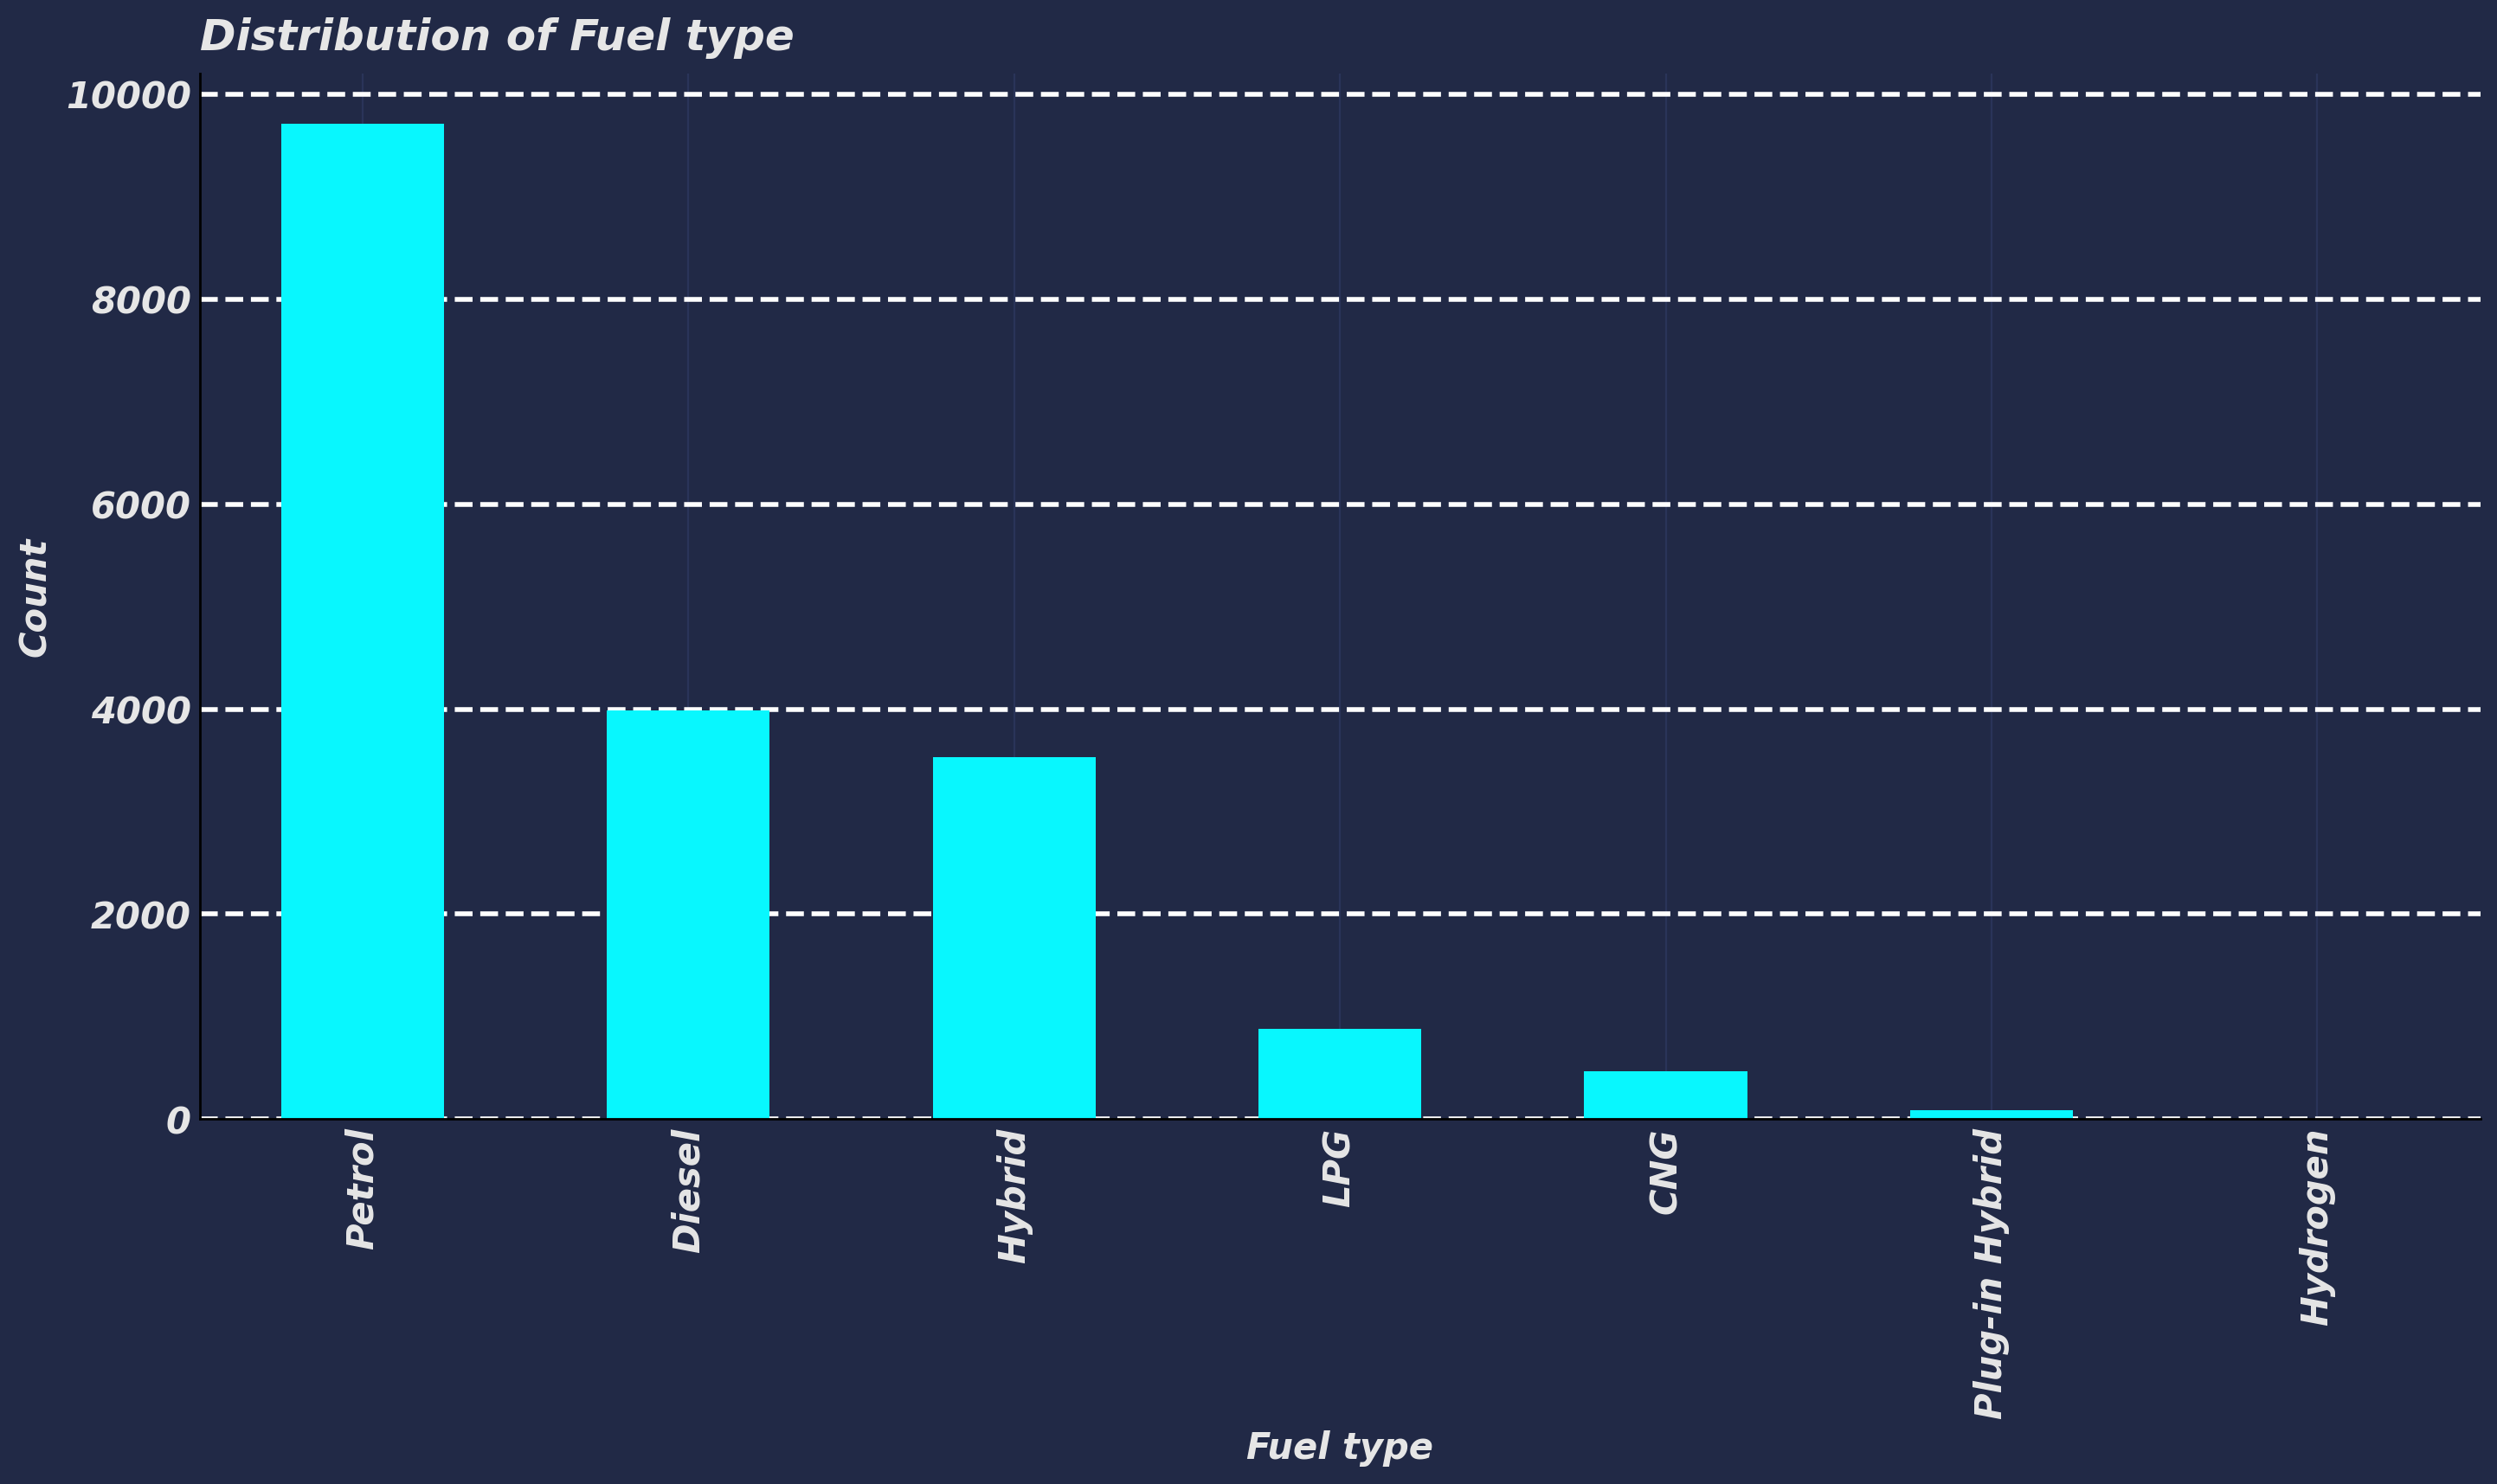

In [76]:
# distribution of categor
train["Fuel type"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of Fuel type") 
plt.ylabel("Count") 
plt.xlabel("Fuel type") 


In [18]:
train.groupby("Fuel type")["Price"].mean().to_frame() 

Price
Fuel type                   
CNG              8494.573469
Diesel          30692.553043
Hybrid          10832.934716
Hydrogen        20385.000000
LPG             13321.183766
Petrol          17336.848628
Plug-in Hybrid  23700.453488

In [10]:
fuel = {"Plug-in Hybrid": "Others", 
        "Hydrogen": "Others"}

In [78]:
new_ft = train["Fuel type"].replace(fuel) 

In [26]:
new_ft.value_counts()

Petrol    9916
Diesel    4025
Hybrid    3569
LPG        887
CNG        490
Others      87
Name: Fuel type, dtype: int64

In [28]:
new_ft.describe()

count      18974
unique         6
top       Petrol
freq        9916
Name: Fuel type, dtype: object

In [29]:
train.groupby(new_ft)["Price"].mean().to_frame() 

Price
Fuel type              
CNG         8494.573469
Diesel     30692.553043
Hybrid     10832.934716
LPG        13321.183766
Others     23662.344828
Petrol     17336.848628

In [11]:
for i in [train, test]:
    i["Fuel type"] = i["Fuel type"].replace(fuel) 

In [35]:
# Engine volume
train["Engine volume"].value_counts() 

2            3912
2.5          2270
1.8          1758
1.6          1461
1.5          1310
             ... 
6.7             1
3.7 Turbo       1
3.9             1
0.2 Turbo       1
5.4 Turbo       1
Name: Engine volume, Length: 102, dtype: int64

In [80]:
# extract turbo 
turbo = train["Engine volume"].apply(lambda x: "yes" if "Turbo" in str(x) else "no") 

In [39]:
turbo.value_counts()

no     17048
yes     1926
Name: Engine volume, dtype: int64

Text(0.5, 0, 'has turbo')

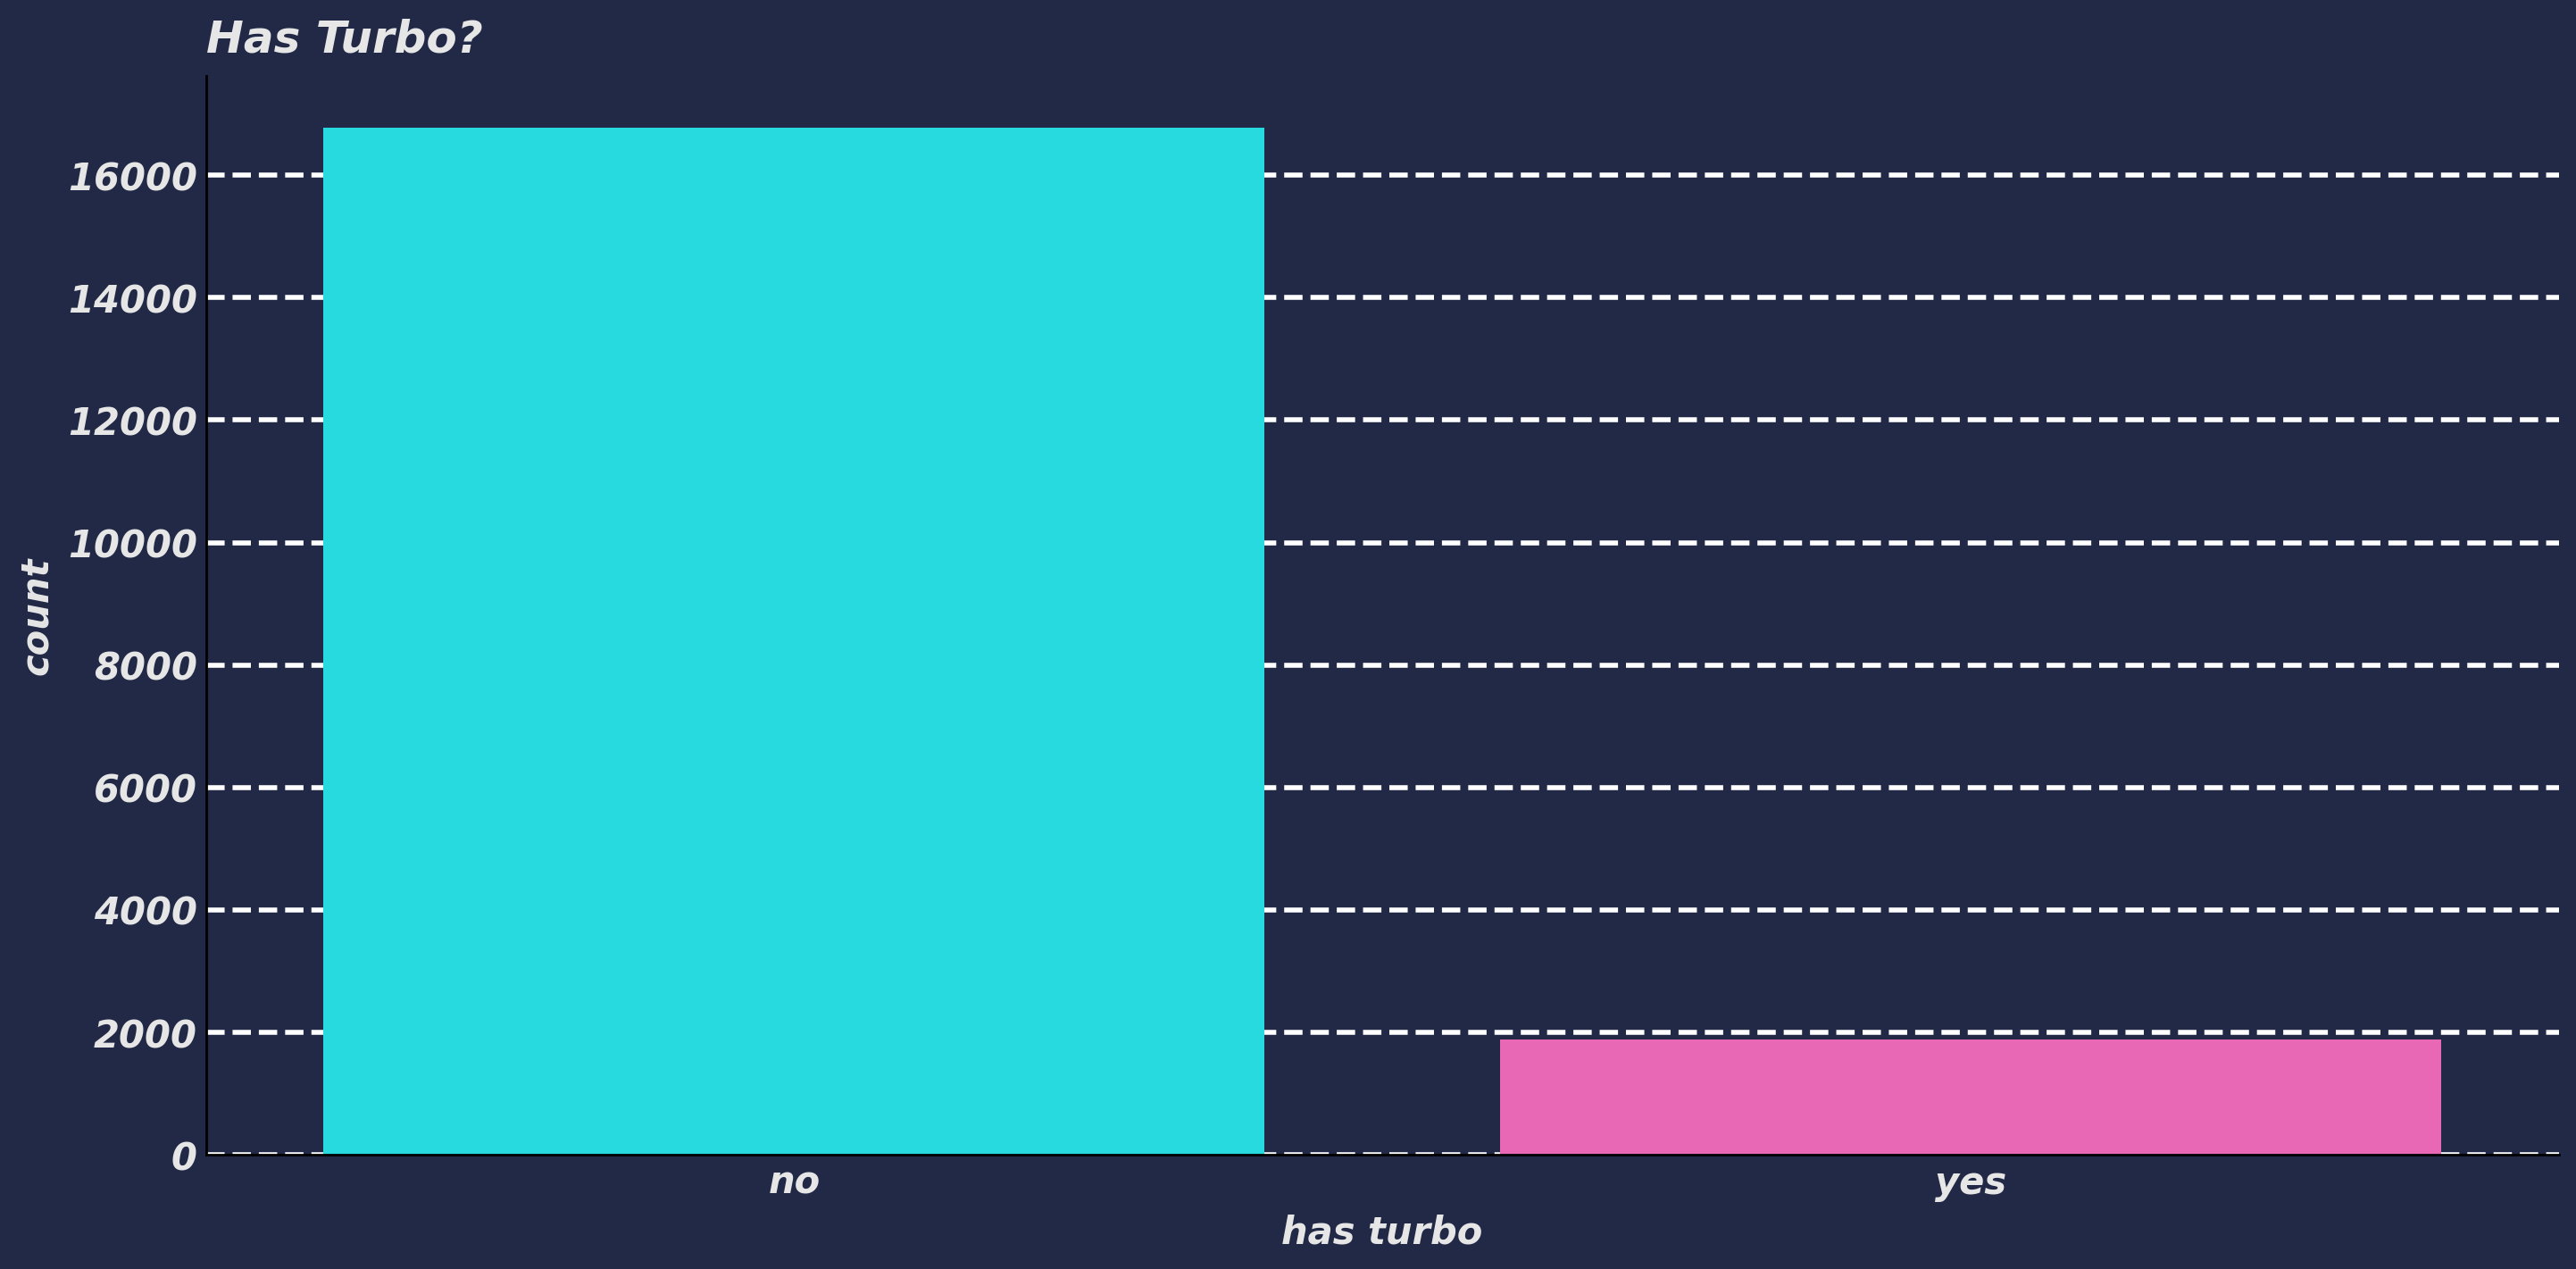

In [81]:
plt.figure(figsize=(17,8))

sns.countplot(turbo)
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 
plt.title("Has Turbo?") 
plt.xlabel("has turbo") 

In [40]:
turbo.describe()

count     18974
unique        2
top          no
freq      17048
Name: Engine volume, dtype: object

Price
Engine volume              
no             17485.304286
yes            28398.448861

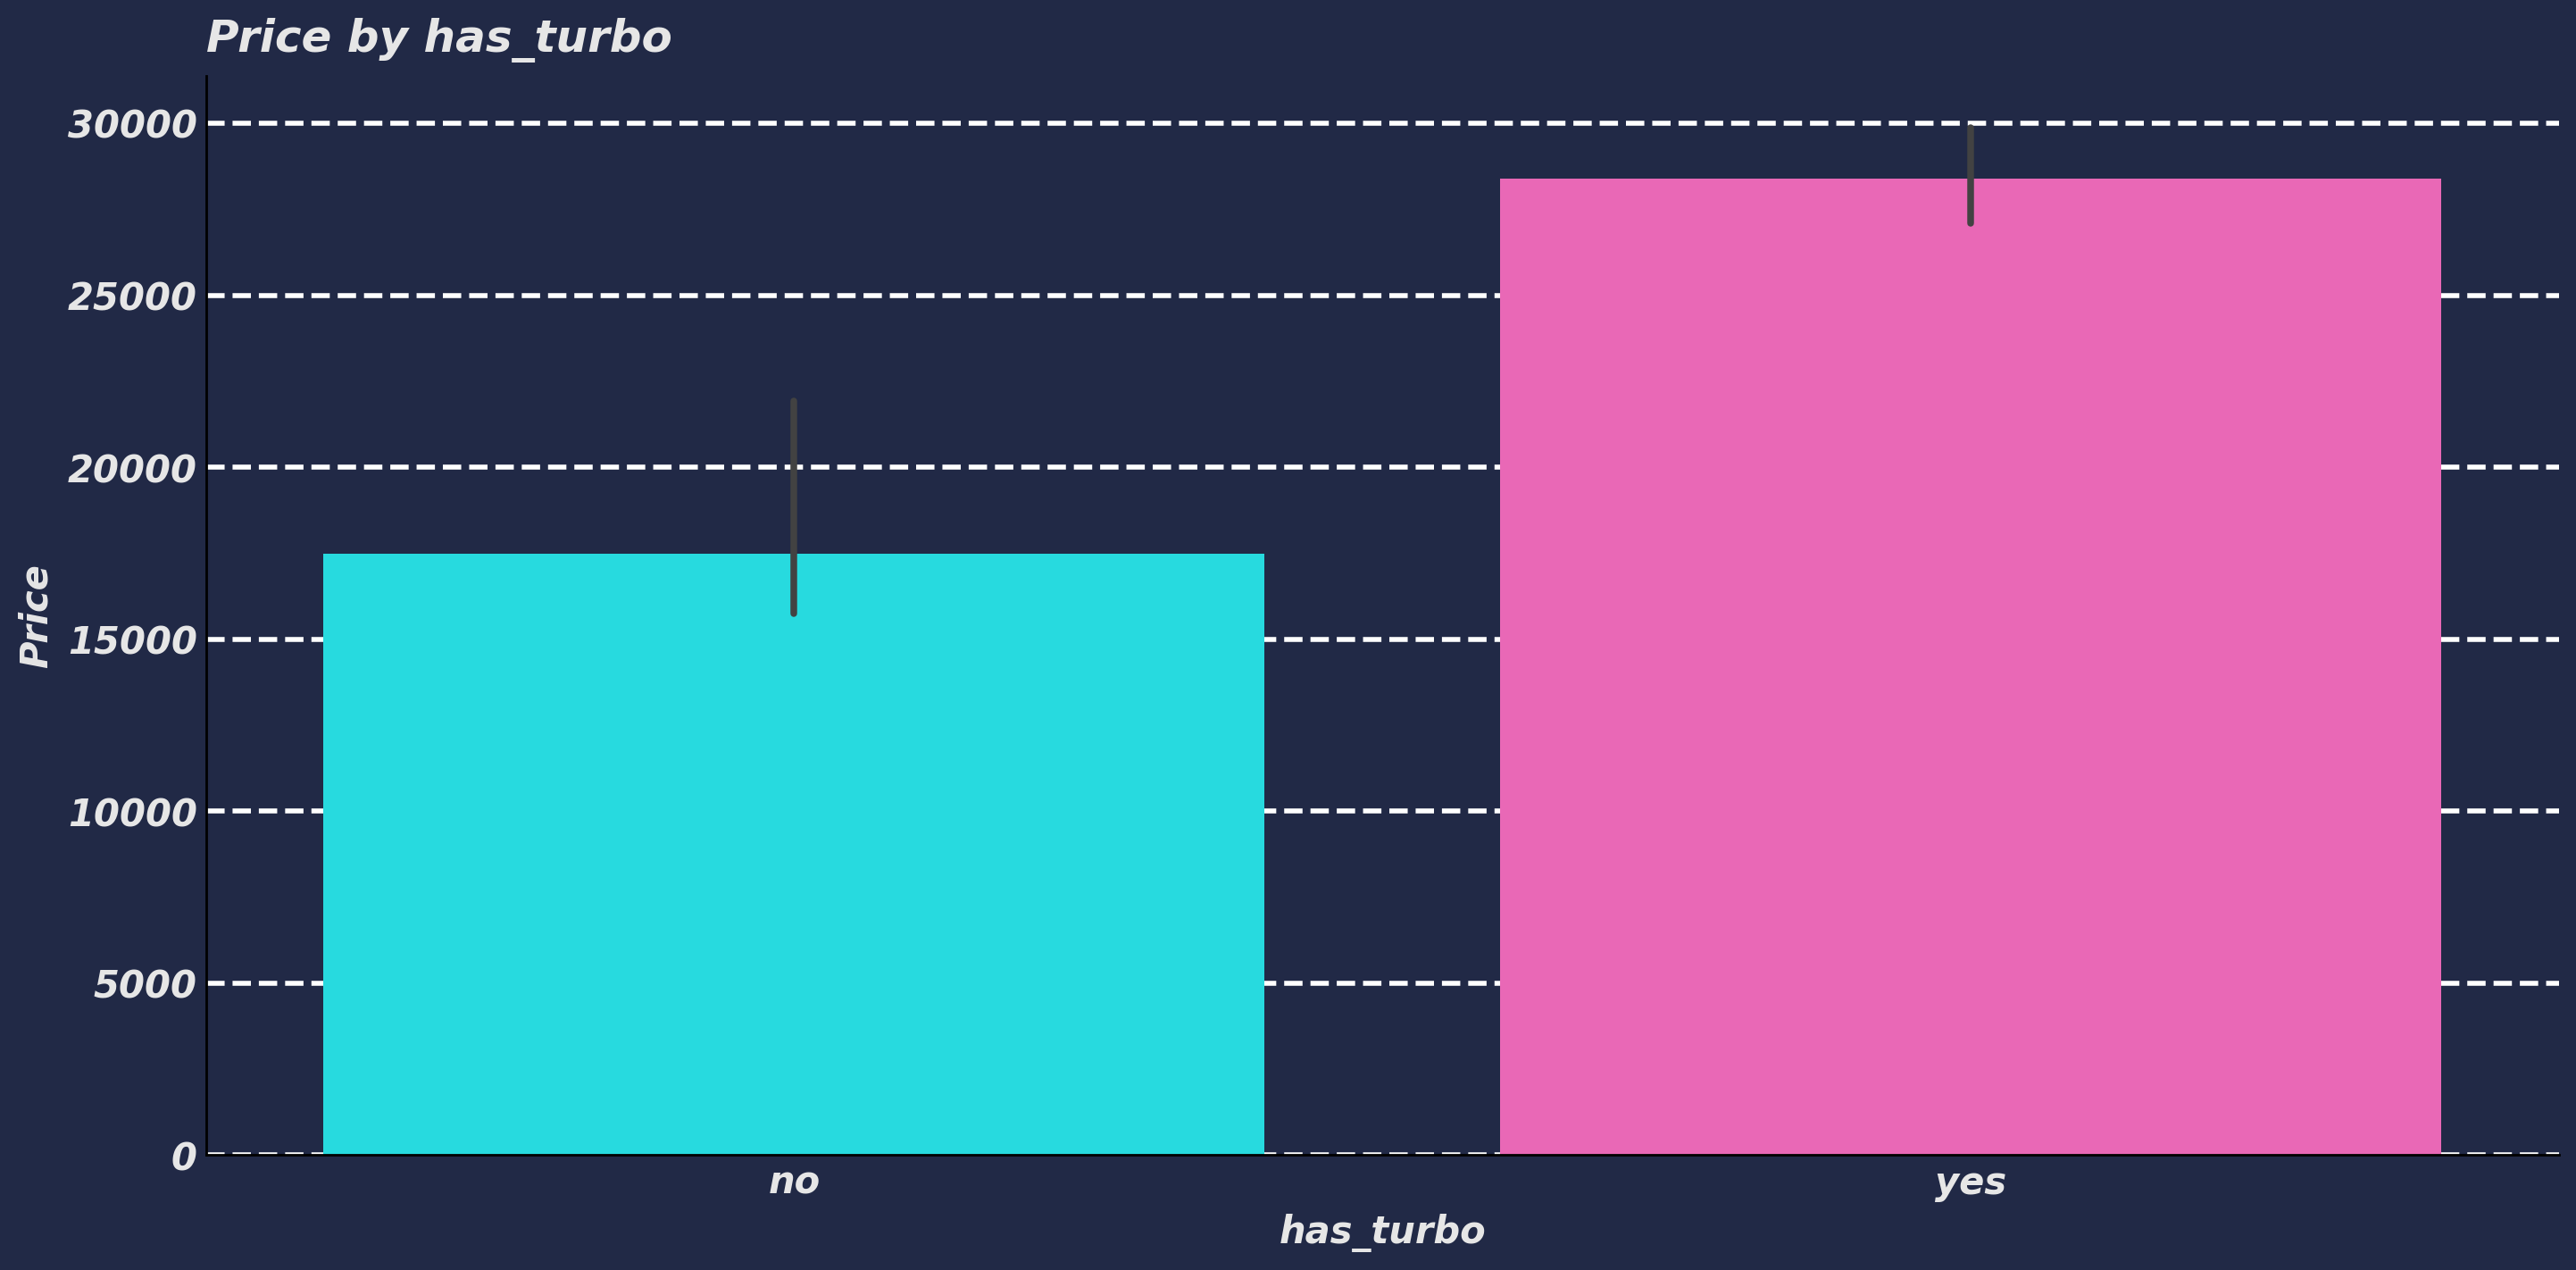

In [82]:
plt.figure(figsize=(17,8))

sns.barplot(x = turbo, y=train.Price)
plt.grid(axis="y", linewidth=2, linestyle = "--", color="white") 
plt.title("Price by has_turbo")
plt.xlabel("has_turbo") 

train.groupby(turbo)["Price"].mean().to_frame() 

In [12]:
for i in [train,test]:
    i["has_turbo"] = i["Engine volume"].apply(lambda x: "yes" if "Turbo" in str(x) else "no") 

In [81]:
# extra engine volume without turbo

et = train["Engine volume"].str.replace("Turbo", "").str.rstrip().astype("float32") 

In [94]:
et.sample(10) 

15777    2.0
13192    4.6
9898     1.8
16468    1.6
2706     2.0
4673     1.4
4874     2.7
14425    1.8
1946     1.6
14906    2.4
Name: Engine volume, dtype: float32

Text(0.0, 1.0, 'Engine Volume')

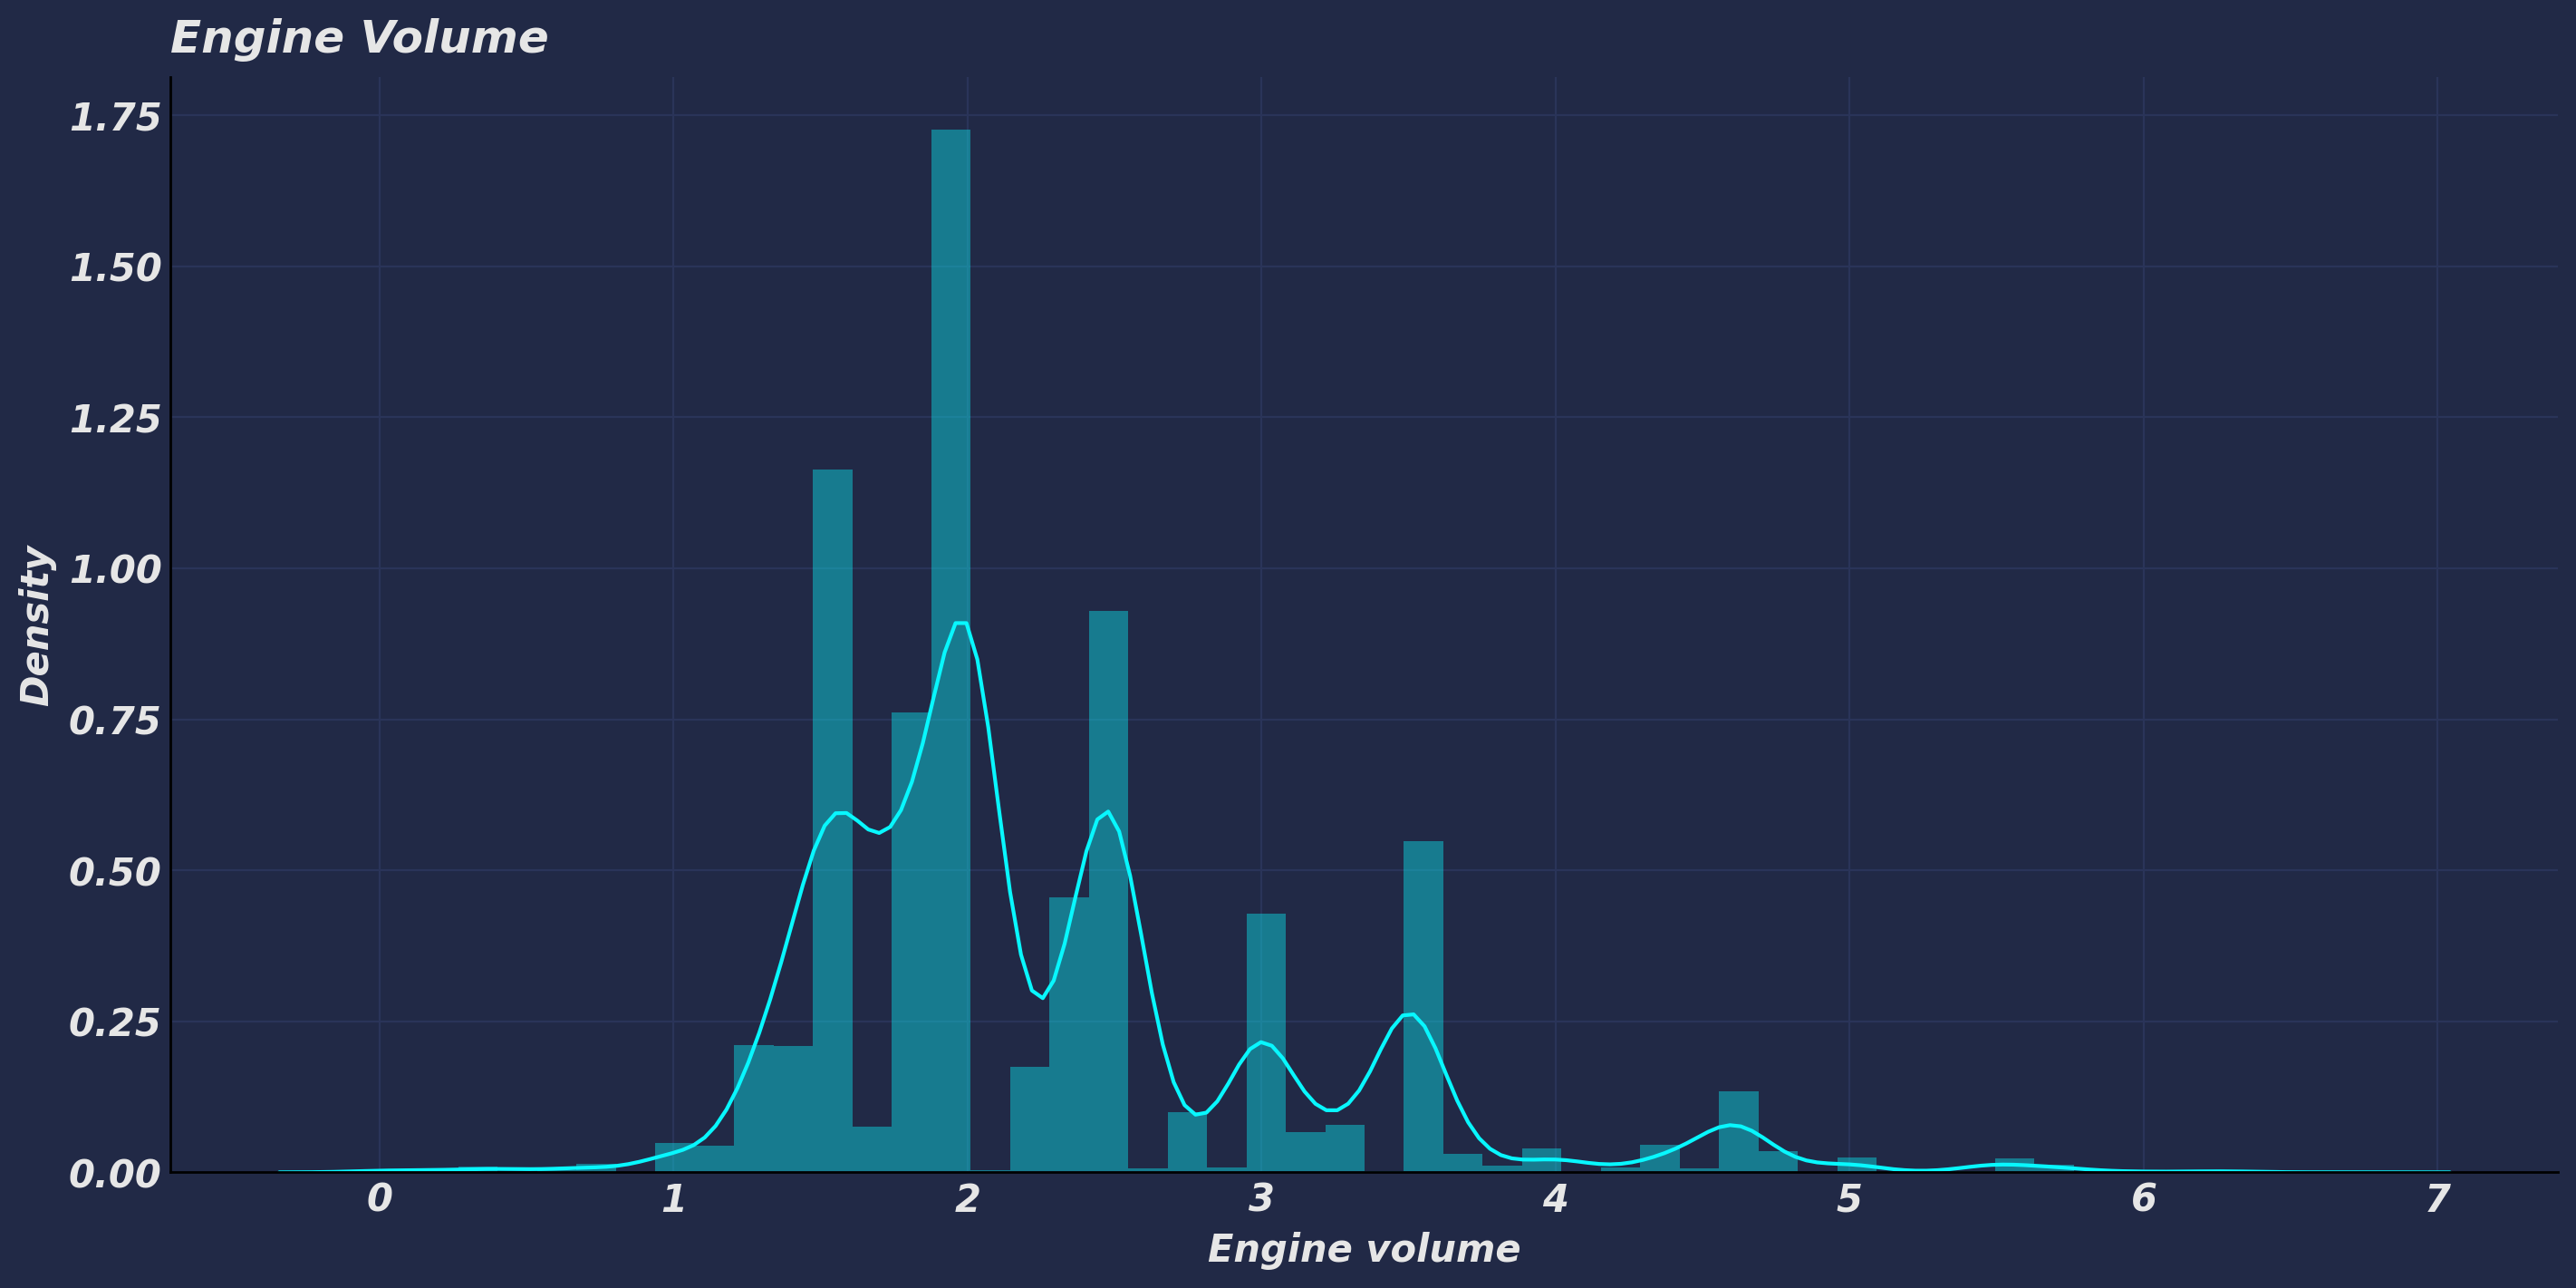

In [111]:
plt.figure(figsize=(17,8))

sns.distplot(et)
plt.title("Engine Volume") 

In [96]:
et.describe()

count    18974.000000
mean         2.277643
std          0.814990
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max          6.700000
Name: Engine volume, dtype: float64

Text(0.0, 1.0, 'Correlation engine_volume & Price')

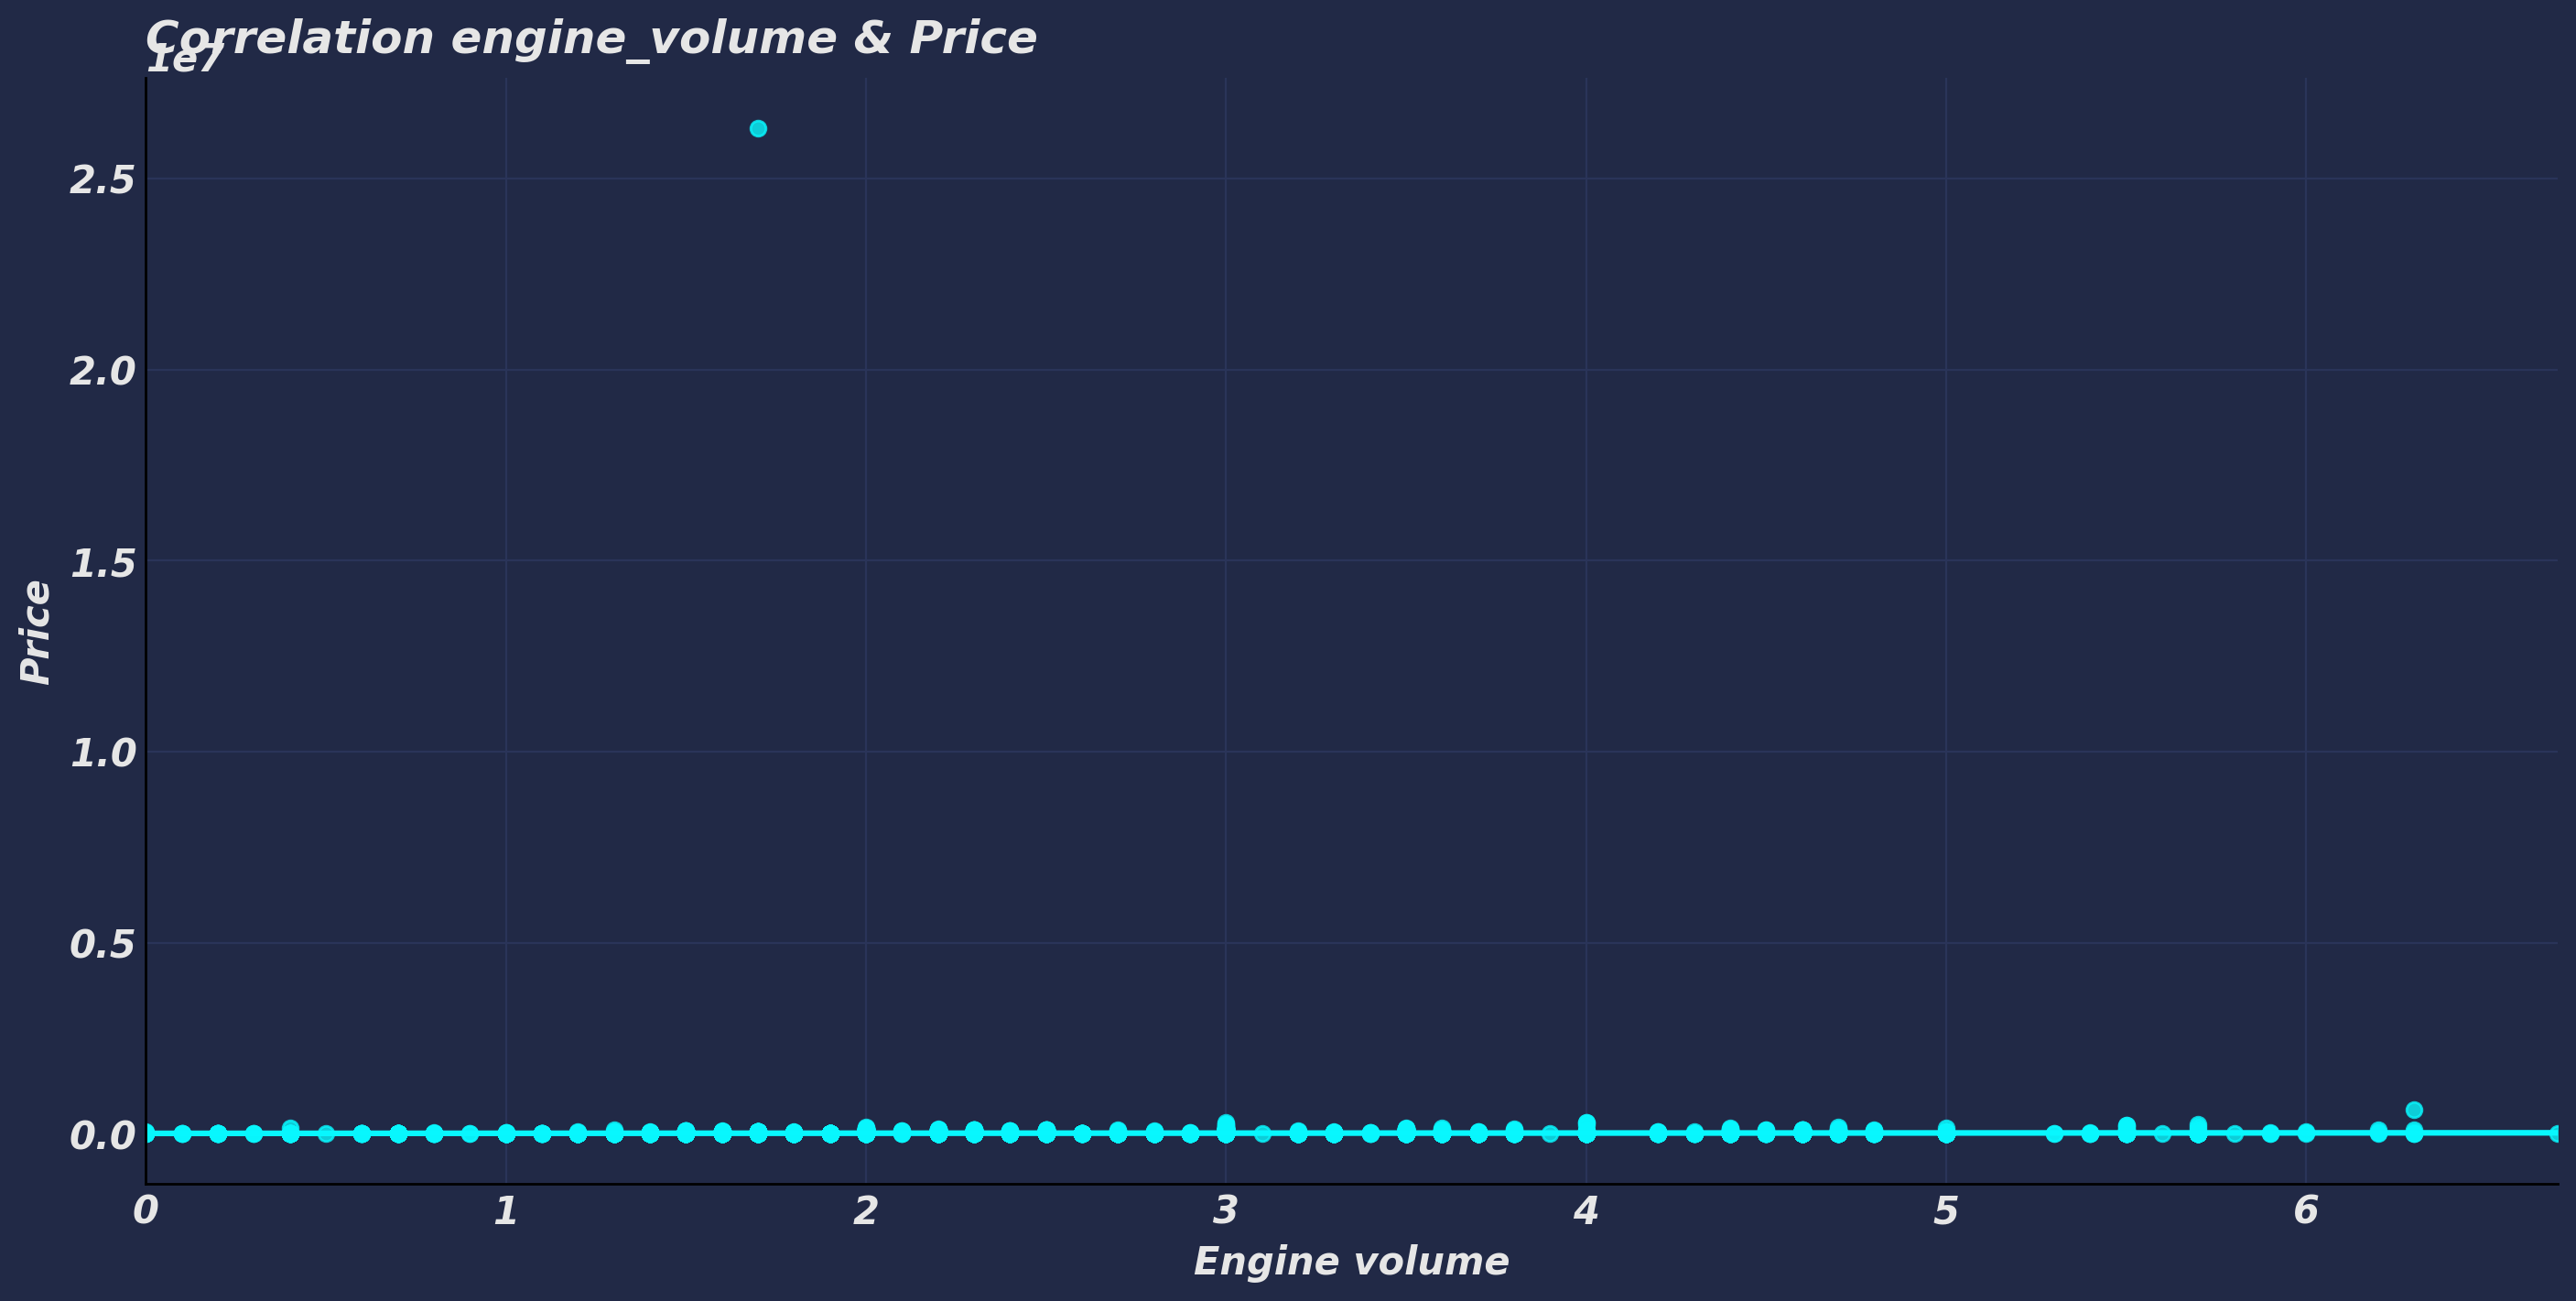

In [97]:
plt.figure(figsize=(17,8))

sns.regplot(x=et, y=train.Price)
plt.title("Correlation engine_volume & Price") 

In [13]:
for i in [train,test]:
    i["Engine volume"] = i["Engine volume"].str.replace("Turbo", "").str.rstrip().astype("float32") 

In [105]:
# Millage
train.Mileage.value_counts()

0 km         697
200000 km    183
150000 km    157
160000 km    120
100000 km    118
            ... 
251120 km      1
65124 km       1
48764 km       1
49562 km       1
13362 km       1
Name: Mileage, Length: 7613, dtype: int64

In [109]:
mil = train.Mileage.str.replace("km","").astype("int32") 

In [110]:
mil.describe()

count    1.897400e+04
mean     1.551314e+06
std      4.873792e+07
min      0.000000e+00
25%      7.048425e+04
50%      1.260000e+05
75%      1.880780e+05
max      2.147484e+09
Name: Mileage, dtype: float64

Text(0.0, 1.0, 'Mileage')

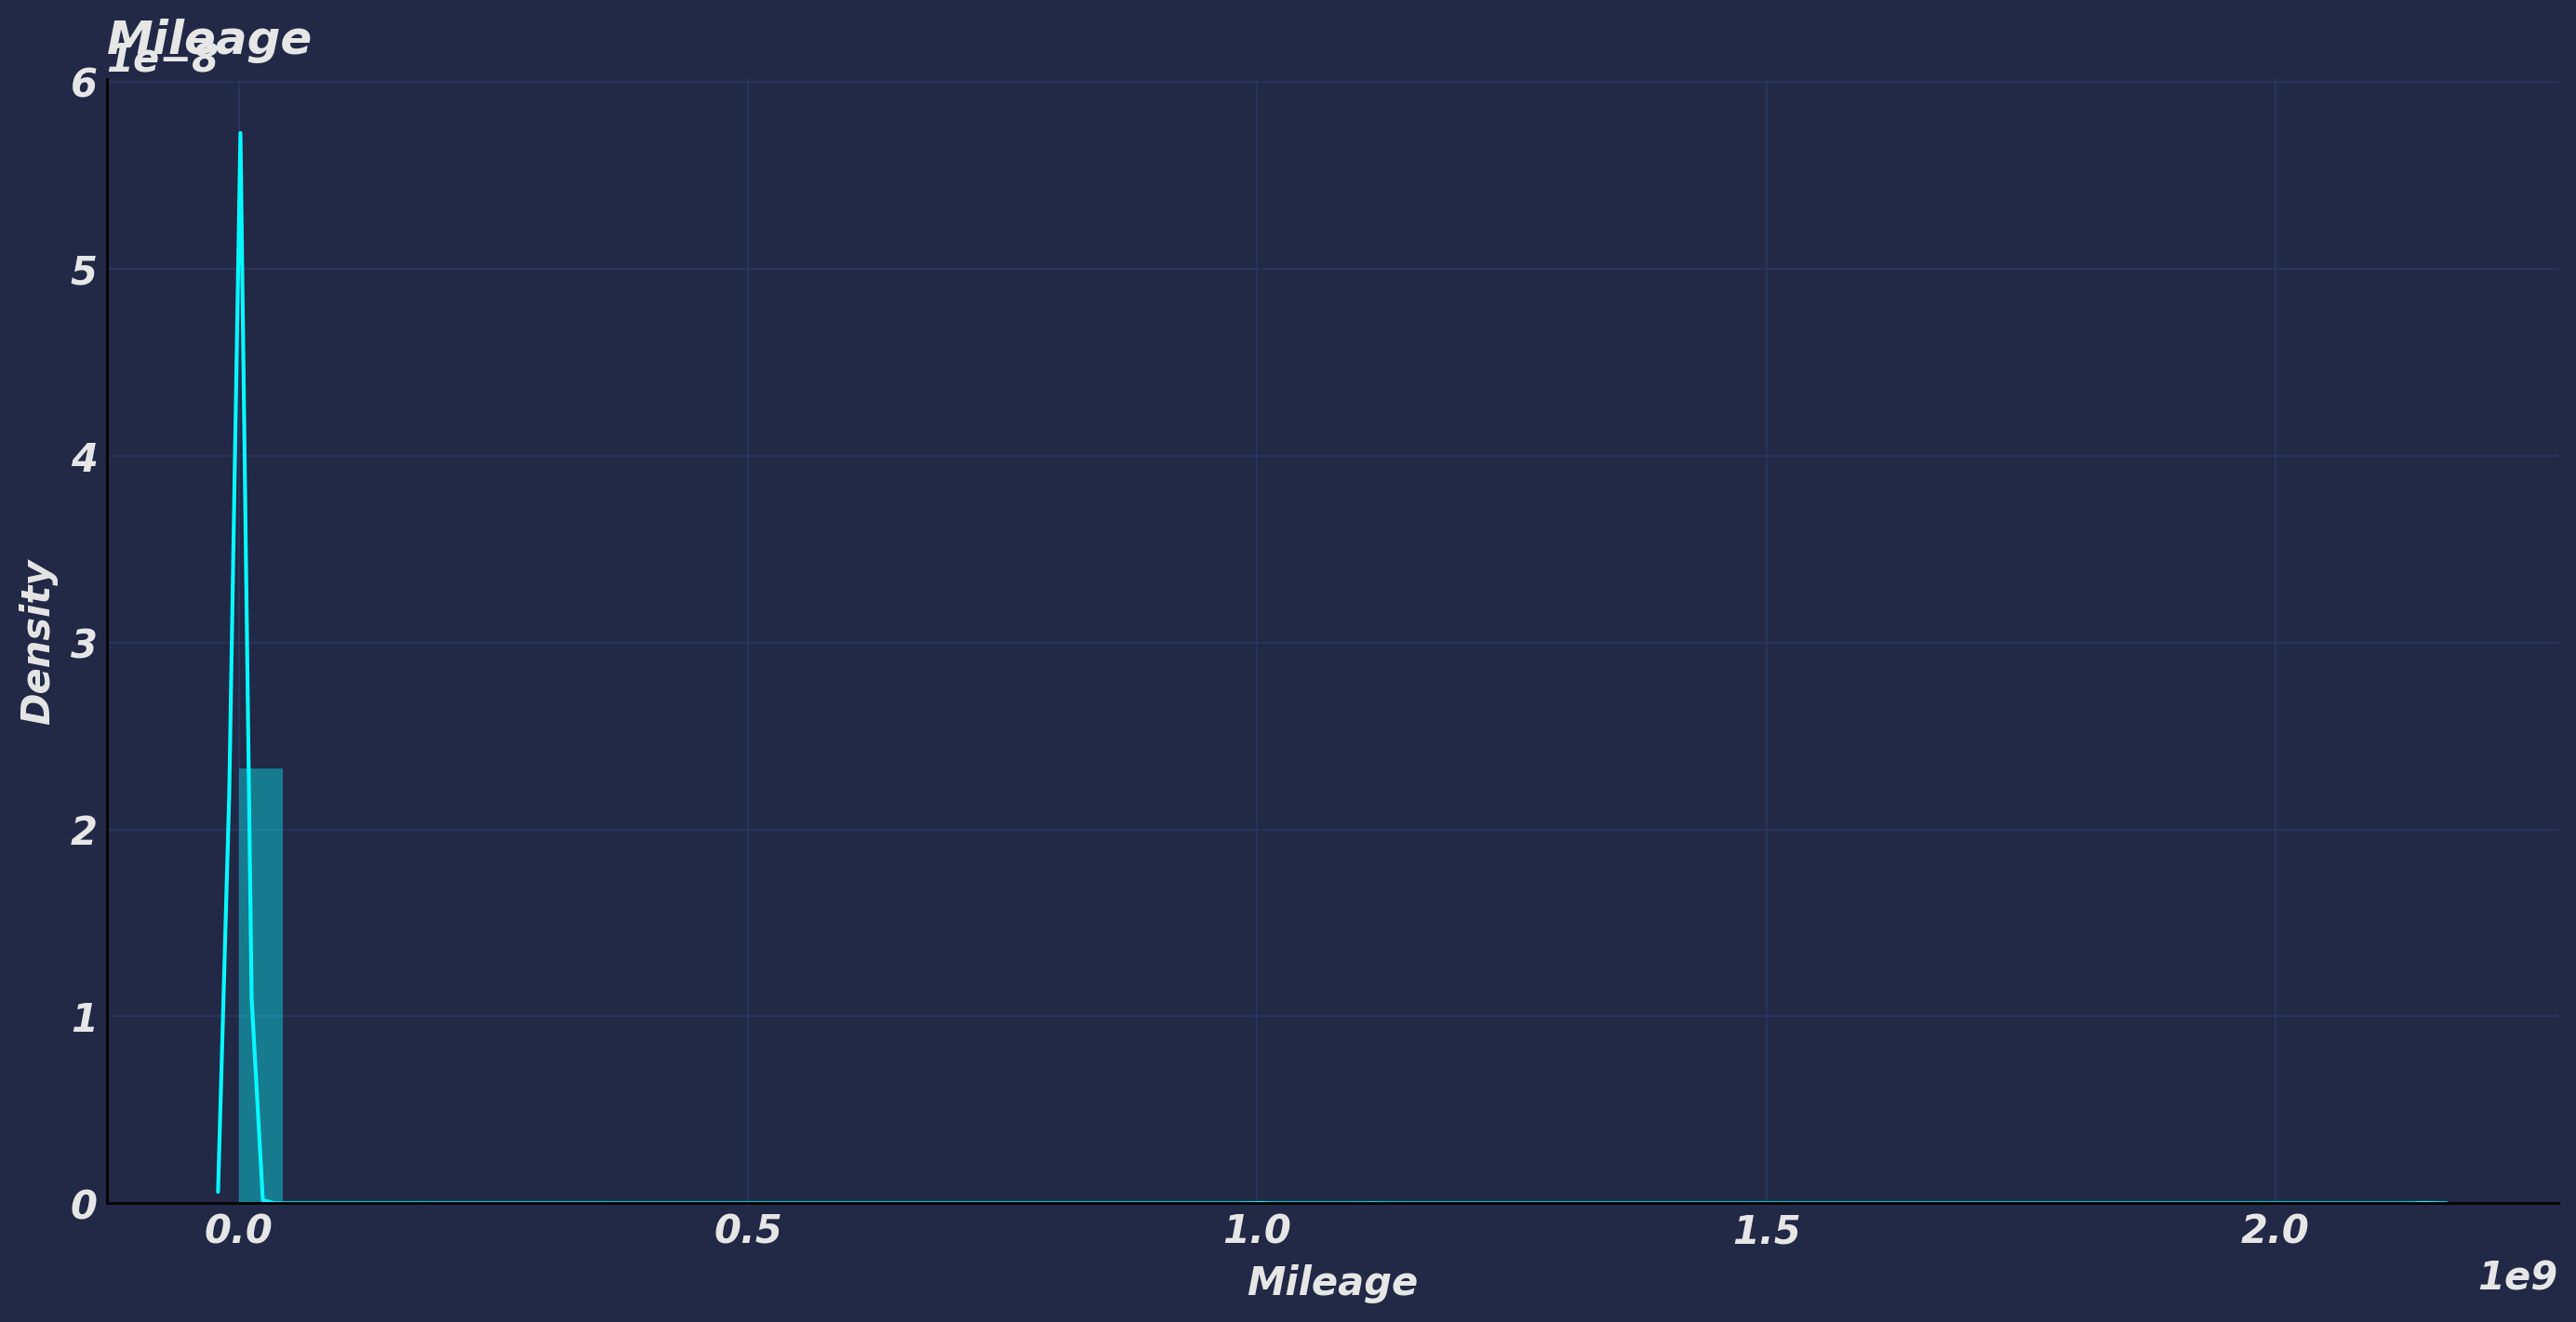

In [114]:
plt.figure(figsize=(17,8))

sns.distplot(mil)
plt.title("Mileage") 

Text(0.0, 1.0, 'Correlation Mileage & Price')

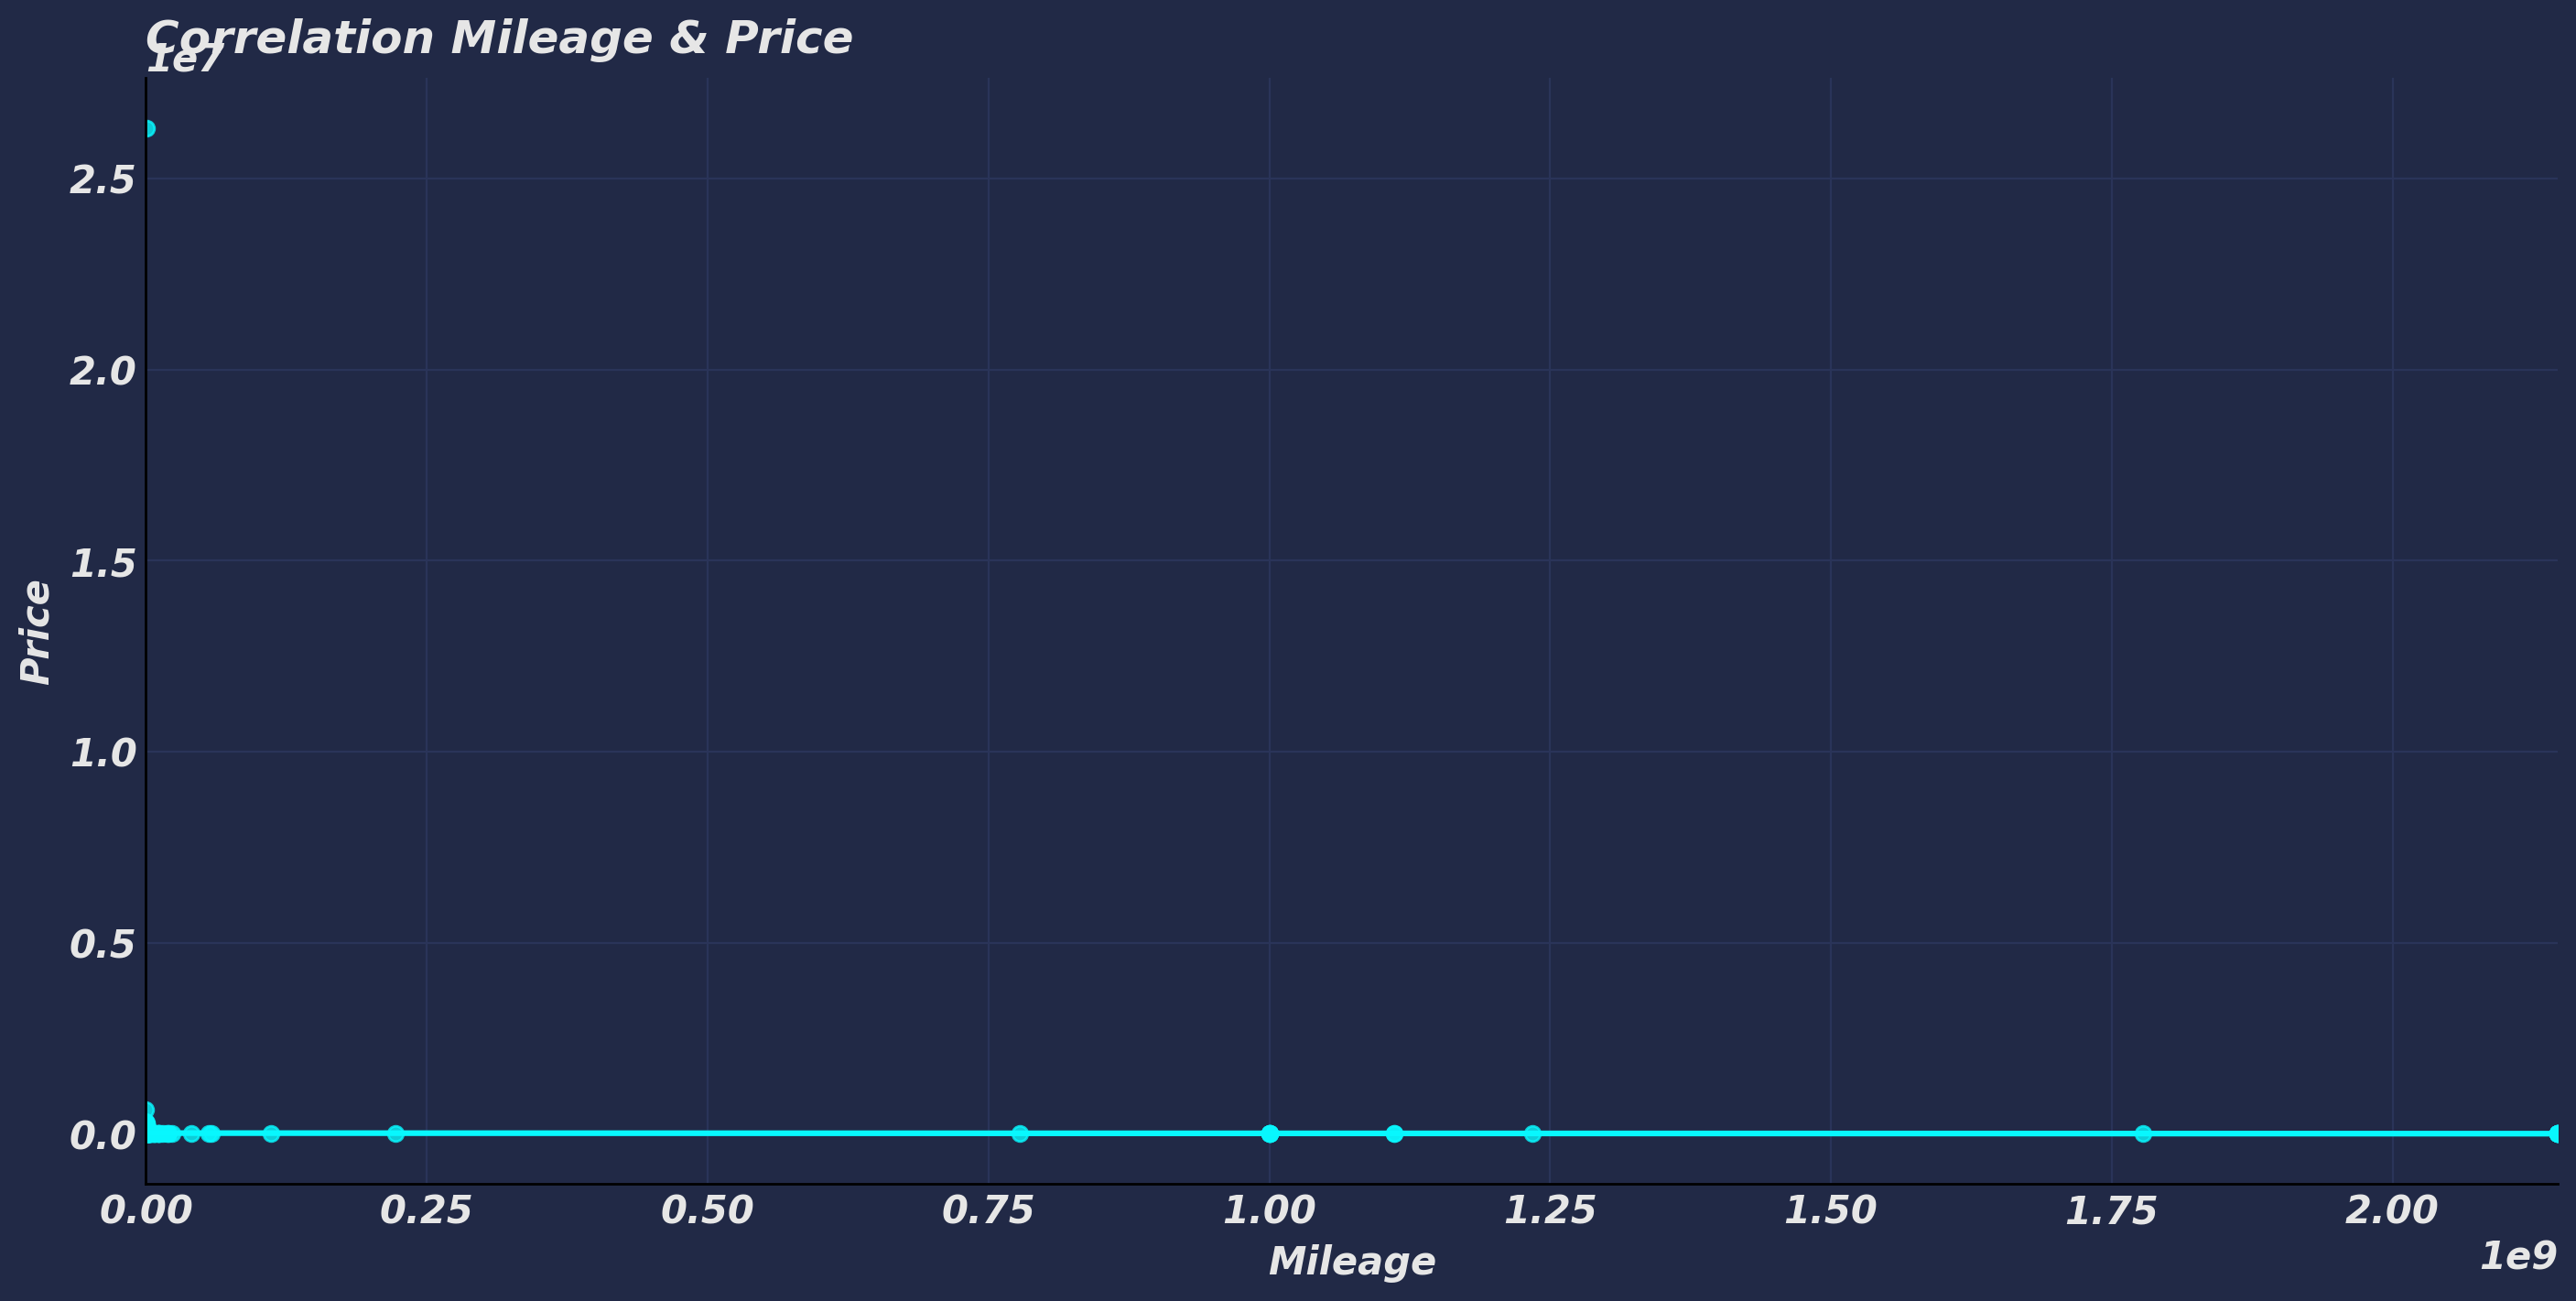

In [115]:
plt.figure(figsize=(17,8))

sns.regplot(x=mil, y=train.Price)
plt.title("Correlation Mileage & Price") 

In [14]:
for i in [train,test]:
    i["Mileage"] = i["Mileage"].str.replace("km", "").astype("int32") 

In [117]:
# Gear box type
train["Gear box type"].value_counts()

Automatic    13296
Tiptronic     3067
Manual        1865
Variator       746
Name: Gear box type, dtype: int64

Text(0.5, 0, 'Gear box type')

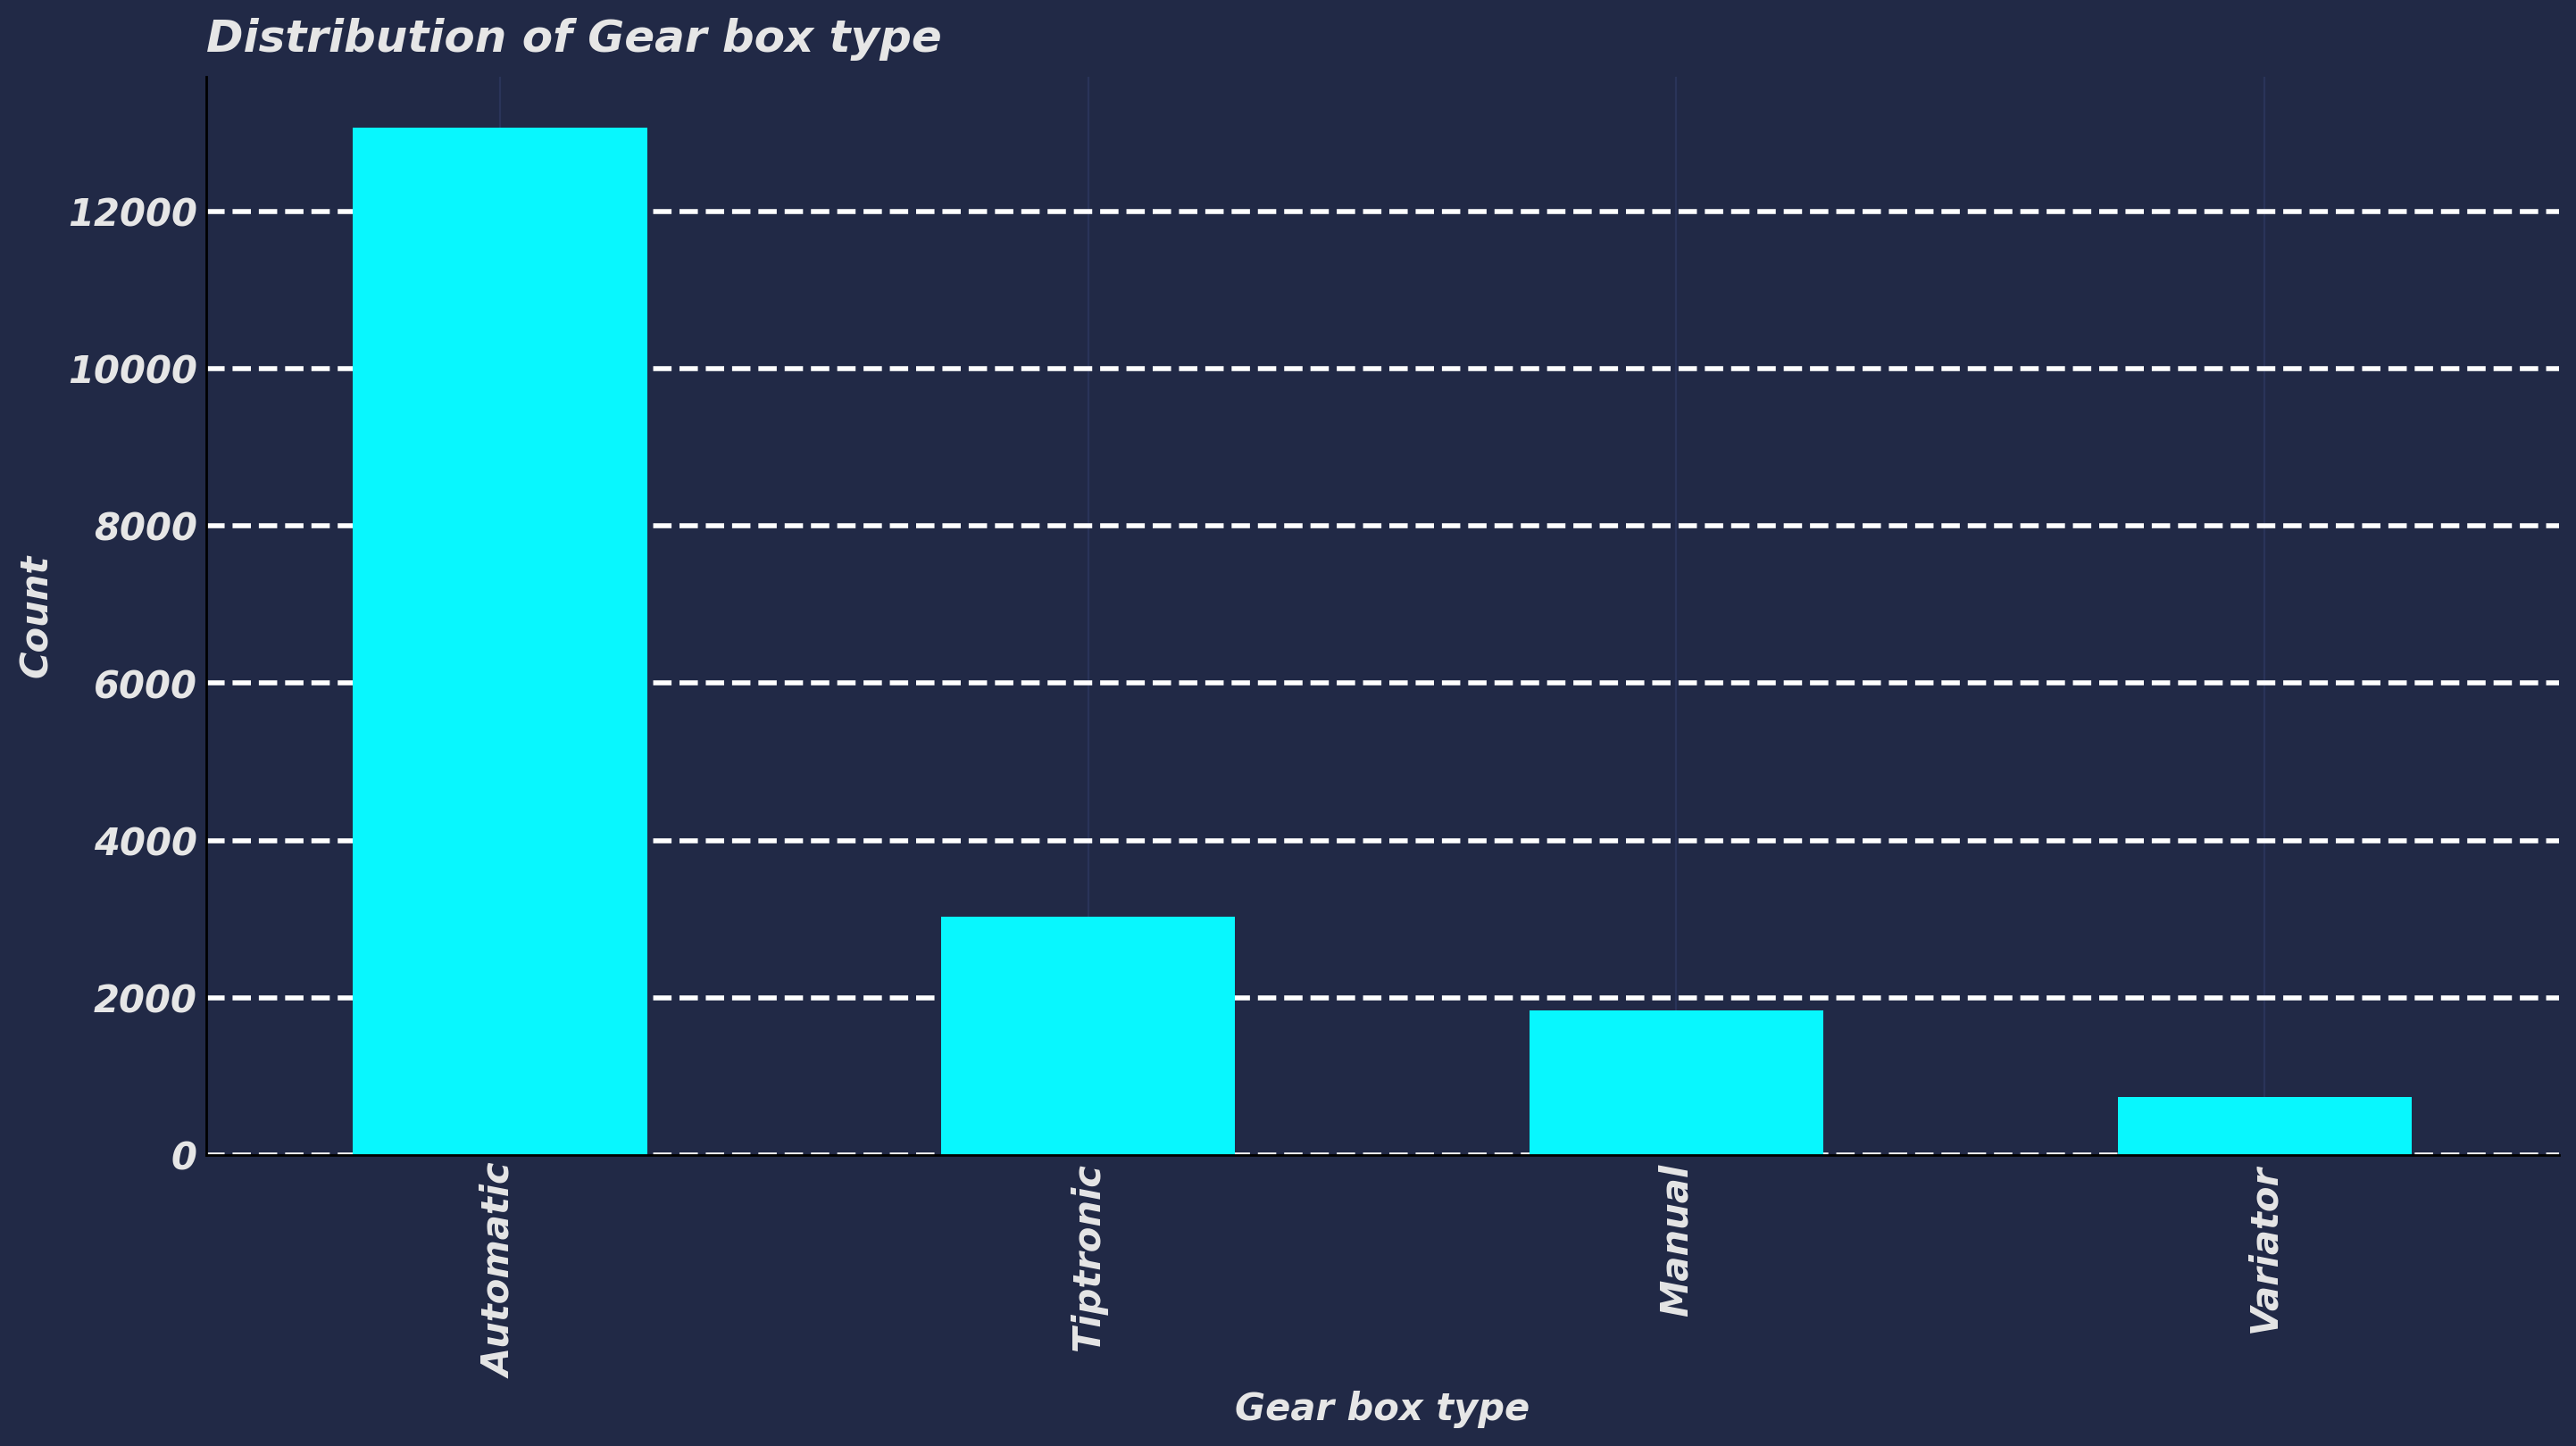

In [63]:
# distribution of categor
train["Gear box type"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of Gear box type") 
plt.ylabel("Count") 
plt.xlabel("Gear box type") 


In [119]:
train.groupby("Gear box type")["Price"].mean().to_frame() 

Price
Gear box type              
Automatic      16021.926294
Manual         25691.689008
Tiptronic      26147.386371
Variator       14762.399464

In [124]:
# Drive Wheels
train["Drive wheels"].value_counts() 

Front    12818
4x4       3922
Rear      2234
Name: Drive wheels, dtype: int64

Text(0.5, 0, 'Drive wheels')

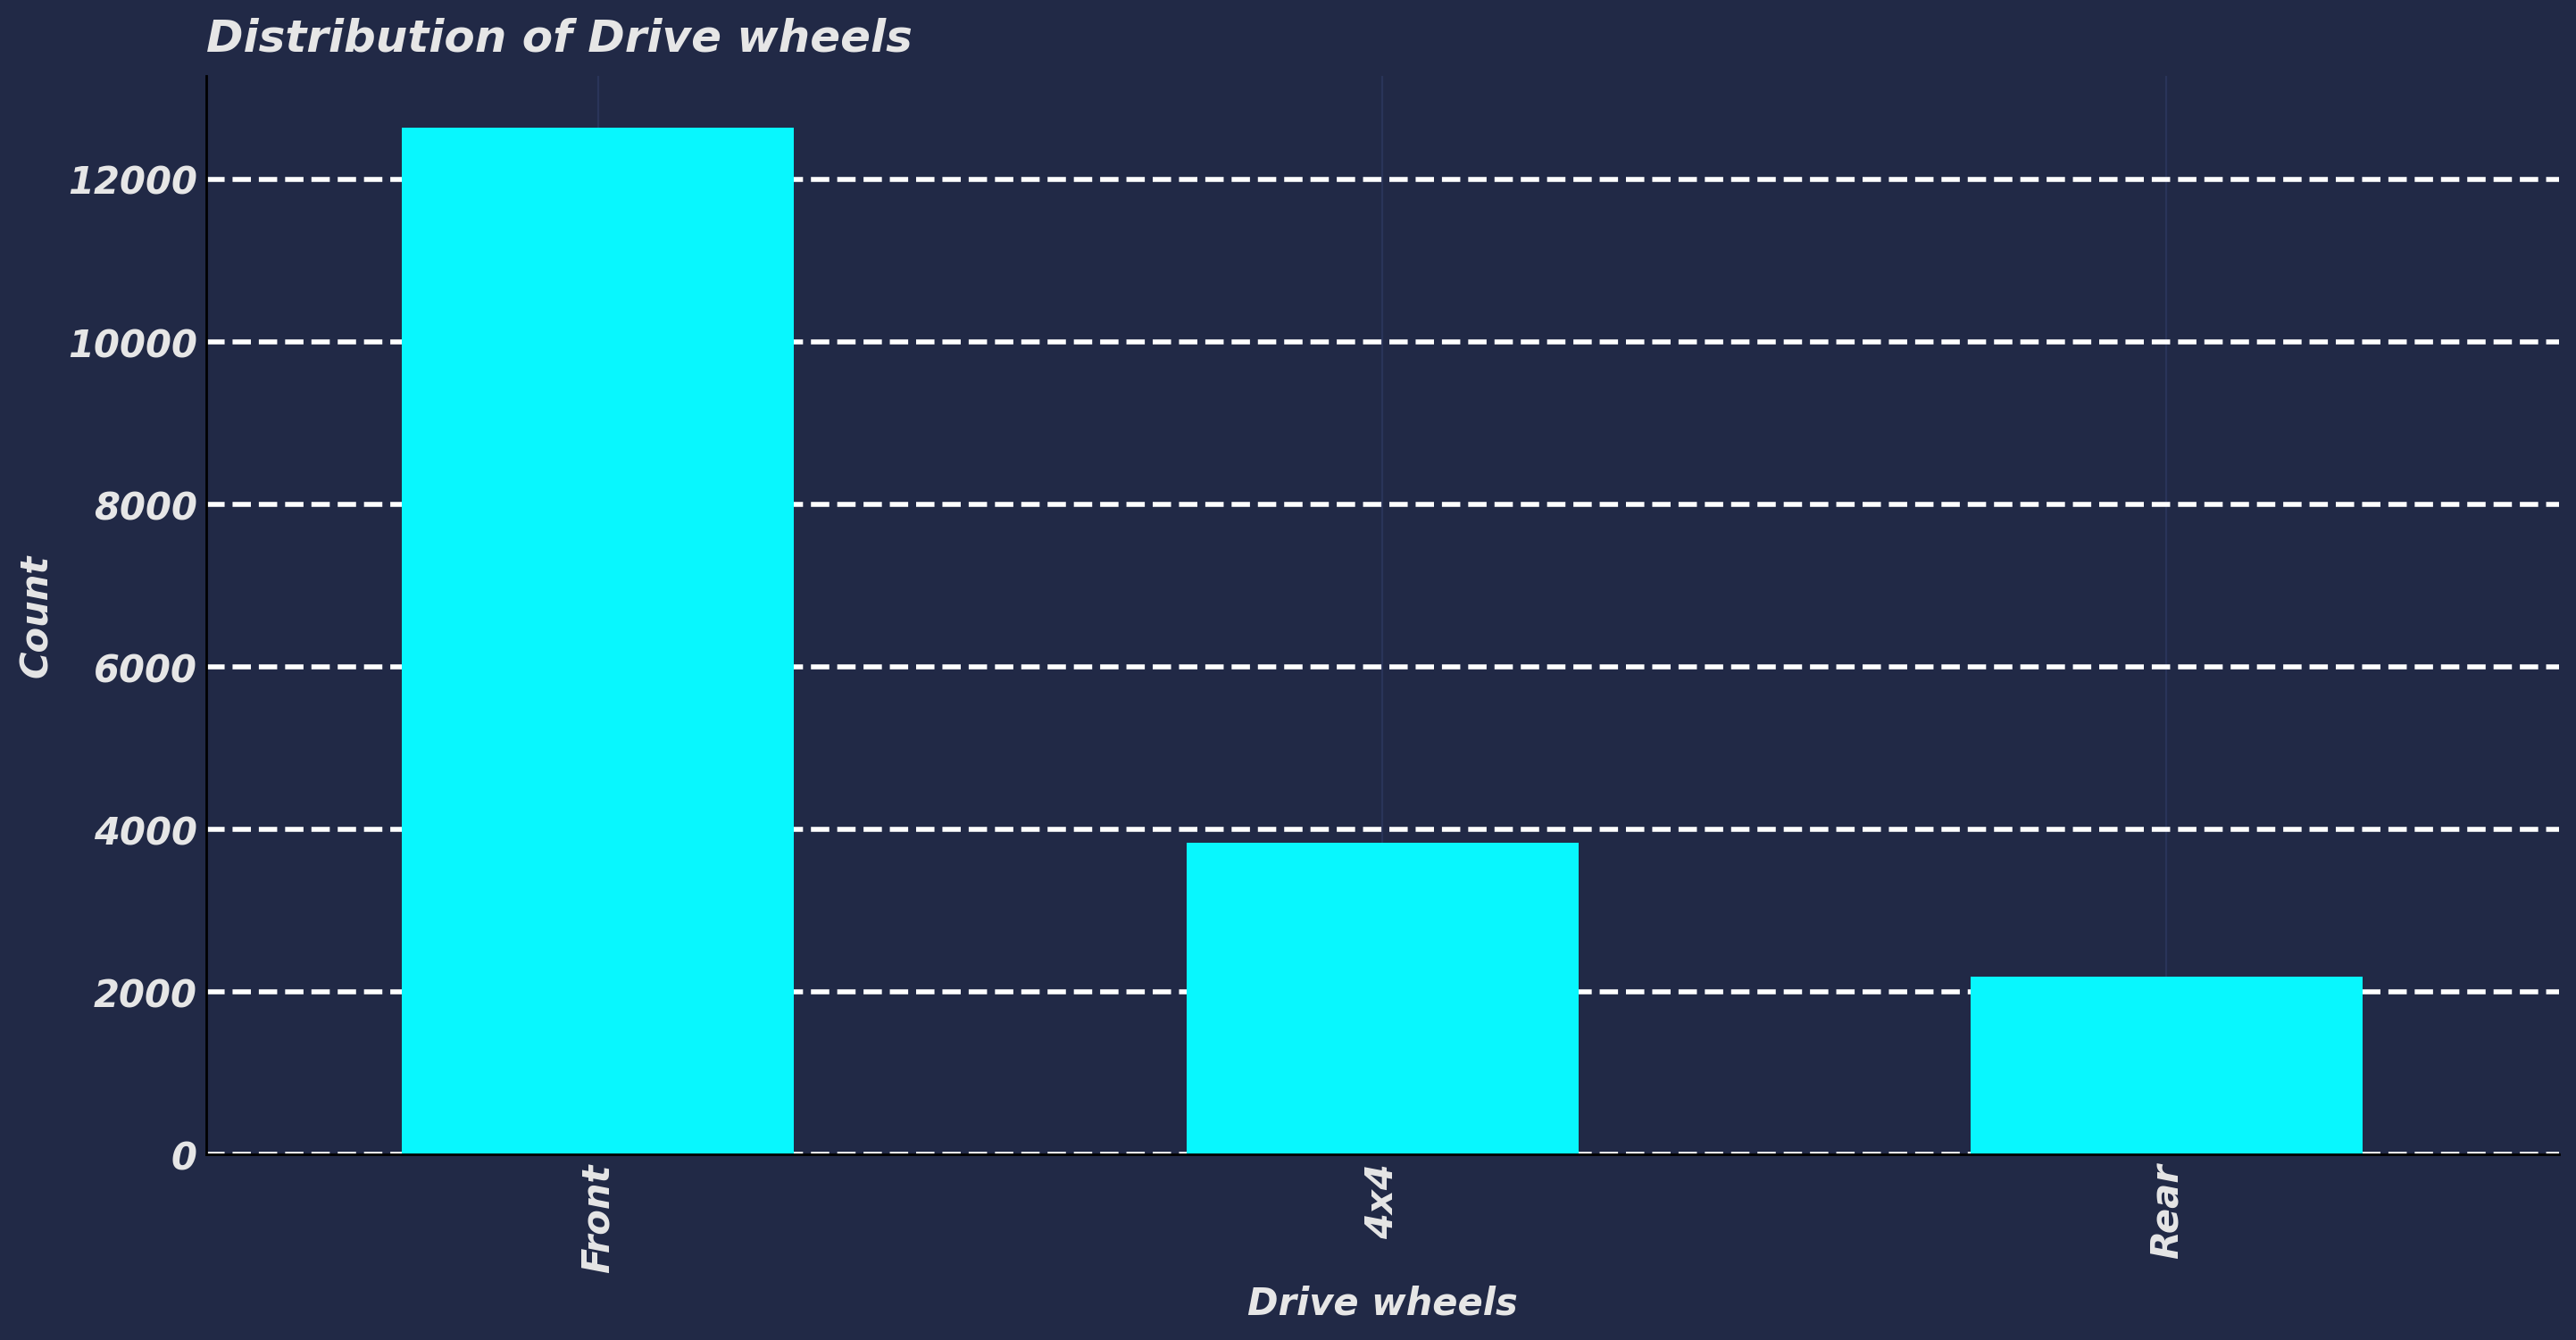

In [62]:
# distribution of categor
train["Drive wheels"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of Drive wheels") 
plt.ylabel("Count") 
plt.xlabel("Drive wheels") 


In [126]:
train.groupby("Drive wheels")["Price"].mean().to_frame() 

Price
Drive wheels              
4x4           19524.560173
Front         18501.311515
Rear          17199.722471

In [127]:
# Doors
train.Doors.value_counts() 

04-May    18085
02-Mar      763
>5          126
Name: Doors, dtype: int64

Text(0.5, 0, 'Doors')

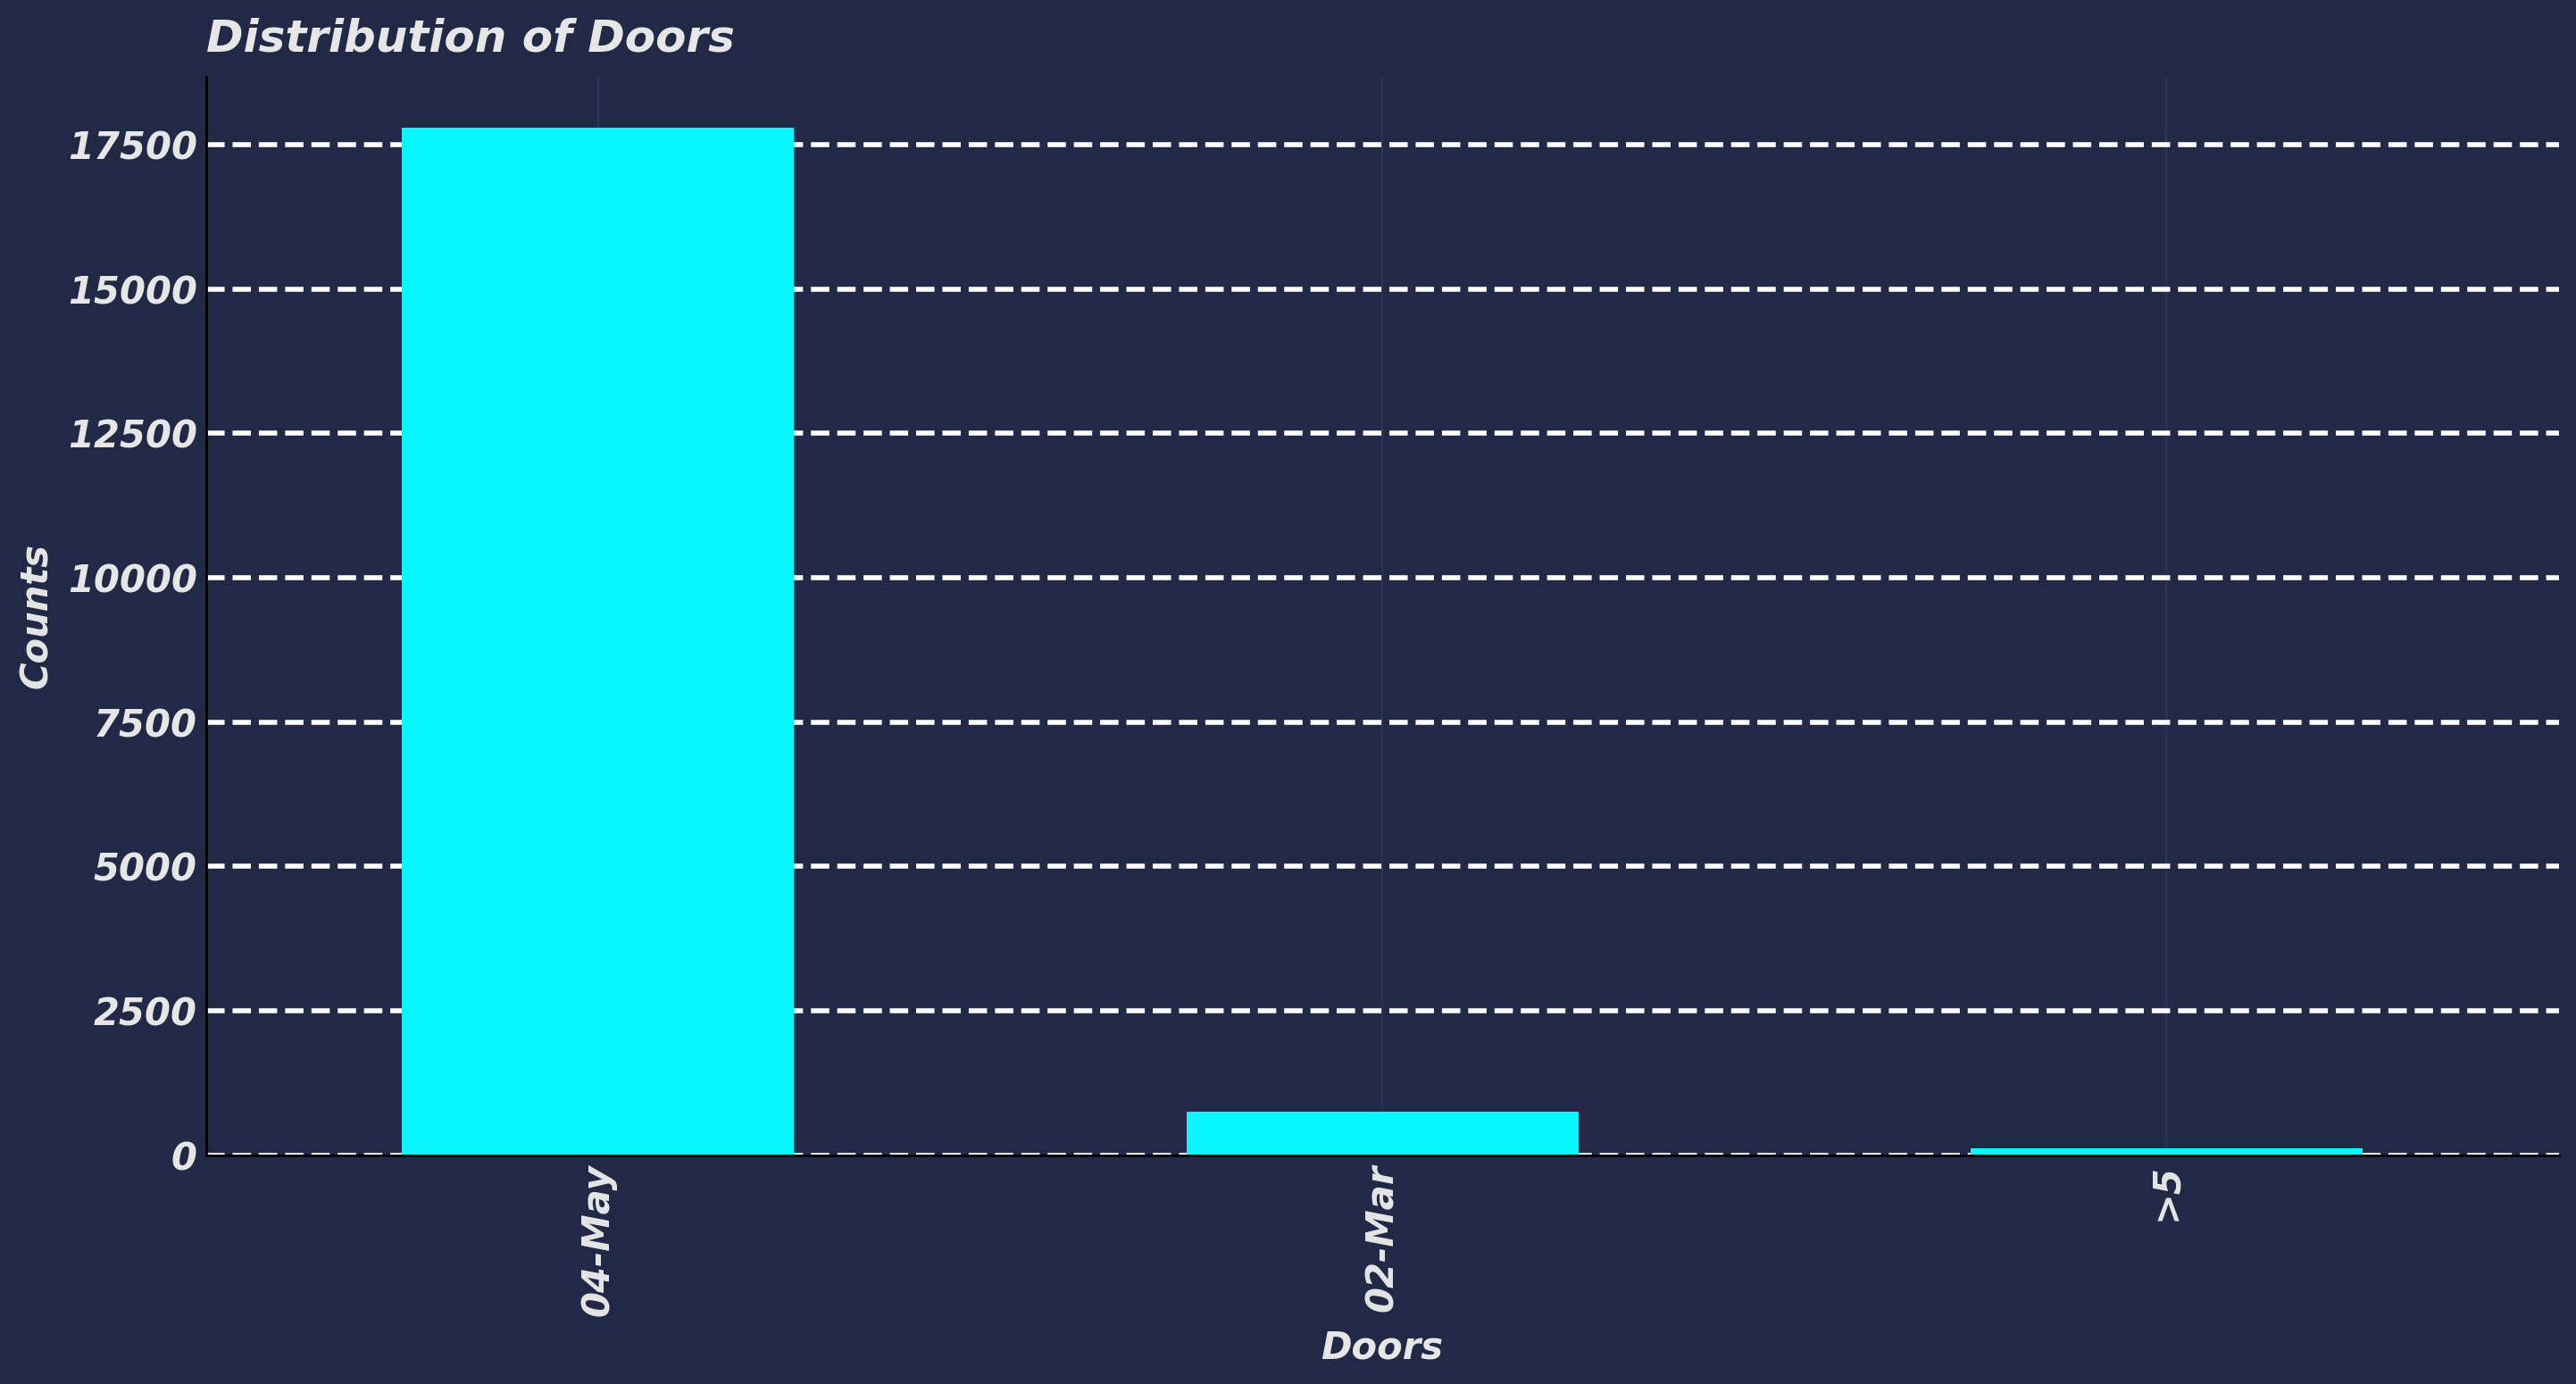

In [61]:
# distribution of category
train["Doors"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of Doors") 
plt.ylabel("Counts") 
plt.xlabel("Doors") 


In [130]:
train.groupby("Doors")["Price"].mean().to_frame() 

Price
Doors               
02-Mar  50974.043250
04-May  17165.367045
>5      22384.587302

In [131]:
# Wheel
train.Wheel.value_counts()

Left wheel          17534
Right-hand drive     1440
Name: Wheel, dtype: int64

Text(0.5, 0, 'Wheel')

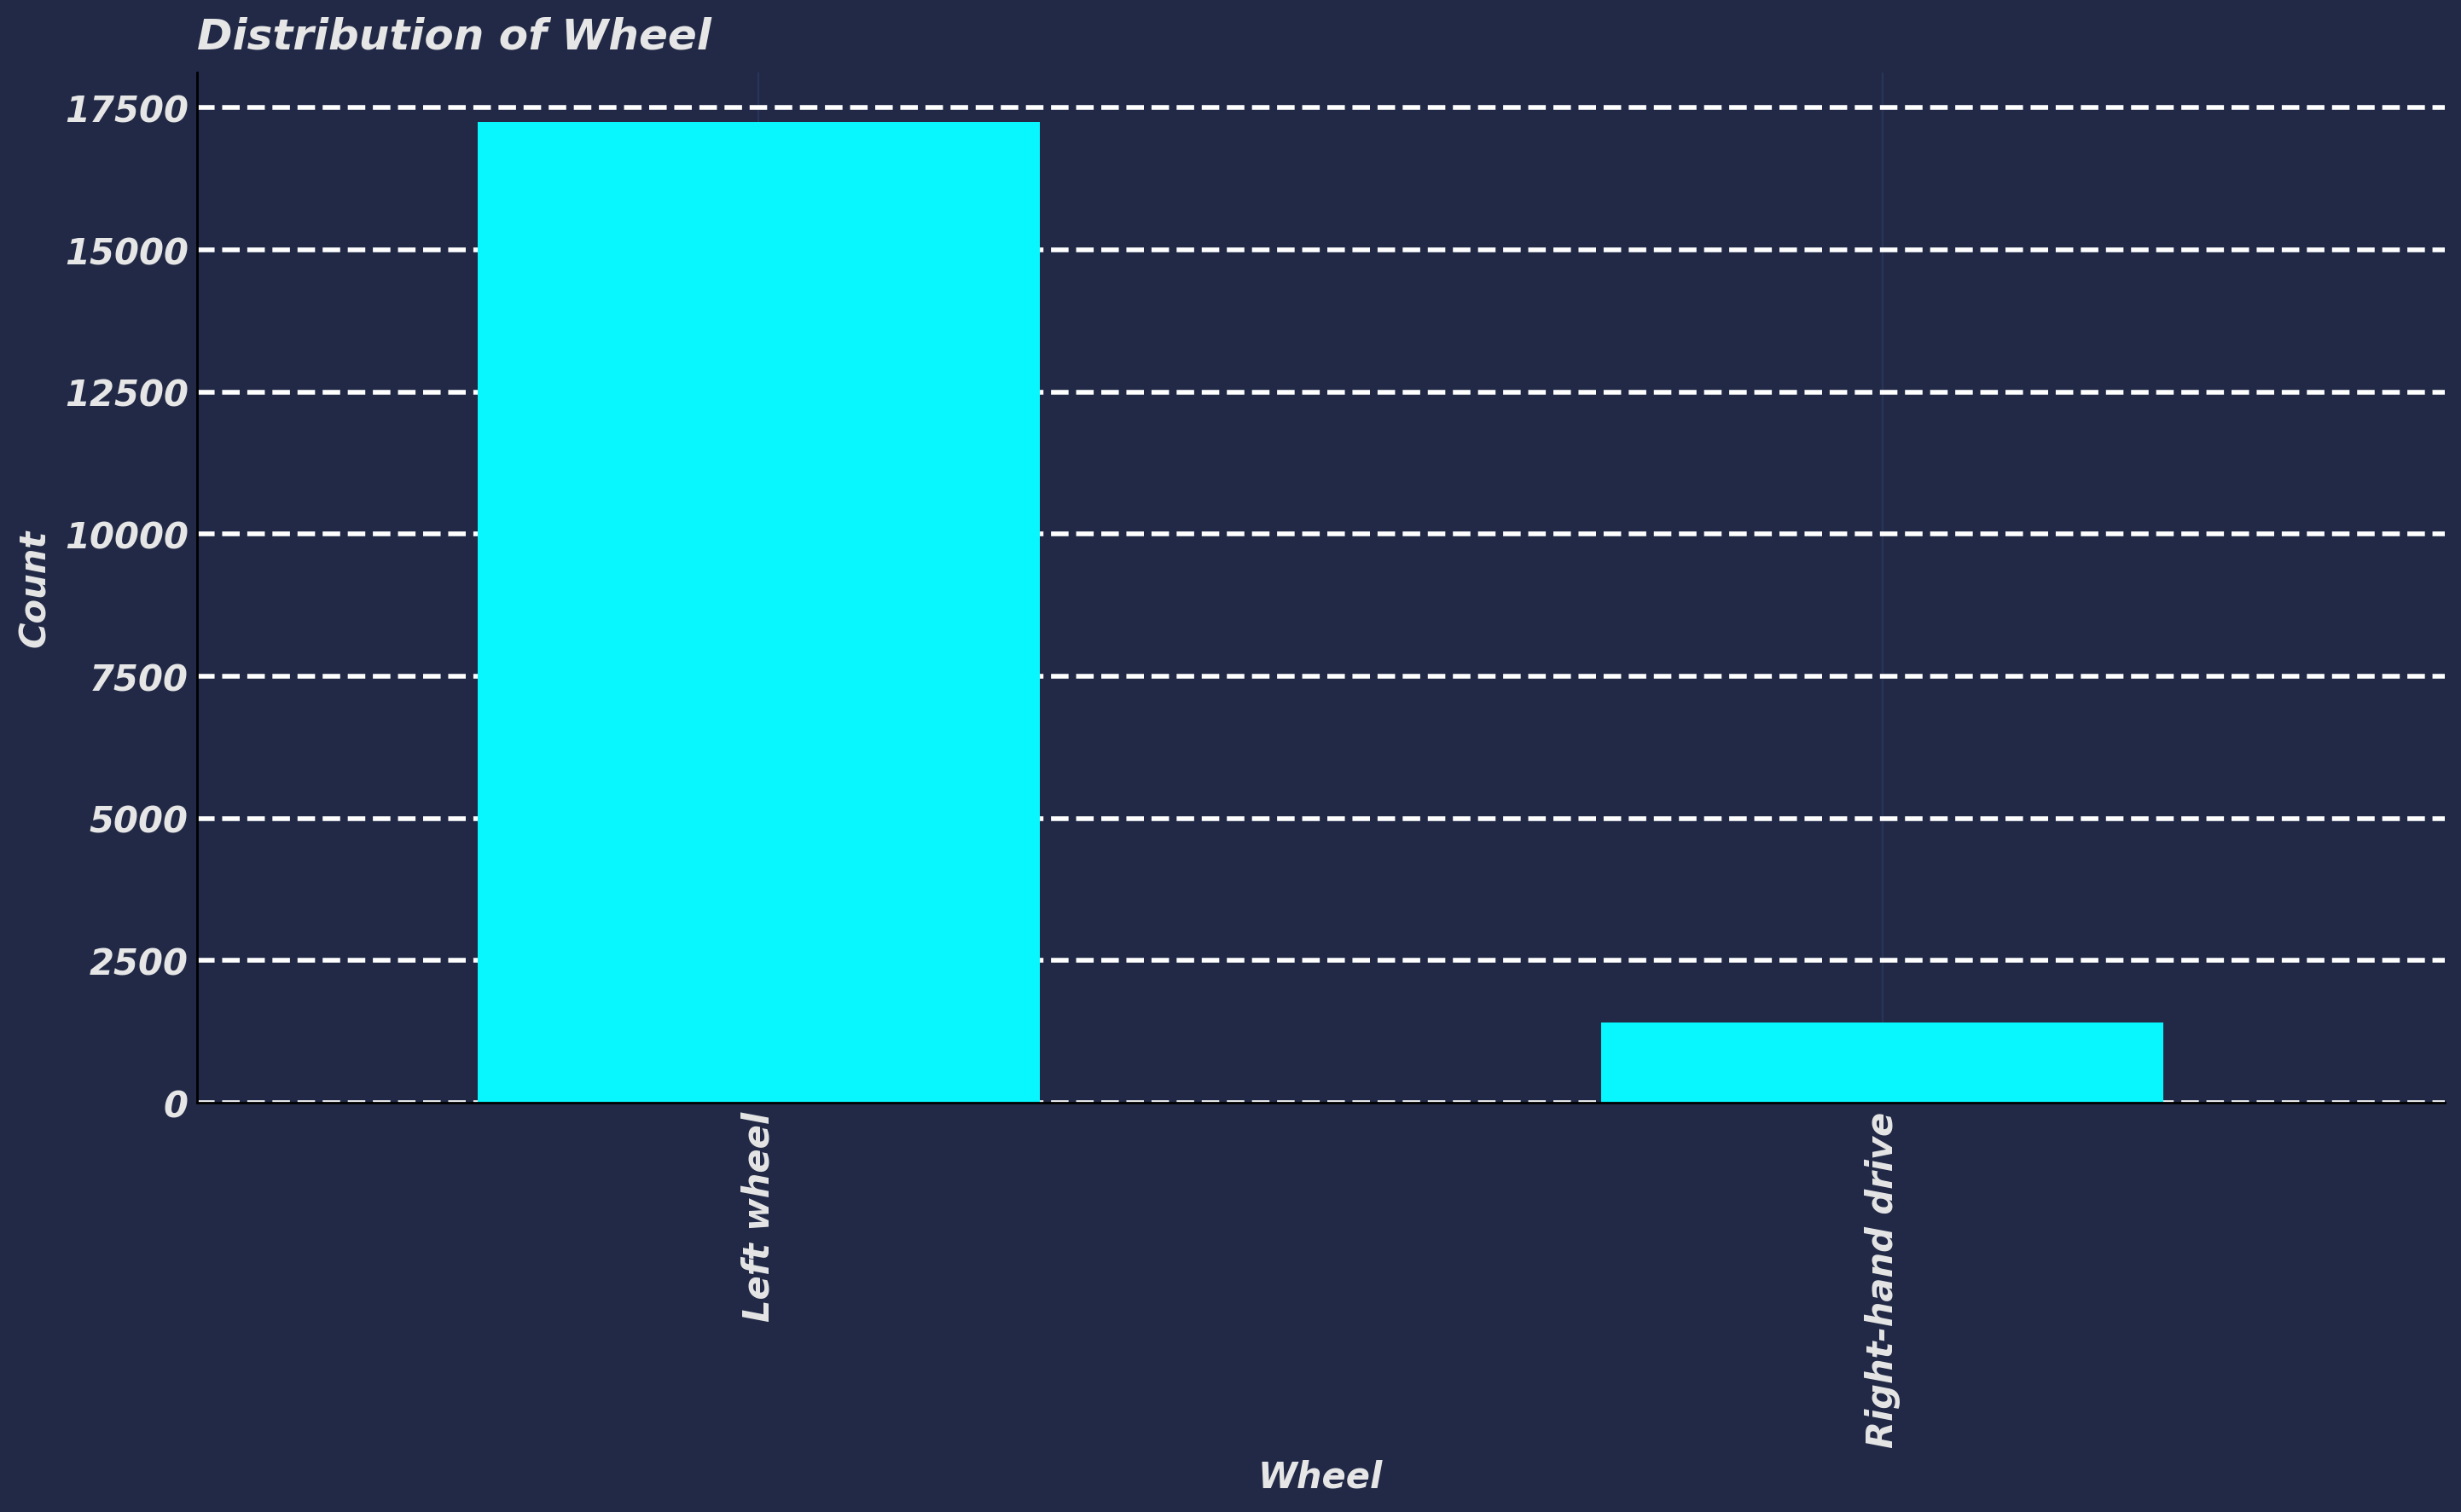

In [59]:
# distribution of category
train["Wheel"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of Wheel") 
plt.ylabel("Count") 
plt.xlabel("Wheel") 


In [133]:
train.groupby("Wheel")["Price"].mean().to_frame() 

Price
Wheel                         
Left wheel        19365.100947
Right-hand drive   8751.136111

In [134]:
#color 
train.Color.value_counts()

Black            4947
White            4384
Silver           3761
Grey             2359
Blue             1388
Red               631
Green             320
Orange            252
Brown             187
Carnelian red     177
Golden            142
Beige             133
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

In [58]:
# distribution of category
train["Color"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=2,linestyle="--", color="white") 
plt.title("Distribution of Color") 
plt.xlabel("Color") 
plt.ylabel("Counts") 


Text(0, 0.5, 'Counts')

In [136]:
train.groupby("Color")["Price"].mean().to_frame() 

Price
Color                      
Beige          15744.812030
Black          18627.449363
Blue           33875.765850
Brown          19709.636364
Carnelian red  15872.124294
Golden         14699.338028
Green           9458.753125
Grey           19241.435354
Orange         13021.464286
Pink           10649.076923
Purple          8837.384615
Red            13456.077655
Silver         15091.759373
Sky blue       14079.000000
White          18436.096943
Yellow         20666.584906

# numerical features

In [138]:
number.head() 

ID  Prod. year  Cylinders  Airbags
0  45654403        2010        6.0       12
1  44731507        2011        6.0        8
2  45774419        2006        4.0        2
3  45769185        2011        4.0        0
4  45809263        2014        4.0        4

In [139]:
# ID
train.ID.nunique()

18664

In [33]:
train.ID.sample(5)

12425    45811019
5527     45782086
8828     45647561
6435     45774312
9220     45732956
Name: ID, dtype: int64

In [34]:
# extract angka terakhir 
id = train.ID.apply(lambda x: str(x)[-1])

In [39]:
id.value_counts()

1    1904
4    1880
9    1874
3    1872
8    1868
5    1866
0    1855
7    1854
2    1848
6    1843
Name: ID, dtype: int64

In [37]:
train.groupby(id)["Price"].mean().to_frame()

Price
ID              
0   17080.256065
1   17200.113971
2   17161.122294
3   17085.903846
4   17117.131915
5   17106.017685
6   31458.701031
7   17637.775620
8   17592.747323
9   16630.338314

In [38]:
plt.figure(figsize=(17,8))

sns.barplot(x=id, y=train.Price) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white") 
plt.title("Price by Id")

Text(0.0, 1.0, 'Price by Id')

In [15]:
for i in [train,test]:
    i["ID"] = i.ID.apply(lambda x: str(x)[-1])

In [143]:
# prode year
train["Prod. year"].value_counts()

2012    2153
2014    2122
2013    1962
2011    1610
2015    1541
2010    1456
2016    1456
2017     927
2008     686
2009     578
2018     484
2007     457
2005     393
2003     362
2004     353
2006     310
2002     294
2019     293
2000     275
2001     246
1998     211
1999     204
1997     149
1996     113
1995     103
2020      47
1994      42
1992      29
1993      22
1990      18
1988      12
1991      10
1986       6
1989       6
1984       5
1985       5
1987       5
1953       4
1939       3
1983       3
1974       2
1980       2
1964       2
1978       2
1977       2
1947       1
1965       1
1981       1
1976       1
1943       1
1982       1
1957       1
1973       1
1968       1
Name: Prod. year, dtype: int64

Text(0.0, 1.0, 'Price per year')

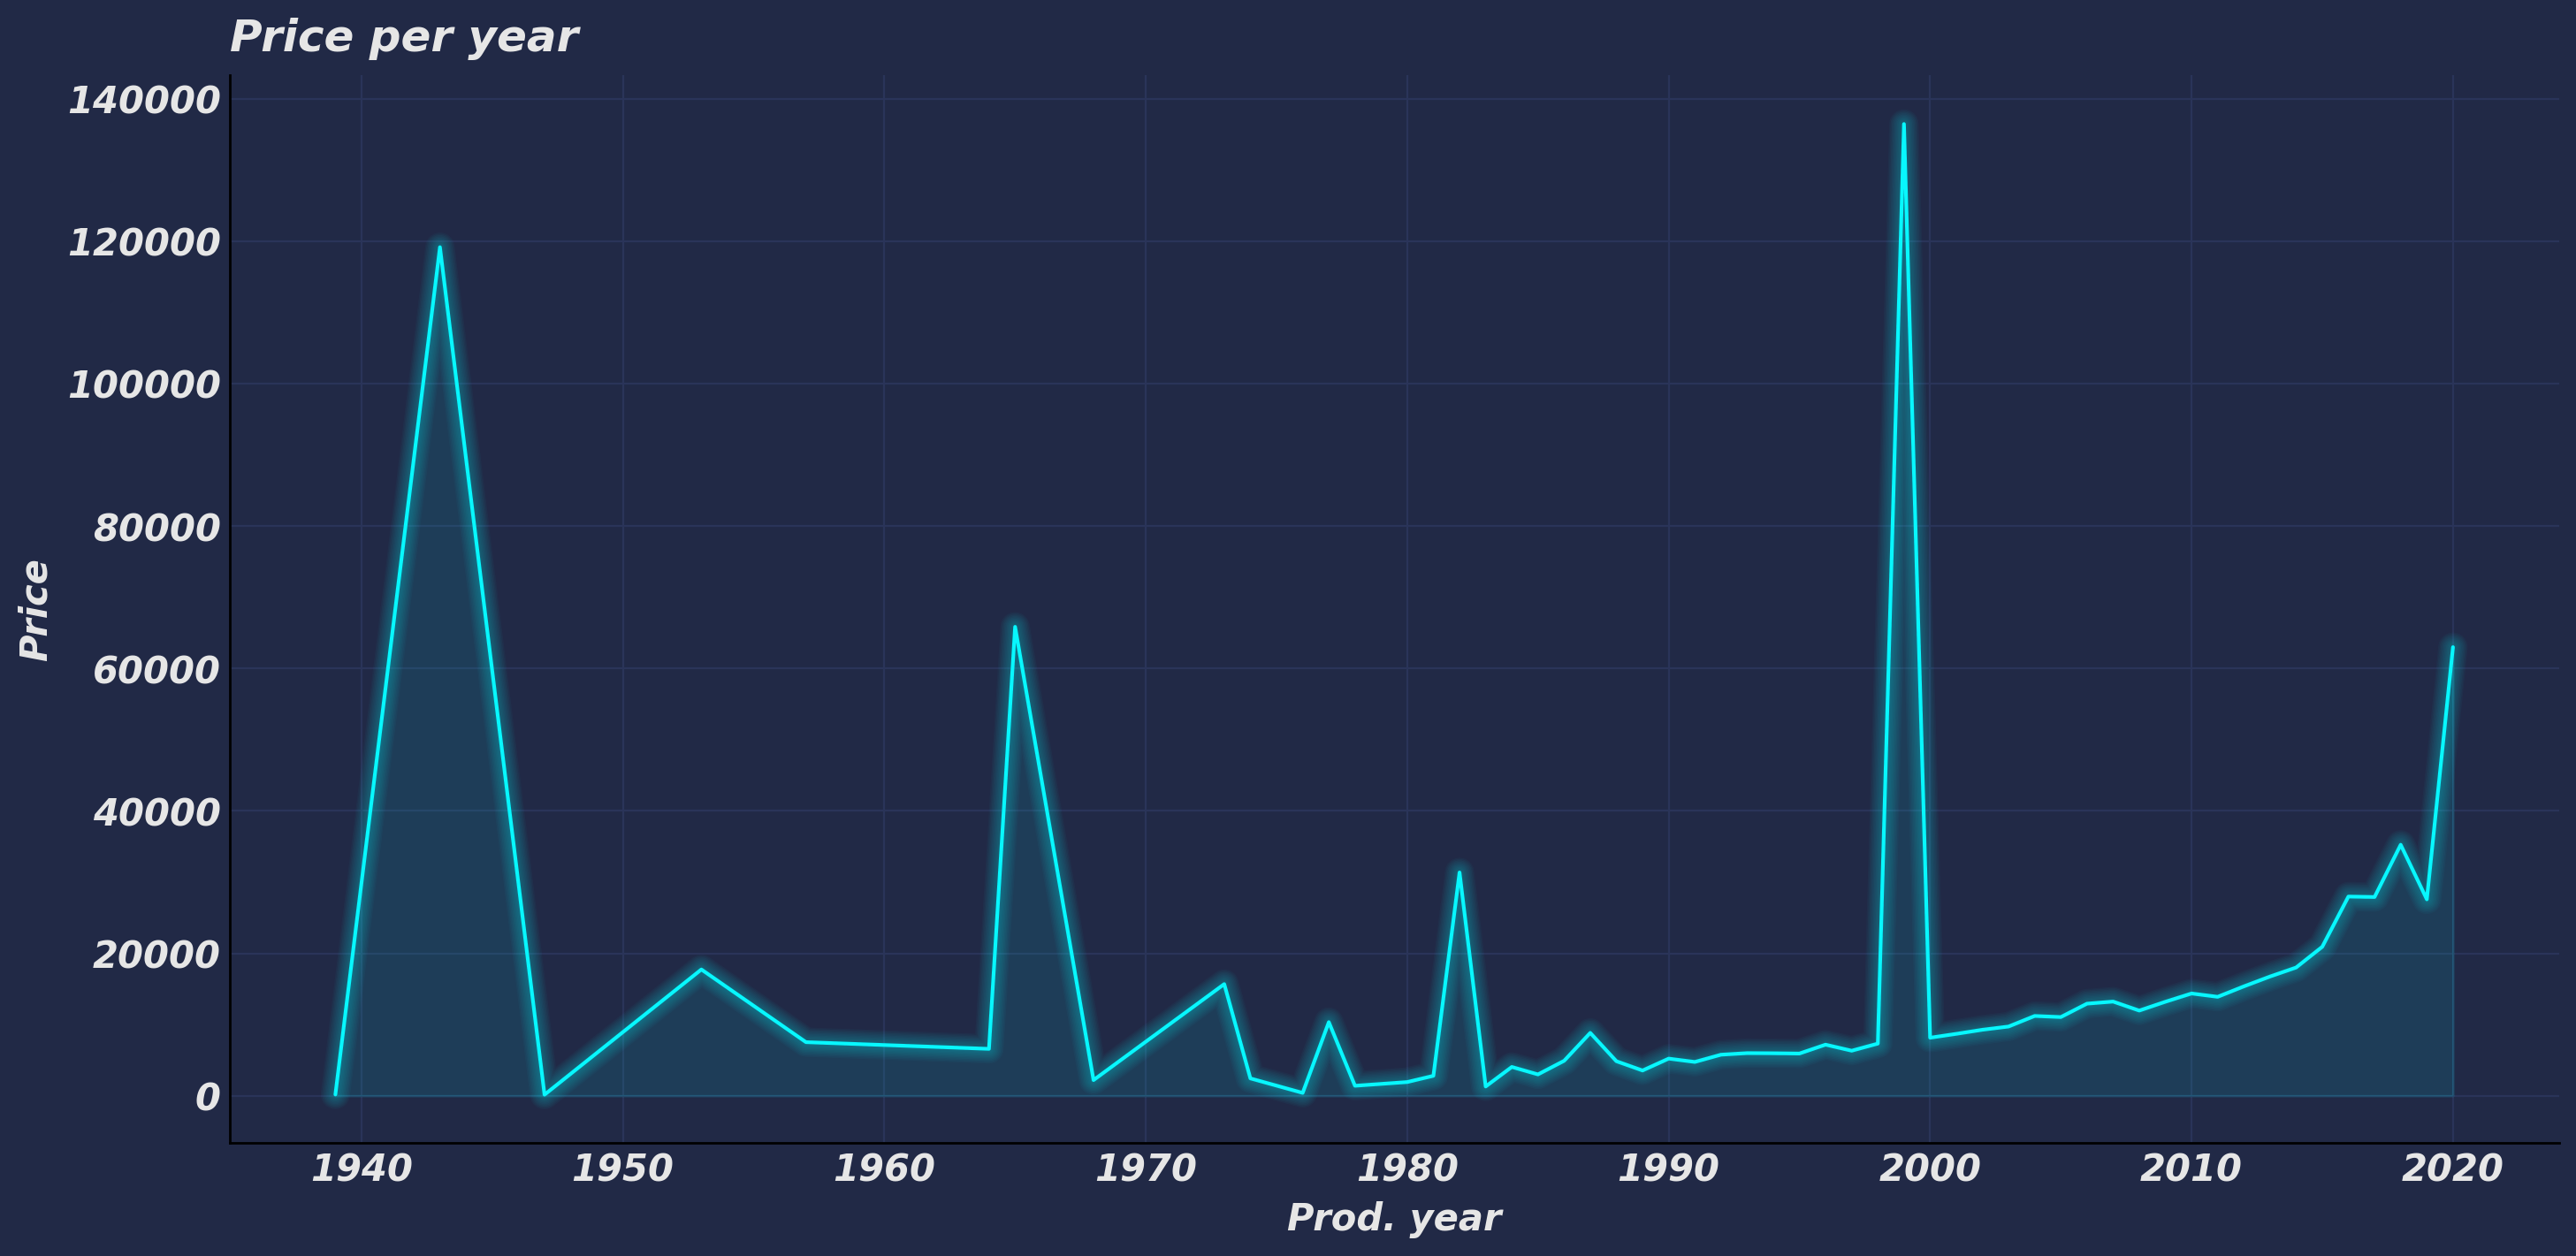

In [167]:
plt.figure(figsize=(17,8))

sns.lineplot(x = train["Prod. year"], y=train.Price,ci=None) 
mplcyberpunk.add_glow_effects()
plt.title("Price per year")

In [48]:
year = train["Prod. year"].apply(lambda x: ">2000" if x > 2000 else "<2000") 

In [49]:
year.describe()

count     18664
unique        2
top       >2000
freq      17442
Name: Prod. year, dtype: object

Price
Prod. year              
<2000       28636.825696
>2000       17884.681917

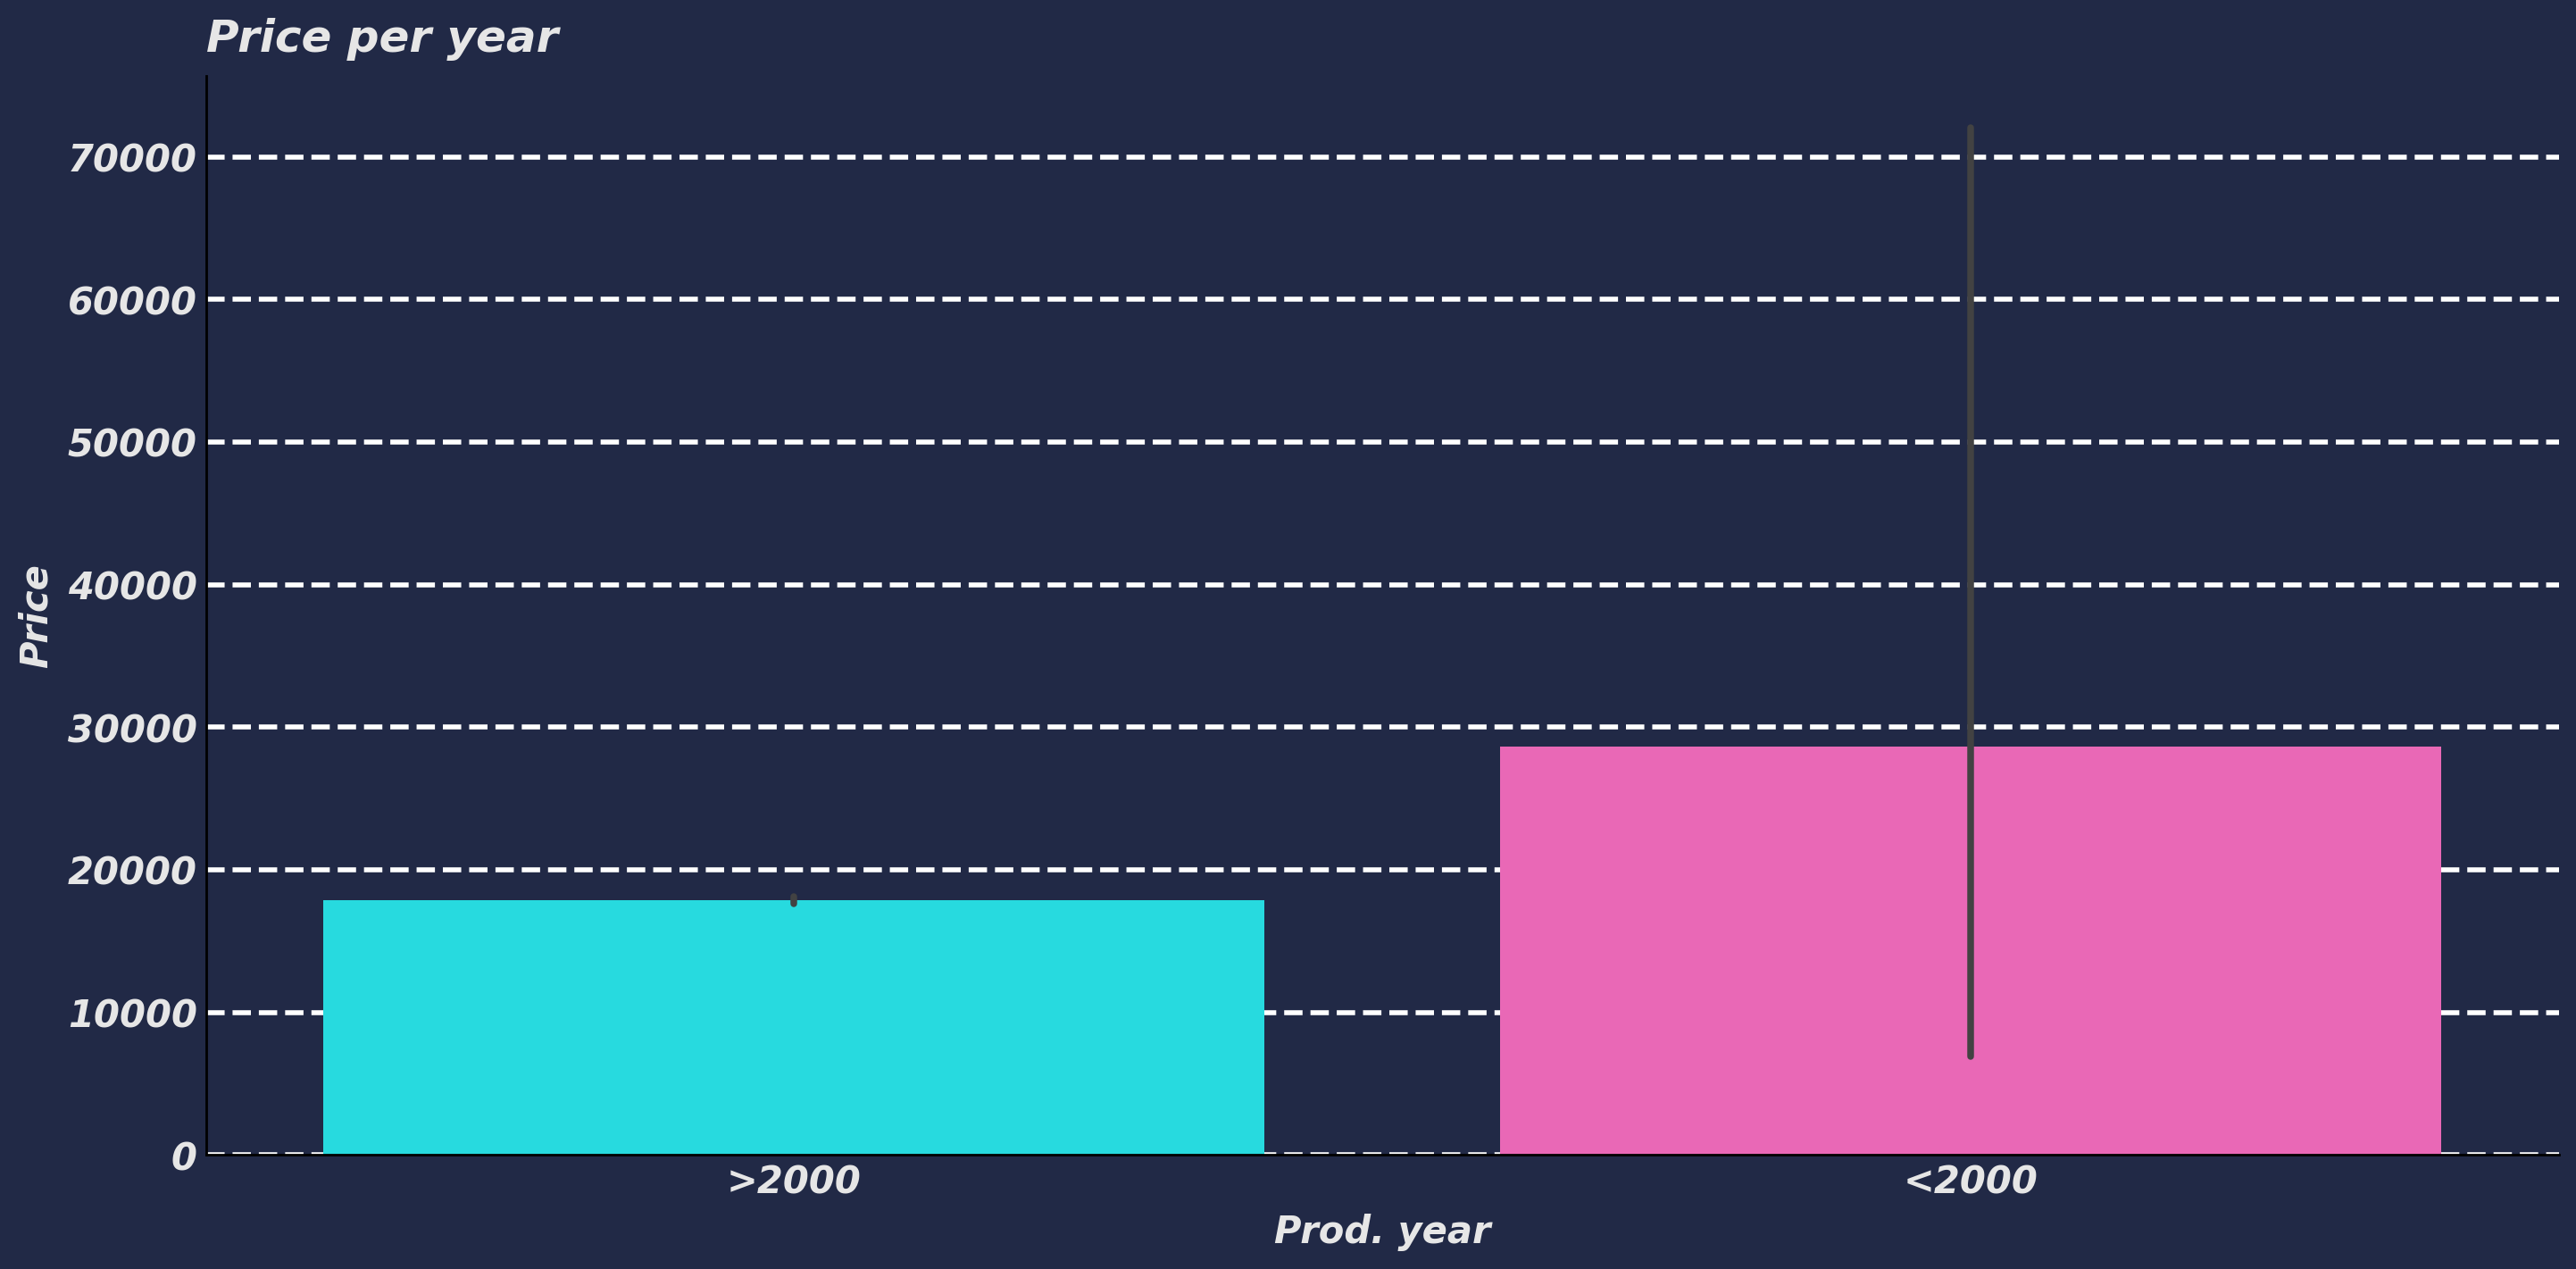

In [52]:
plt.figure(figsize=(17,8))

sns.barplot(x=year, y=train.Price) 
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Price per year") 

train.groupby(year)["Price"].mean().to_frame()

In [16]:
for i in [train,test]:
    i["new_prod_year"] = train["Prod. year"].apply(lambda x: ">2000" if x > 2000 else "<2000") 

In [18]:
# extract age of years

age = 2021 - train["Prod. year"] 

In [55]:
age.value_counts().sort_index() 

1       47
2      291
3      477
4      909
5     1429
6     1519
7     2088
8     1912
9     2129
10    1580
11    1437
12     572
13     680
14     453
15     308
16     387
17     343
18     353
19     283
20     245
21     273
22     202
23     203
24     149
25     108
26     100
27      41
28      22
29      29
30      10
31      18
32       6
33      12
34       5
35       6
36       5
37       5
38       3
39       1
40       1
41       2
43       2
44       2
45       1
47       1
48       1
53       1
56       1
57       2
64       1
68       4
74       1
78       1
82       3
Name: Prod. year, dtype: int64

Text(0.5, 0, 'Age')

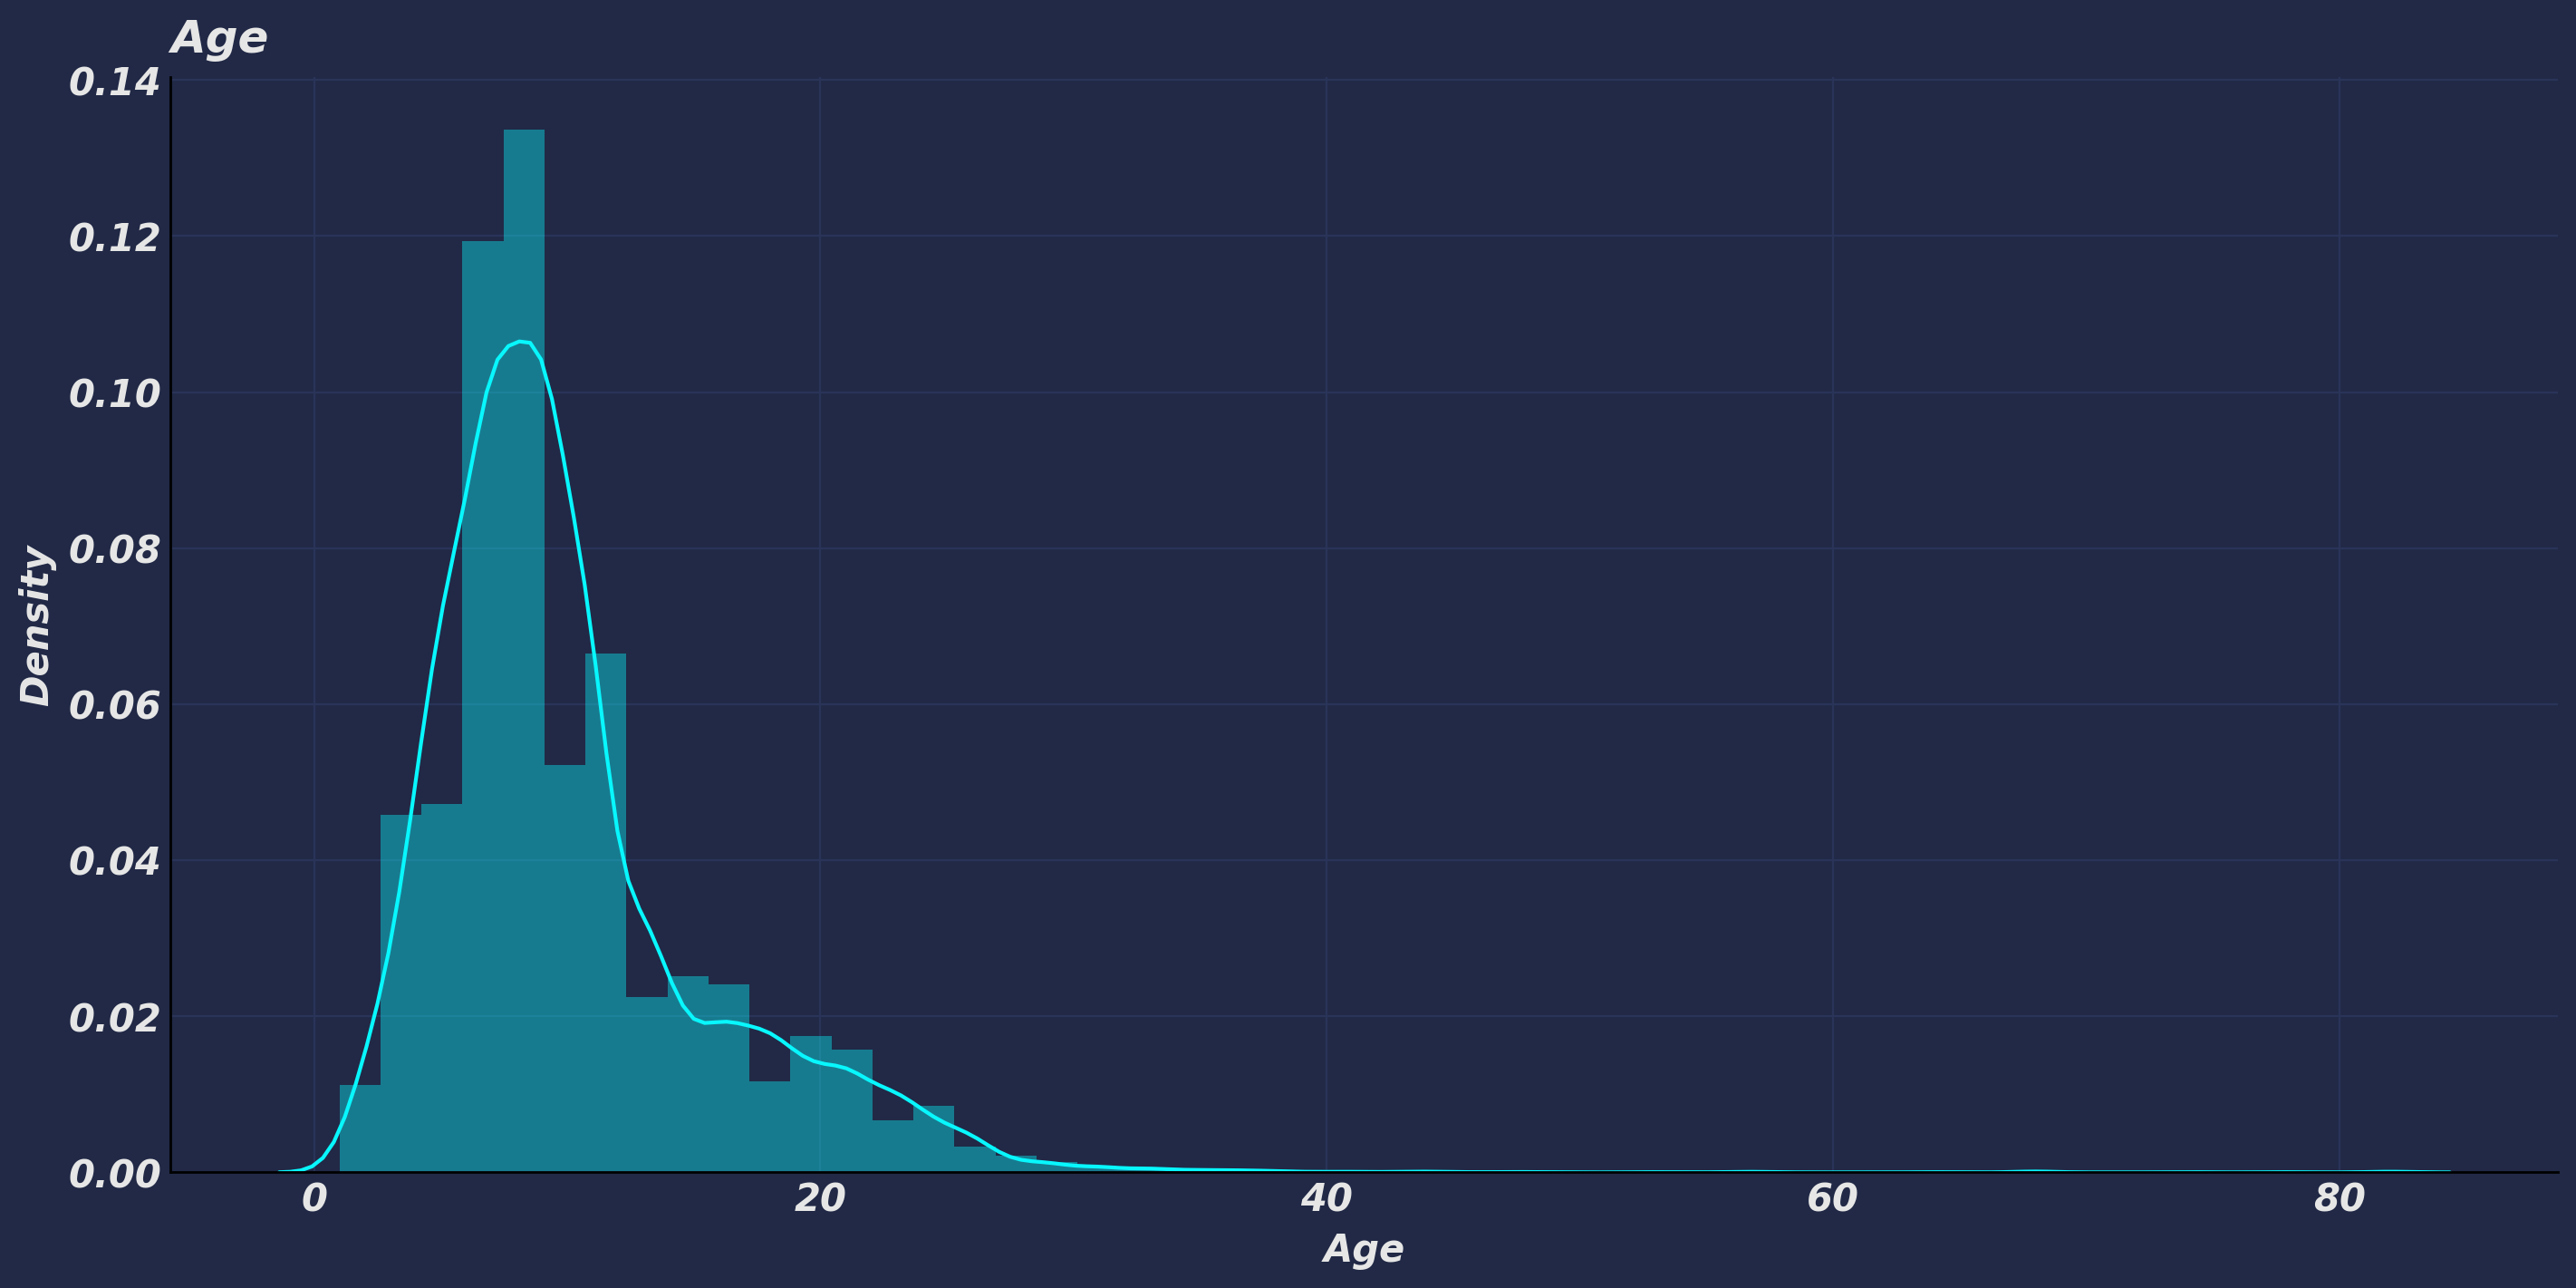

In [105]:
plt.figure(figsize=(17,8))

sns.distplot(age)
plt.title("Age")
plt.xlabel("Age") 

In [57]:
plt.figure(figsize=(17,8))

sns.regplot(x=age,y=train.Price)
plt.title("correlation price & age of cars")
plt.xlabel("Age") 


Text(0.5, 0, 'Age')

In [19]:
# perhalus age of cars

bins = [0,25,50,100]
labels = ["[0-25]", "[25-50]", ">50"]
age_cut = pd.cut(age,bins=bins, labels=labels) 
age_cut.value_counts() 

[0-25]     18377
[25-50]      273
>50           14
Name: Prod. year, dtype: int64

In [99]:
age_cut.describe()

count      18664
unique         3
top       [0-25]
freq       18377
Name: Prod. year, dtype: object

In [100]:
train.groupby(age_cut)["Price"].mean().to_frame()

Price
Prod. year              
[0-25]      18779.842738
[25-50]      5648.791209
>50         19966.642857

In [20]:
for i in [train,test]:
    i["age_car"] = 2021 - i["Prod. year"]
    i["age_car"] = pd.cut(i.age_car, bins=bins , labels = labels)

In [107]:
# Cylinders
train.Cylinders.value_counts().sort_index() 

1.0        37
2.0        42
3.0       107
4.0     14111
5.0       167
6.0      3340
7.0         4
8.0       808
9.0         1
10.0       11
12.0       30
14.0        1
16.0        5
Name: Cylinders, dtype: int64

In [24]:
for i in [train,test]:
    i["Cylinders"] = i.Cylinders.astype("int32") 

In [27]:
plt.figure(figsize=(17,8))

sns.distplot(train.Cylinders,bins=13) 
plt.title("Cylinders")


Text(0.0, 1.0, 'Cylinders')

In [29]:
plt.figure(figsize=(17,8))
sns.regplot(x=train.Cylinders,y=train.Price)
plt.title("Correlation Cylinders & Price ")

Text(0.0, 1.0, 'Correlation Cylinders & Price ')

In [31]:
train.groupby("Cylinders")["Price"].mean().to_frame()

Price
Cylinders              
1          16751.810811
2          10358.404762
3           9879.093458
4          18462.382751
5          14812.532934
6          16780.738024
7           6446.500000
8          29746.935644
9           2800.000000
10         30258.181818
12         42753.966667
14         15681.000000
16         17519.800000

In [32]:
train.query("Cylinders == 12")

ID   Price  Levy   Manufacturer  Prod. year   Category Leather interior  \
322    9   22894     0         NISSAN        2010      Sedan               No   
724    8   81539  1360          LEXUS        2013       Jeep              Yes   
820    6    7997   308         TOYOTA        2014      Sedan              Yes   
829    9   30000     0         NISSAN        2018     Pickup              Yes   
1468   4   25716     0         TOYOTA        2012  Hatchback               No   
2087   3   31988     0  MERCEDES-BENZ        2010       Jeep              Yes   
2502   2      45     0          HONDA        2006      Sedan              Yes   
2768   5  172486     0         TOYOTA        2018       Jeep              Yes   
3177   4   27911  1172          LEXUS        2011       Jeep              Yes   
4399   0   21012     0            KIA        2012      Sedan              Yes   
4566   4   30734     0            BMW        2008       Jeep              Yes   
7276   7       3     0  MERCEDES-BENZ        2020       Jeep              Yes   
7687   8   24000   919            BMW        2012       Jeep              Yes   
7789   3   22894     0         TOYOTA        2014      Sedan              Yes   
8164   4  114154  1017            BMW        2017      Sedan              Yes   
9064   9   14113     0           AUDI        2006      Sedan              Yes   
9805   9   14113     0            BMW        2004       Jeep              Yes   
10468  1   56450     0     LAND ROVER        2012       Jeep              Yes   
10640  1   16308   751            KIA        2013      Sedan              Yes   
10837  9   27598   639     VOLKSWAGEN        2014       Jeep              Yes   
10934  0   65545  1079  MERCEDES-BENZ        2018       Jeep              Yes   
13330  7   89379     0  MERCEDES-BENZ        2015       Jeep              Yes   
14096  1   42337   639            BMW        2014      Sedan              Yes   
14143  1   39201     0  MERCEDES-BENZ        2010      Coupe              Yes   
14739  9   58018  1017            BMW        2017      Sedan              Yes   
15413  2  153669  1823            BMW        2018      Sedan              Yes   
16040  6   28225   640            BMW        2013       Jeep              Yes   
17722  0   40769     0          LEXUS        2013      Sedan              Yes   
17734  4    9408     0  MERCEDES-BENZ        2000      Sedan              Yes   
18001  4   14113     0  MERCEDES-BENZ        2003      Sedan              Yes   

      Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
322      Petrol            4.0   109100         12     Automatic          4x4   
724      Petrol            4.6    76800         12     Tiptronic          4x4   
820      Hybrid            1.8        0         12     Tiptronic        Front   
829      Petrol            2.5    18794         12     Automatic          4x4   
1468     Others            1.8    75000         12     Automatic        Front   
2087     Petrol            3.5   124000         12     Tiptronic          4x4   
2502     Petrol            1.3   180000         12     Automatic        Front   
2768     Diesel            4.7    13000         12     Automatic          4x4   
3177     Petrol            3.5   900000         12     Tiptronic        Front   
4399     Petrol            2.0   155000         12     Tiptronic        Front   
4566     Petrol            4.8   230000         12     Tiptronic          4x4   
7276        LPG            1.8     1212         12        Manual          4x4   
7687     Petrol            3.0   147718         12     Automatic          4x4   
7789     Hybrid            1.8    37000         12     Automatic         Rear   
8164     Petrol            2.0    42000         12     Tiptronic         Rear   
9064     Petrol            3.2   260000         12     Tiptronic        Front   
9805     Petrol            4.8   206000         12     Tiptronic          4x4   
10468    Petrol            5.0   165

In [36]:
# perhalus 
bins_cy = [0,4,8,16]
labels_cy = ["[0-4]", "[4-8]", "[8-16]"]
cy = pd.cut(train.Cylinders, bins=bins_cy,labels=labels_cy) 
cy.value_counts() 

[0-4]     14297
[4-8]      4319
[8-16]       48
Name: Cylinders, dtype: int64

In [37]:
cy.describe()

count     18664
unique        3
top       [0-4]
freq      14297
Name: Cylinders, dtype: object

In [38]:
train.groupby(cy)["Price"].mean().to_frame()

Price
Cylinders              
[0-4]      18369.910890
[4-8]      19120.784441
[8-16]     35865.395833

In [40]:
# Airbags
train.Airbags.value_counts()

4     5719
12    5431
0     2299
8     1555
6     1275
2     1036
10     836
5      102
16      92
7       85
1       75
9       61
3       37
11      32
14      20
15       7
13       2
Name: Airbags, dtype: int64

Text(0.0, 1.0, 'Airbags')

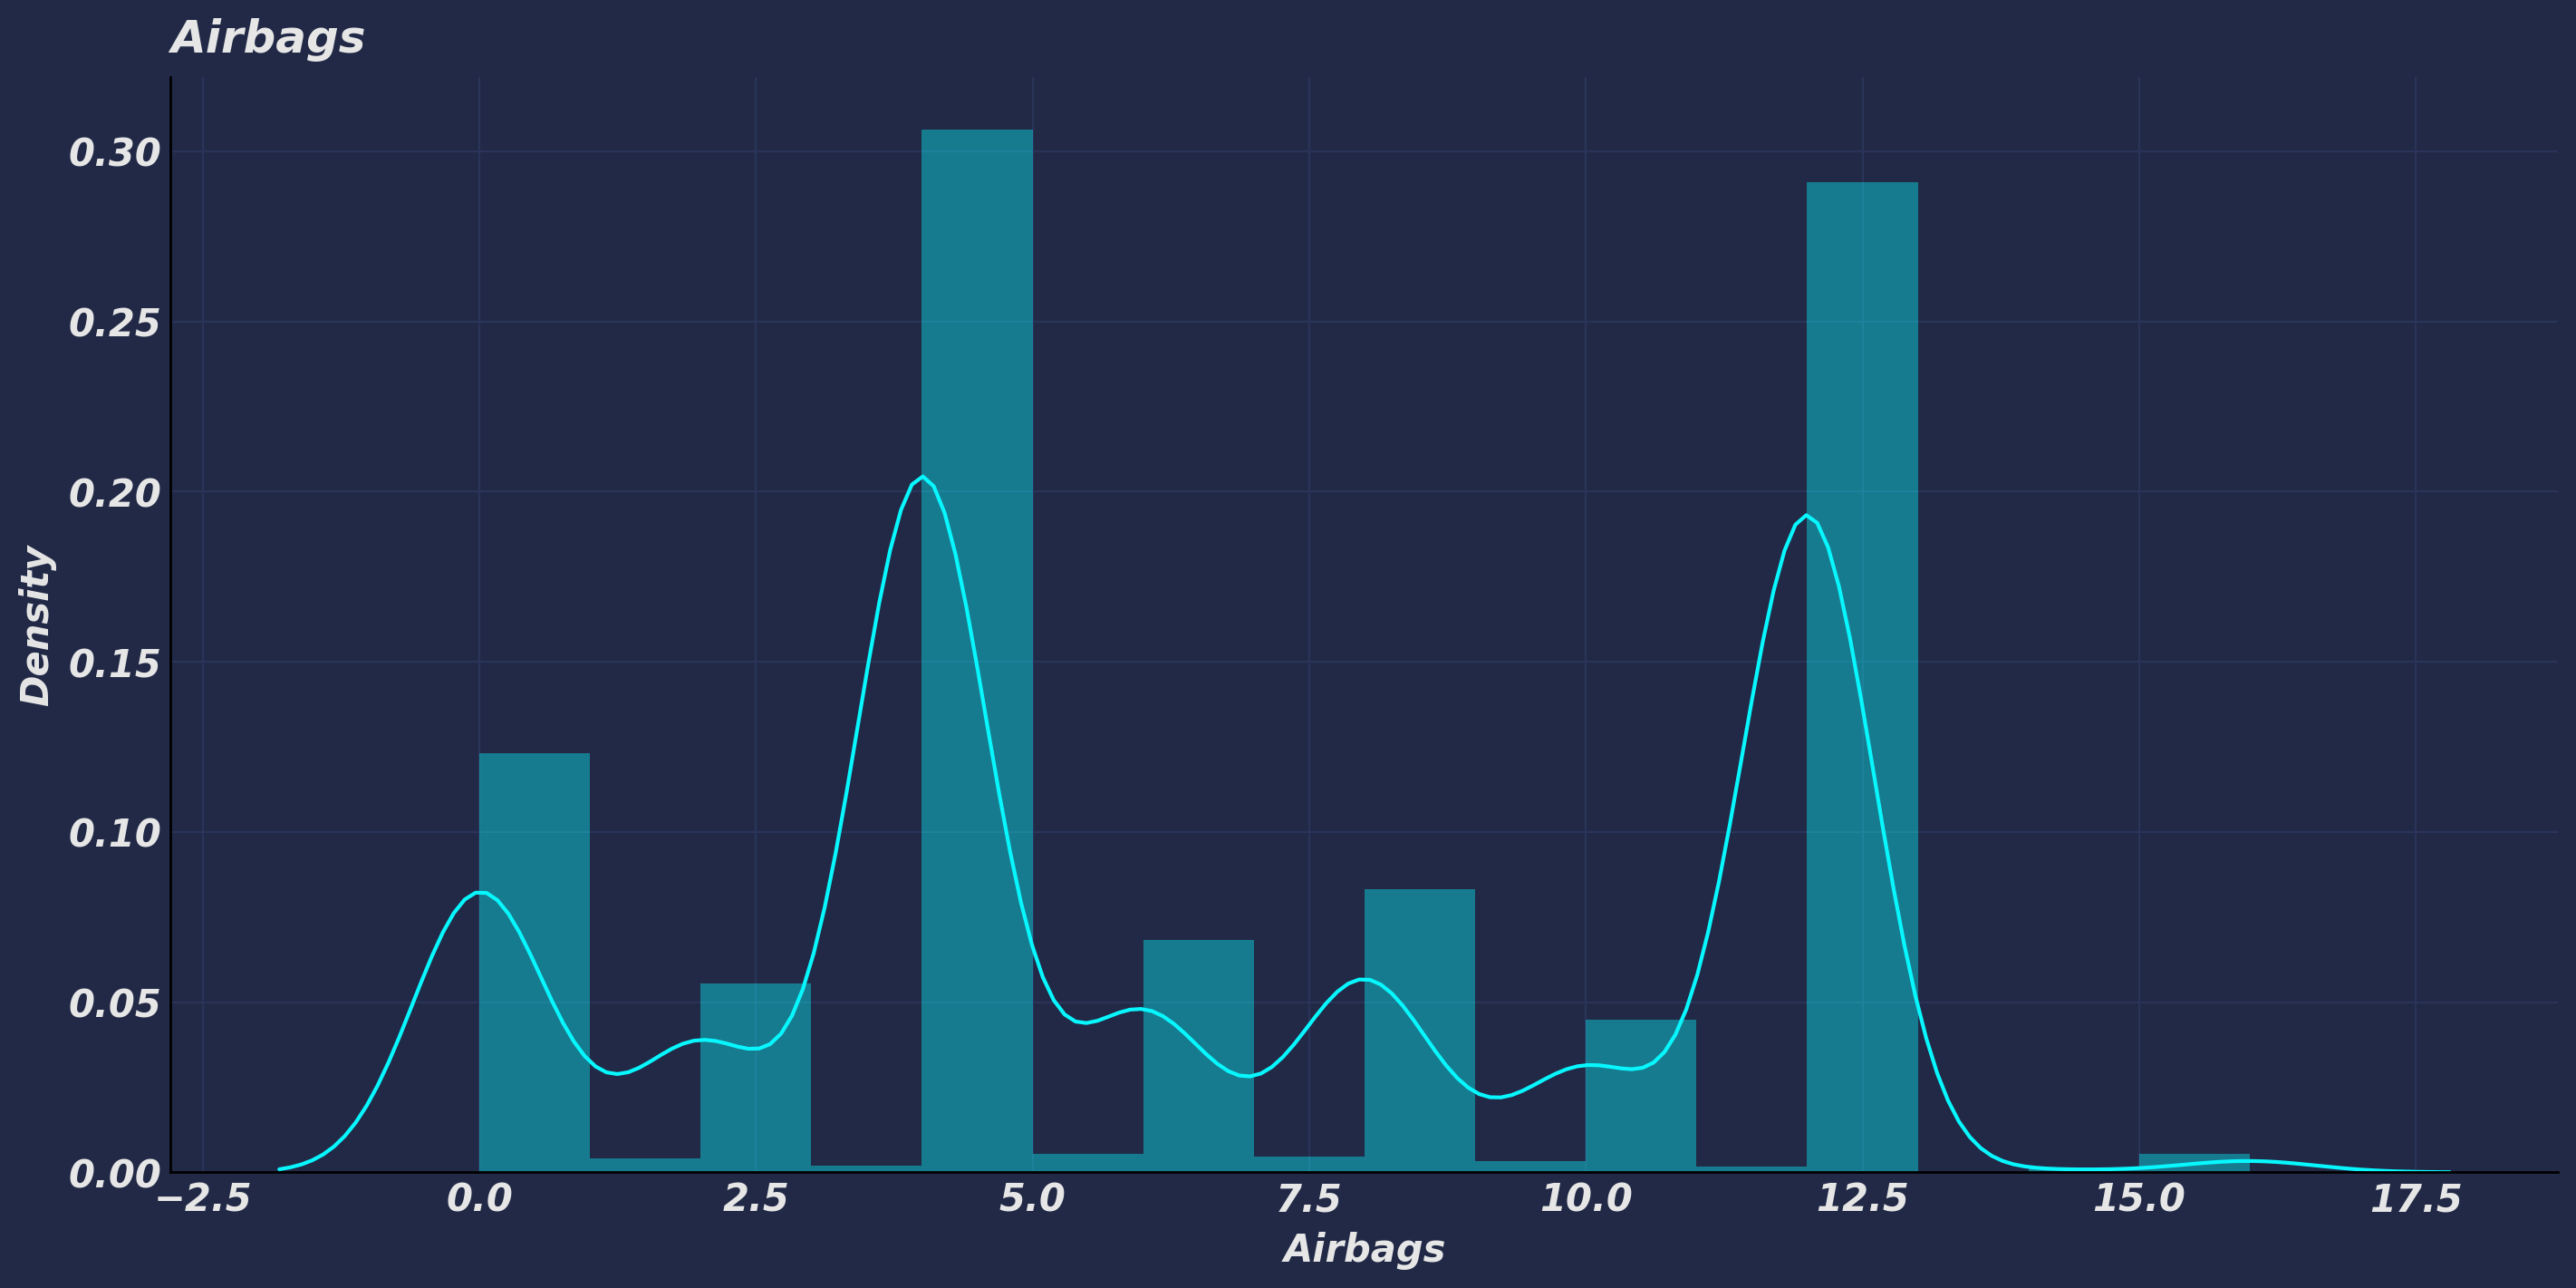

In [41]:
plt.figure(figsize=(17,8))

sns.distplot(train.Airbags,bins=16) 
plt.title("Airbags")


In [42]:
train.groupby("Airbags")["Price"].mean().to_frame() 

Price
Airbags              
0        23660.792084
1        10764.026667
2        10439.554054
3         8726.216216
4        22586.091974
5        10699.215686
6        15718.541961
7        16521.129412
8        18391.086174
9        19871.344262
10       22924.500000
11       17989.031250
12       13822.073283
13        6284.500000
14       26659.400000
15       39201.428571
16       37519.847826

## Multivariat analysis & sedikit feature engineering

In [39]:
train.head()

ID  Price  Levy Manufacturer  Prod. year   Category Leather interior  \
0  3  13328  1399        LEXUS        2010       Jeep              Yes   
1  7  16621  1018    CHEVROLET        2011       Jeep               No   
2  9   8467     0        HONDA        2006  Hatchback               No   
3  5   3607   862         FORD        2011       Jeep              Yes   
4  3  11726   446        HONDA        2014  Hatchback              Yes   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid            3.5   186005          6     Automatic          4x4   
1    Petrol            3.0   192000          6     Tiptronic          4x4   
2    Petrol            1.3   200000          4      Variator        Front   
3    Hybrid            2.5   168966          4     Automatic          4x4   
4    Petrol            1.3    91901          4     Automatic        Front   

    Doors             Wheel   Color  Airbags has_turbo new_prod_year age_car  
0  04-May        Left wheel  Silver       12        no         >2000  [0-25]  
1  04-May        Left wheel   Black        8        no         >2000  [0-25]  
2  04-May  Right-hand drive   Black        2        no         >2000  [0-25]  
3  04-May        Left wheel   White        0        no         >2000  [0-25]  
4  04-May        Left wheel  Silver        4        no         >2000  [0-25]

In [61]:
train.groupby(["Manufacturer", "Category"])["Price"].mean().to_frame().sort_values("Price" ,ascending=False)[:10]

Price
Manufacturer  Category                  
OPEL          Goods wagon  303667.505618
BENTLEY       Coupe        219527.000000
MERCEDES-BENZ Pickup       112900.000000
FERRARI       Coupe        101923.000000
PORSCHE       Coupe         90806.285714
PEUGEOT       Jeep          80000.000000
PORSCHE       Hatchback     72130.000000
LAND ROVER    Jeep          54807.187500
ASTON MARTIN  Coupe         54000.000000
TESLA         Sedan         53941.000000

In [54]:
train.groupby(["Manufacturer", "Category"])["Mileage"].mean().to_frame().sort_values("Mileage" ,ascending=False)[:10]

Mileage
Manufacturer Category               
UAZ          Jeep       2.684579e+08
OPEL         Sedan      2.568516e+07
MOSKVICH     Sedan      2.000000e+07
SUBARU       Jeep       1.455701e+07
VOLKSWAGEN   Hatchback  1.279918e+07
UAZ          Coupe      1.264885e+07
FORD         Microbus   1.214147e+07
BMW          Sedan      6.933075e+06
NISSAN       Hatchback  6.213125e+06
VOLKSWAGEN   Sedan      5.239894e+06

In [57]:
train.query("Manufacturer == 'UAZ' & Category == 'Jeep'")

ID  Price  Levy Manufacturer  Prod. year Category Leather interior  \
5488   0   5331     0          UAZ        1964     Jeep               No   
9493   3   7527     0          UAZ        1957     Jeep               No   
9540   6  10036     0          UAZ        1987     Jeep              Yes   
9565   1   5331     0          UAZ        1990     Jeep               No   
12734  8   2200     0          UAZ        1968     Jeep              Yes   
13190  6   4000     0          UAZ        1987     Jeep               No   
17150  6   4234     0          UAZ        1985     Jeep               No   
18284  9   5959     0          UAZ        1999     Jeep               No   

      Fuel type  Engine volume     Mileage  Cylinders Gear box type  \
5488     Petrol            2.4       50000          4        Manual   
9493     Petrol            2.0           0          4        Manual   
9540     Petrol            2.0           0          4        Manual   
9565     Petrol            2.4           0          4        Manual   
12734       CNG            2.4  2147483647          4        Manual   
13190    Petrol            2.9      120000          4        Manual   
17150    Petrol            2.4        1500          4        Manual   
18284    Petrol            2.0        8000          4     Automatic   

      Drive wheels   Doors       Wheel   Color  Airbags has_turbo  \
5488           4x4  02-Mar  Left wheel   Green        0        no   
9493           4x4  02-Mar  Left wheel  Yellow        0        no   
9540           4x4  04-May  Left wheel   Green        4        no   
9565           4x4  04-May  Left wheel   Black        0        no   
12734          4x4  04-May  Left wheel   Black       10        no   
13190          4x4  04-May  Left wheel    Blue        9        no   
17150          4x4  04-May  Left wheel   Beige        0        no   
18284          4x4  04-May  Left wheel   Green        0        no   

      new_prod_year  age_car  
5488          <2000      >50  
9493          <2000      >50  
9540          <2000  [25-50]  
9565          <2000  [25-50]  
12734         <2000      >50  
13190         <2000  [25-50]  
17150         <2000  [25-50]  
18284         <2000   [0-25]

In [65]:
# perhalus mileage
labels_ml = [i for i in range(1,11)]
t = pd.qcut(train.Mileage, len(labels_ml),labels=labels_ml) 
t.value_counts() 

4     1878
2     1877
7     1869
10    1867
1     1867
9     1865
8     1865
6     1865
5     1856
3     1855
Name: Mileage, dtype: int64

In [67]:
for i in [train,test]:
    i["bin_mileage"] = pd.qcut(train.Mileage, len(labels_ml), labels=labels_ml) 

In [60]:
train.groupby(["Manufacturer", "Category"])["Engine volume"].mean().to_frame().sort_values("Engine volume" ,ascending=False)[:10]

Engine volume
Manufacturer Category                  
DODGE        Pickup                 6.7
GAZ          Universal              6.3
CHEVROLET    Limousine              5.7
LINCOLN      Jeep                   5.4
ROLLS-ROYCE  Cabriolet              5.0
GAZ          Goods wagon            5.0
JAGUAR       Cabriolet              5.0
CADILLAC     Jeep                   4.9
PORSCHE      Hatchback              4.8
LINCOLN      Limousine              4.8

In [46]:
train.groupby("Category").mean() 

Price        Levy   Prod. year  Engine volume  \
Category                                                             
Cabriolet     23418.406250  434.281250  2006.218750       2.921875   
Coupe         21106.240777  492.497087  2008.900971       2.535146   
Goods wagon  125841.929515  334.405286  2003.669604       1.886344   
Hatchback     11354.558065  388.239785  2010.344086       1.589964   
Jeep          24061.013918  766.890944  2011.689990       2.654662   
Limousine     11534.454545    0.000000  1979.909091       3.609091   
Microbus      18577.993289  312.587248  2003.442953       2.381879   
Minivan       20722.406149  544.173139  2009.048544       2.408738   
Pickup        29837.632653  494.204082  2010.183673       2.693877   
Sedan         14162.167644  601.838456  2011.476185       2.248334   
Universal     23167.430986  622.121127  2009.738028       2.121127   

                  Mileage  Cylinders   Airbags  
Category                                        
Cabriolet    1.062300e+05   5.281250  6.468750  
Coupe        1.539278e+05   4.941748  6.943689  
Goods wagon  3.653198e+05   4.154185  3.295154  
Hatchback    1.269028e+06   4.033692  5.789247  
Jeep         1.149478e+06   4.969495  6.302193  
Limousine    1.302646e+05   6.363636  2.727273  
Microbus     7.470945e+06   4.271812  2.181208  
Minivan      1.590730e+05   4.266990  4.601942  
Pickup       1.426431e+05   4.612245  5.306122  
Sedan        2.000256e+06   4.480291  7.454247  
Universal    7.741346e+05   4.095775  4.459155

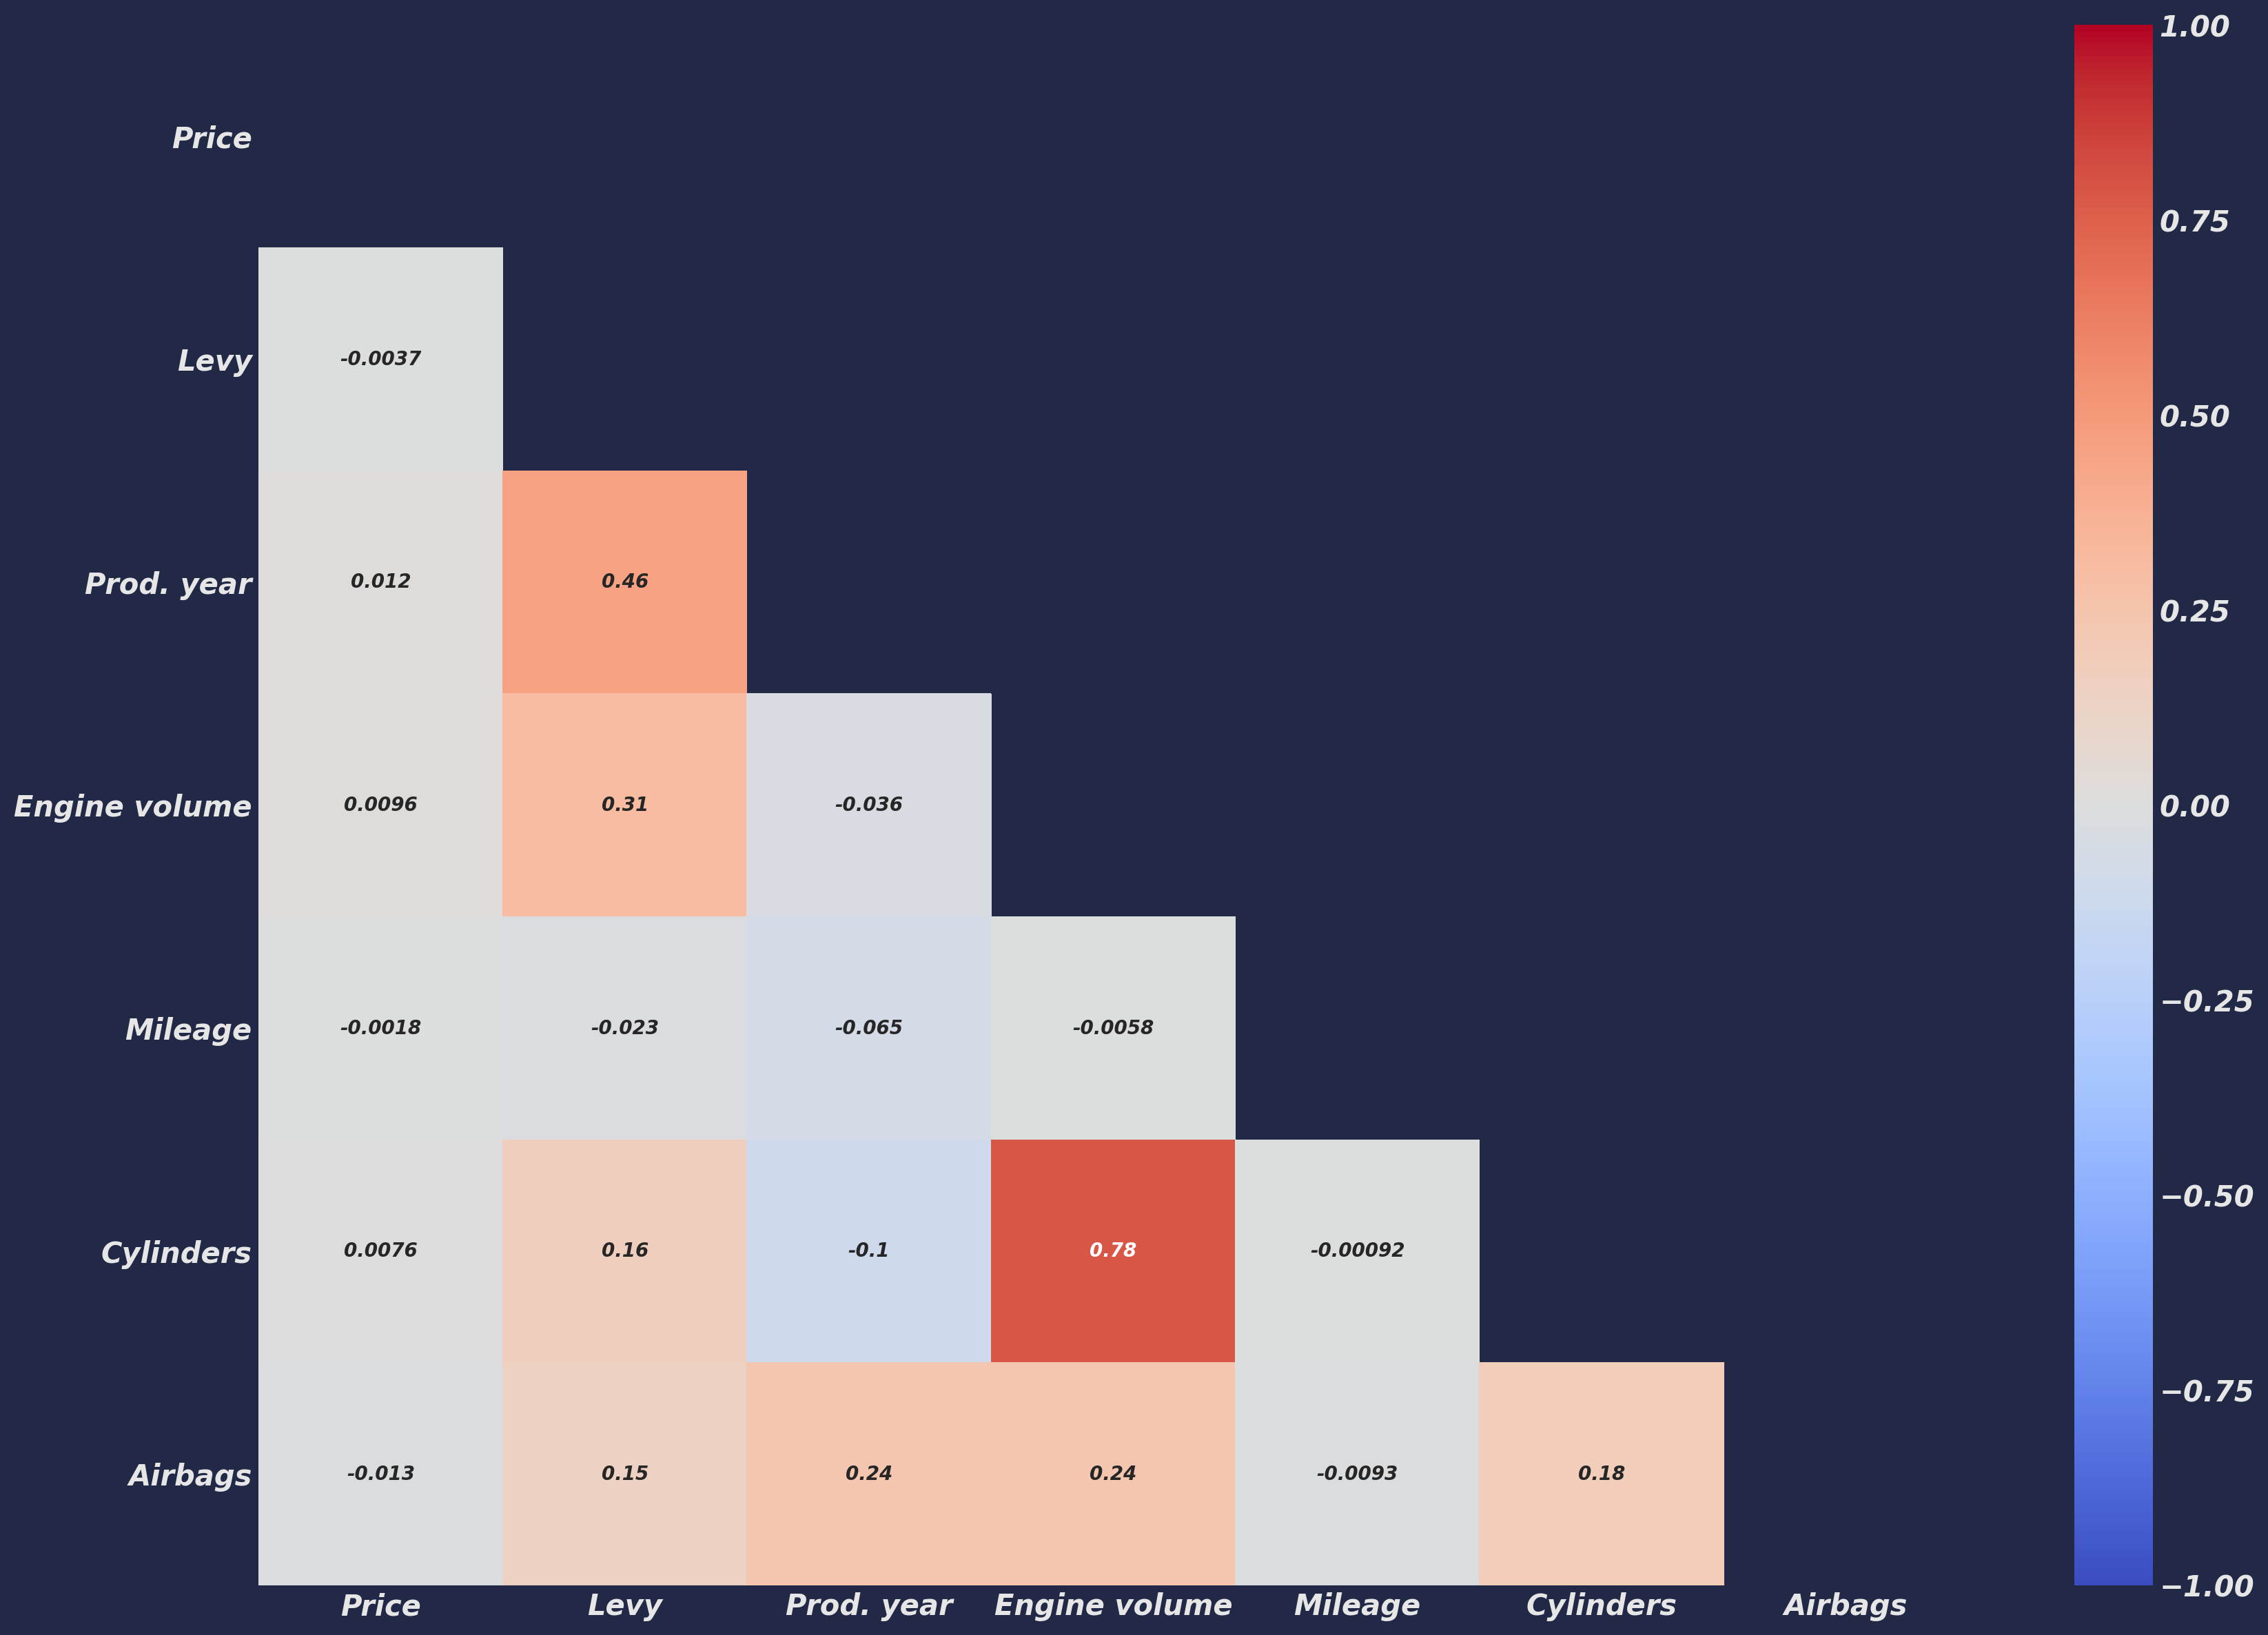

In [49]:
#check correlation

mask = np.triu(train.corr())

plt.figure(figsize=(20, 15)) 

sns.heatmap(train.corr(), mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1) 

In [50]:
plt.figure(figsize=(17,8))

sns.scatterplot(x=train["Engine volume"], y=train["Cylinders"], hue=train.has_turbo)
plt.title("correlation engine volume & Cylinders by has_turbo? ") 

Text(0.0, 1.0, 'correlation engine volume & Cylinders by has_turbo? ')

In [69]:
# drop useless column
col = ["Manufacturer","Prod. year","Mileage"]

for i in  [train,test]:
    i.drop(col, axis=1, inplace=True) 

In [ ]:
# Final


In [70]:
train.head()

ID  Price  Levy   Category Leather interior Fuel type  Engine volume  \
0  3  13328  1399       Jeep              Yes    Hybrid            3.5   
1  7  16621  1018       Jeep               No    Petrol            3.0   
2  9   8467     0  Hatchback               No    Petrol            1.3   
3  5   3607   862       Jeep              Yes    Hybrid            2.5   
4  3  11726   446  Hatchback              Yes    Petrol            1.3   

   Cylinders Gear box type Drive wheels   Doors             Wheel   Color  \
0          6     Automatic          4x4  04-May        Left wheel  Silver   
1          6     Tiptronic          4x4  04-May        Left wheel   Black   
2          4      Variator        Front  04-May  Right-hand drive   Black   
3          4     Automatic          4x4  04-May        Left wheel   White   
4          4     Automatic        Front  04-May        Left wheel  Silver   

   Airbags has_turbo new_prod_year age_car bin_mileage  
0       12        no         >2000  [0-25]           8  
1        8        no         >2000  [0-25]           8  
2        2        no         >2000  [0-25]           8  
3        0        no         >2000  [0-25]           7  
4        4        no         >2000  [0-25]           4

In [71]:
print(train.shape)
print(test.shape)
print("")
print(train.duplicated().sum())
print("")
print(train.isnull().any().sum())
print(test.isnull().any().sum())

(18664, 18)
(8245, 18)

1117

0
3


In [72]:
train[train.duplicated()]

ID  Price  Levy Category Leather interior Fuel type  Engine volume  \
239    1   2901   503    Sedan              Yes    Hybrid            1.5   
850    9   9418   765    Sedan              Yes    Petrol            2.0   
1001   2  10036   639    Sedan              Yes       LPG            2.0   
1061   6  11290   891    Sedan              Yes       LPG            2.0   
1085   9   5488   394    Sedan              Yes    Hybrid            2.5   
...   ..    ...   ...      ...              ...       ...            ...   
19182  4   9722   609    Sedan              Yes    Hybrid            2.5   
19191  2  11290   690     Jeep              Yes    Hybrid            3.5   
19222  0  10036   639    Sedan              Yes       LPG            2.0   
19227  7  29793  1053    Sedan              Yes    Diesel            3.5   
19231  6   5802  1055    Sedan              Yes    Diesel            3.5   

       Cylinders Gear box type Drive wheels   Doors       Wheel   Color  \
239            4     Automatic        Front  04-May  Left wheel   White   
850            4     Automatic        Front  04-May  Left wheel   White   
1001           4     Automatic        Front  04-May  Left wheel  Silver   
1061           4     Automatic        Front  04-May  Left wheel  Silver   
1085           4     Automatic        Front  04-May  Left wheel   White   
...          ...           ...          ...     ...         ...     ...   
19182          4     Automatic        Front  04-May  Left wheel   Black   
19191          6     Automatic        Front  04-May  Left wheel  Silver   
19222          4     Automatic        Front  04-May  Left wheel  Silver   
19227          6     Automatic          4x4  04-May  Left wheel   Black   
19231          6     Automatic         Rear  04-May  Left wheel    Grey   

       Airbags has_turbo new_prod_year age_car bin_mileage  
239          0        no         >2000  [0-25]           6  
850          4        no         >2000  [0-25]          10  
1001         4        no         >2000  [0-25]          10  
1061         4        no         >2000  [0-25]          10  
1085        12        no         >2000  [0-25]           5  
...        ...       ...           ...     ...         ...  
19182       12        no         >2000  [0-25]           6  
19191       12        no         >2000  [0-25]           3  
19222        4        no         >2000  [0-25]          10  
19227       12        no         >2000  [0-25]           9  
19231       12        no         >2000  [0-25]           5  

[1117 rows x 18 columns]

In [76]:
test.isnull().sum()

ID                     0
Levy                   0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Price               8245
has_turbo              0
new_prod_year        202
age_car                0
bin_mileage          202
dtype: int64

In [81]:
test.new_prod_year.fillna(train.new_prod_year.mode()[0],inplace=True)

In [82]:
test.bin_mileage.fillna(train.bin_mileage.mode()[0],inplace=True)

In [79]:
test.drop("Price",axis=1,inplace=True) 

In [83]:
test.isnull().any().sum()

0

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18664 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                18664 non-null  object  
 1   Price             18664 non-null  int64   
 2   Levy              18664 non-null  int32   
 3   Category          18664 non-null  object  
 4   Leather interior  18664 non-null  object  
 5   Fuel type         18664 non-null  object  
 6   Engine volume     18664 non-null  float32 
 7   Cylinders         18664 non-null  int32   
 8   Gear box type     18664 non-null  object  
 9   Drive wheels      18664 non-null  object  
 10  Doors             18664 non-null  object  
 11  Wheel             18664 non-null  object  
 12  Color             18664 non-null  object  
 13  Airbags           18664 non-null  int64   
 14  has_turbo         18664 non-null  object  
 15  new_prod_year     18664 non-null  object  
 16  age_car           1866

In [86]:
train.to_csv("train_Carprice(clean).csv",index=False)
test.to_csv("test_Carprice(clean).csv",index=False)